In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import os
import sys

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Diffusion'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['__pycache__', 'unet.py', 'data.py', 'utilities.py', 'unet_mnist', 'ddpm.py', 'train.ipynb']


In [3]:
sys.path.append(GOOGLE_DRIVE_PATH)

In [4]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
from ddpm import DDPM
from data import Data
from unet import UNet
from utilities import visualize_forward, display_generated, train

In [6]:
torch.manual_seed(27)
device = "cuda" if torch.cuda.is_available() else "cpu"
dtype = torch.float32

###MNIST

In [7]:
ddpm_dict = {
  "beta_start": 1e-4,
  "beta_end": 2e-2,
  "timesteps": 512,
  "device": device,
  "dtype": dtype
}

data_dict = {
  "name": "mnist",
  "path": "data",
  "batch_size": 1024
}

ddpm = DDPM(**ddpm_dict)
data = Data(**data_dict)

unet_dict = {
  "input_channels": data.shape[0],
  "hid_channels": 16,
  "num_blocks": 3,
  "emb_dim": 512
}

unet = UNet(**unet_dict).to(dtype=ddpm.dtype, device=ddpm.device)

100%|██████████| 9.91M/9.91M [00:00<00:00, 12.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 340kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.18MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 14.6MB/s]


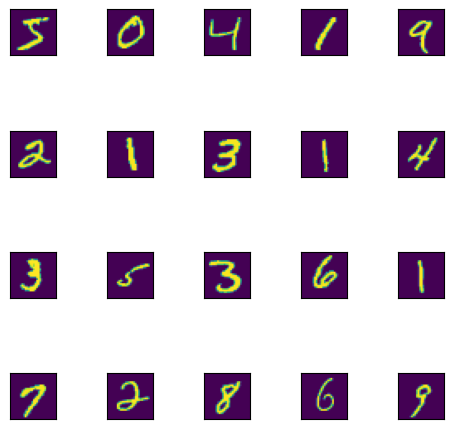

In [8]:
data.show_img()

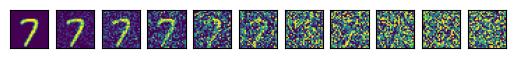

In [10]:
visualize_forward(ddpm, data)

Number of parameters: 973952

Epoch: 1 | Learning Rate: 0.001
1.3182806968688965
1.01712965965271
0.8230797648429871
0.6877787709236145
0.5942683815956116
0.5251413583755493
0.4746854901313782
0.4369933009147644
0.3886193037033081
0.3591925799846649
0.33426958322525024
0.3101540207862854
0.2971331477165222
0.2804132401943207
0.2659463584423065
0.25039035081863403
0.23553836345672607
0.22562791407108307
0.2196047604084015
0.21202373504638672
0.2017824947834015
0.19954390823841095
0.19246003031730652
0.18146267533302307
0.1812962144613266
0.1739559918642044
0.1666545420885086
0.16527388989925385
0.1647207885980606
0.16090671718120575
0.15190061926841736
0.1439349502325058
0.14838676154613495
0.14054742455482483
0.13777239620685577
0.14298345148563385
0.1327051967382431
0.13959115743637085
0.12680281698703766
0.13457709550857544
0.12567073106765747
0.12163335084915161
0.12742500007152557
0.12166698276996613
0.1160479411482811
0.1188909262418747
0.1166357770562172
0.11172972619533539
0.115

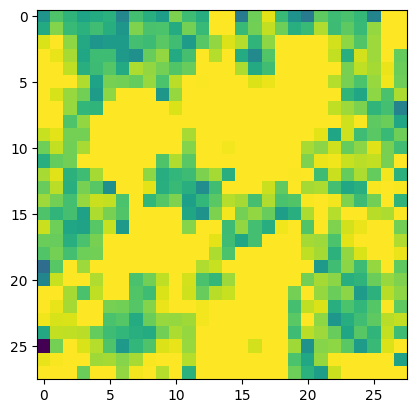


Epoch: 2 | Learning Rate: 0.001
0.10812681168317795
0.1040300652384758
0.11015008389949799
0.1014128178358078
0.10073208063840866
0.10035761445760727
0.10131960362195969
0.09950750321149826
0.09840238094329834
0.0984383299946785
0.09587975591421127
0.09883744269609451
0.09662964940071106
0.10050539672374725
0.09581143409013748
0.1003018394112587
0.09171860665082932
0.09501229226589203
0.0923466756939888
0.08927251398563385
0.09195099771022797
0.09392145276069641
0.09148751944303513
0.08974666893482208
0.09067622572183609
0.09140244126319885
0.09429404139518738
0.09657614678144455
0.09097851067781448
0.09053224325180054
0.09282583743333817
0.0835002213716507
0.08736968040466309
0.08470091968774796
0.0873345211148262
0.08294723182916641
0.08443346619606018
0.08686726540327072
0.08293142914772034
0.09008796513080597
0.08320216834545135
0.084319569170475
0.0821990817785263
0.08432696014642715
0.08381307870149612
0.0831446498632431
0.07834816724061966
0.08355484157800674
0.0803312808275222

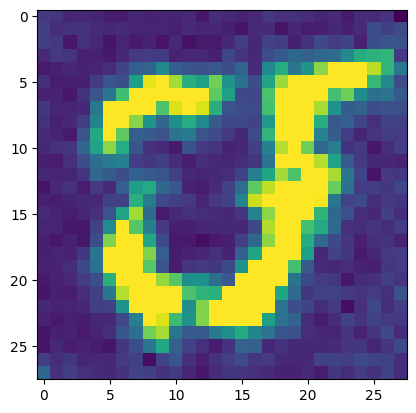


Epoch: 3 | Learning Rate: 0.001
0.0842261090874672
0.07663030177354813
0.07705827057361603
0.07845541834831238
0.0821893960237503
0.08154726773500443
0.07939351350069046
0.07951798290014267
0.08052877336740494
0.07427848875522614
0.08020676672458649
0.07766541838645935
0.07414116710424423
0.07532539963722229
0.07341017574071884
0.07286953181028366
0.07796028256416321
0.08014486730098724
0.07659370452165604
0.07786344736814499
0.07394235581159592
0.07473747432231903
0.07502962648868561
0.07653305679559708
0.07265470921993256
0.0733923688530922
0.0701945424079895
0.07354806363582611
0.07440443336963654
0.06983296573162079
0.06805434077978134
0.06991669535636902
0.06992856413125992
0.07553406804800034
0.07058165967464447
0.07274845987558365
0.07255487143993378
0.07576987147331238
0.0718492642045021
0.06787090748548508
0.06921402364969254
0.06992383301258087
0.06758850067853928
0.06957592815160751
0.06963741034269333
0.06716512888669968
0.06982997059822083
0.0703890323638916
0.06714083999

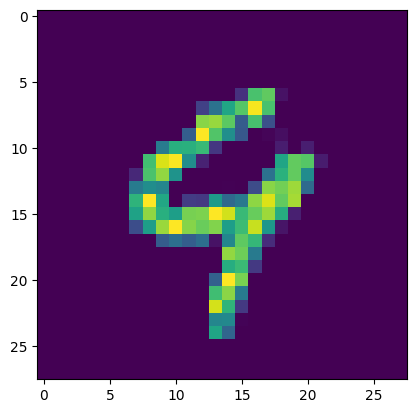


Epoch: 4 | Learning Rate: 0.001
0.06960085034370422
0.06225810945034027
0.06647432595491409
0.06705667078495026
0.06938391178846359
0.06930738687515259
0.06861506402492523
0.06592922657728195
0.06949606537818909
0.06258910894393921
0.06369226425886154
0.06455479562282562
0.06485433131456375
0.06246849521994591
0.06836330145597458
0.0658777505159378
0.06349612027406693
0.066818967461586
0.06466417759656906
0.06665515899658203
0.06679240614175797
0.06433677673339844
0.06521718949079514
0.06506561487913132
0.06388562172651291
0.06806012243032455
0.0624515675008297
0.061494212597608566
0.06349503248929977
0.06643209606409073
0.06422761082649231
0.06531762331724167
0.06587160378694534
0.06300704181194305
0.06650832295417786
0.05910110846161842
0.061902161687612534
0.06411769986152649
0.0609908290207386
0.06010906770825386
0.05911123752593994
0.06358912587165833
0.06263794749975204
0.06380835920572281
0.05884304642677307
0.0633687749505043
0.06535179913043976
0.06415010988712311
0.061437167

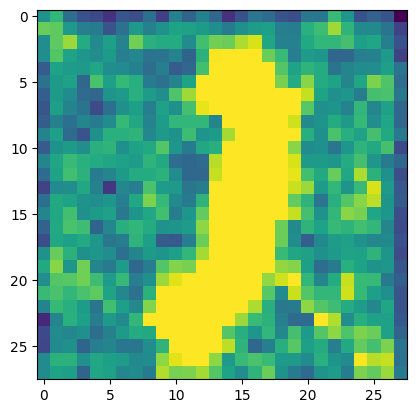


Epoch: 5 | Learning Rate: 0.001
0.05955442041158676
0.05774322524666786
0.06434842199087143
0.05530615523457527
0.06179061159491539
0.058264341205358505
0.05765107646584511
0.06126580387353897
0.06322063505649567
0.060759879648685455
0.060504134744405746
0.0579429492354393
0.06052881106734276
0.05798362195491791
0.060761045664548874
0.061950720846652985
0.06010407581925392
0.058067649602890015
0.06143238767981529
0.060284439474344254
0.061447467654943466
0.06288541108369827
0.06077582389116287
0.05974801629781723
0.05894044414162636
0.058936551213264465
0.057515621185302734
0.056116413325071335
0.0588097870349884
0.05619410052895546
0.05891463905572891
0.05792984366416931
0.05979946255683899
0.060827624052762985
0.05761701986193657
0.05972553789615631
0.054989513009786606
0.05998425930738449
0.05923951789736748
0.05566541478037834
0.05911394953727722
0.05797397717833519
0.05809039995074272
0.05733150616288185
0.05745324119925499
0.05747032165527344
0.05444587767124176
0.05787631496787

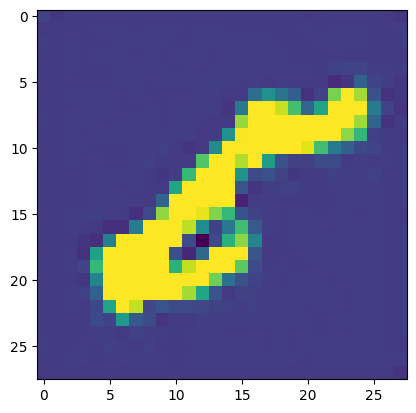


Epoch: 6 | Learning Rate: 0.001
0.05507700517773628
0.059375371783971786
0.055212538689374924
0.05675395578145981
0.05558271333575249
0.05618354305624962
0.05669964477419853
0.05593876913189888
0.05822831764817238
0.05804261192679405
0.059414491057395935
0.05545704439282417
0.0571993812918663
0.05586937442421913
0.05627584457397461
0.05210012197494507
0.05140341445803642
0.05921595171093941
0.059882164001464844
0.055931974202394485
0.05469823256134987
0.05961550399661064
0.05492405965924263
0.05309513956308365
0.05650767311453819
0.05272182077169418
0.05649522691965103
0.05610990896821022
0.05083137005567551
0.0532175749540329
0.05567464604973793
0.05756457522511482
0.05596303939819336
0.055700574070215225
0.055360544472932816
0.051927246153354645
0.05559051036834717
0.05646791681647301
0.05390647426247597
0.058025360107421875
0.05351769179105759
0.05353737622499466
0.056287821382284164
0.055092740803956985
0.05461416020989418
0.05368223786354065
0.052962638437747955
0.054315917193889

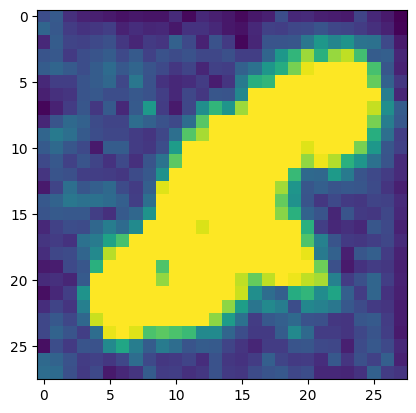


Epoch: 7 | Learning Rate: 0.001
0.05239632725715637
0.05649964511394501
0.052476875483989716
0.050830498337745667
0.0508999228477478
0.05477249249815941
0.055238667875528336
0.054856911301612854
0.053133413195610046
0.0537840910255909
0.05038905888795853
0.05108277127146721
0.05381878465414047
0.05847785249352455
0.053437523543834686
0.05145680159330368
0.05506126955151558
0.05439606308937073
0.054641786962747574
0.05153581127524376
0.053054872900247574
0.050971269607543945
0.05215918645262718
0.04762957990169525
0.05161041393876076
0.050256505608558655
0.05165702477097511
0.050394508987665176
0.050947003066539764
0.05513596907258034
0.054104745388031006
0.051232535392045975
0.05139324814081192
0.053025249391794205
0.05342286825180054
0.053306832909584045
0.05211247503757477
0.05008198693394661
0.05168990045785904
0.04926103353500366
0.05026343837380409
0.053824957460165024
0.048529304563999176
0.05197465047240257
0.052295275032520294
0.04761452600359917
0.051505278795957565
0.0516924

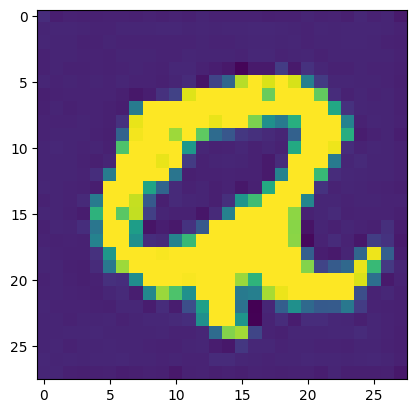


Epoch: 8 | Learning Rate: 0.001
0.050129033625125885
0.05223729461431503
0.05227576196193695
0.053198643028736115
0.05040722340345383
0.05022834613919258
0.049550317227840424
0.051101841032505035
0.052734676748514175
0.04905965179204941
0.05037055164575577
0.05125262588262558
0.04634123668074608
0.05016515403985977
0.04990971088409424
0.04979591444134712
0.04779753461480141
0.0485885851085186
0.05093032494187355
0.050609782338142395
0.04912375658750534
0.04857427999377251
0.05034444481134415
0.04946700856089592
0.05104726180434227
0.0485181100666523
0.049960602074861526
0.04853428527712822
0.04972366616129875
0.04891069605946541
0.049107857048511505
0.05138065293431282
0.05092746391892433
0.04758107662200928
0.049205150455236435
0.05046425014734268
0.05171928182244301
0.04970792680978775
0.04817900434136391
0.052168648689985275
0.0510348305106163
0.047652360051870346
0.04973076656460762
0.05222458019852638
0.04813266173005104
0.0469617024064064
0.04781375825405121
0.04803195223212242


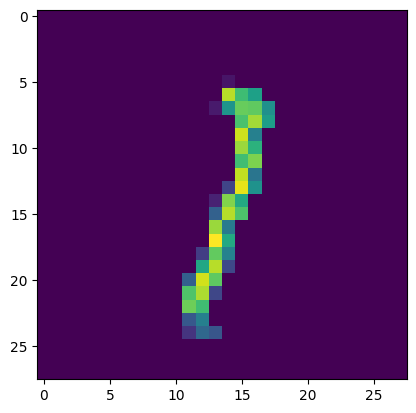


Epoch: 9 | Learning Rate: 0.001
0.04761006683111191
0.04751048609614372
0.04945344850420952
0.04815860092639923
0.047597549855709076
0.049680233001708984
0.04730512574315071
0.050411973148584366
0.048408299684524536
0.04753051698207855
0.046426381915807724
0.050415683537721634
0.049145083874464035
0.04951392114162445
0.04652591049671173
0.04814521595835686
0.04881346970796585
0.05024958401918411
0.04815893620252609
0.050591904670000076
0.04795844480395317
0.046388741582632065
0.04800676554441452
0.04788108170032501
0.049914684146642685
0.04704473912715912
0.04338568076491356
0.047003671526908875
0.05063135549426079
0.05055480822920799
0.048091575503349304
0.04595320299267769
0.050259947776794434
0.04801996424794197
0.049703169614076614
0.04873480647802353
0.0497128963470459
0.05048605799674988
0.048846546560525894
0.04794520139694214
0.04701002314686775
0.04812128469347954
0.04827714338898659
0.04668179154396057
0.047148771584033966
0.04873323440551758
0.048682212829589844
0.048155706

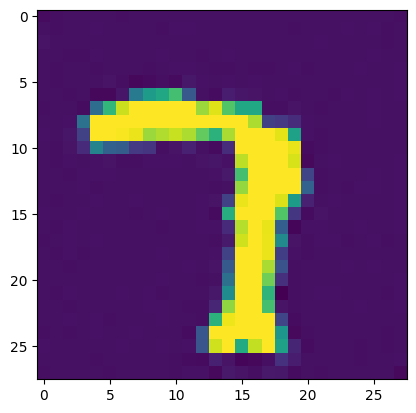


Epoch: 10 | Learning Rate: 0.001
0.046027347445487976
0.04683922976255417
0.04738293215632439
0.047475337982177734
0.04492006078362465
0.04856095463037491
0.046188291162252426
0.044005490839481354
0.04690434783697128
0.04857402294874191
0.04847368970513344
0.047689709812402725
0.048254288733005524
0.047646742314100266
0.048780303448438644
0.04543328657746315
0.048428427428007126
0.044940222054719925
0.04628023877739906
0.047112639993429184
0.04765528067946434
0.04617970064282417
0.047731492668390274
0.04709631949663162
0.049197178333997726
0.04566244035959244
0.045512605458498
0.04543673247098923
0.04716670513153076
0.0469333790242672
0.04953624680638313
0.04648220166563988
0.04471951350569725
0.0473710373044014
0.044133298099040985
0.04526163637638092
0.044913966208696365
0.047553908079862595
0.04840903356671333
0.04537203907966614
0.04529455676674843
0.04541778936982155
0.04565296322107315
0.04767952859401703
0.04520648717880249
0.04463953897356987
0.04564216732978821
0.046843018382

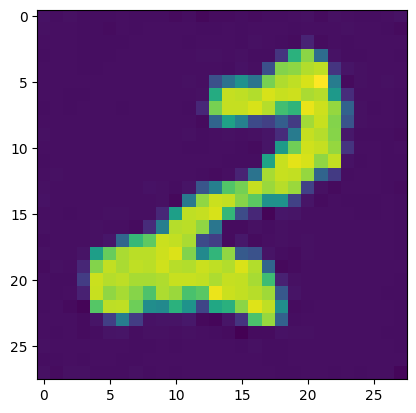


Epoch: 11 | Learning Rate: 0.0008
0.045252759009599686
0.04714977368712425
0.047671686857938766
0.045495256781578064
0.04497232288122177
0.04273753613233566
0.046281345188617706
0.044604748487472534
0.04663808271288872
0.04696683958172798
0.04879619553685188
0.045169658958911896
0.046481043100357056
0.04712154343724251
0.045710522681474686
0.042136166244745255
0.04271962493658066
0.044635120779275894
0.045461639761924744
0.0480889193713665
0.04436624050140381
0.043632540851831436
0.04640719294548035
0.04506426677107811
0.04645642265677452
0.04396987333893776
0.0427187904715538
0.04594039171934128
0.04262683913111687
0.043705567717552185
0.043634913861751556
0.046653252094984055
0.045145753771066666
0.04673561081290245
0.044037412852048874
0.04708902910351753
0.04685124382376671
0.04466531053185463
0.044517748057842255
0.04384452477097511
0.049386054277420044
0.04426597058773041
0.04298387095332146
0.04424184188246727
0.04470480605959892
0.04568115994334221
0.04485810548067093
0.046883

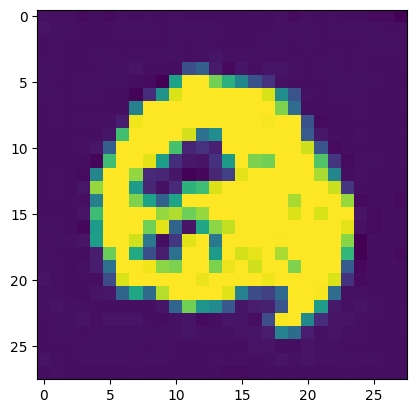


Epoch: 12 | Learning Rate: 0.0008
0.043461646884679794
0.043492842465639114
0.04335935041308403
0.044991299510002136
0.04370609670877457
0.04582555219531059
0.04496901109814644
0.0466148741543293
0.04643780738115311
0.043475937098264694
0.04585513845086098
0.04470429942011833
0.045644111931324005
0.04372997581958771
0.045244984328746796
0.04573666304349899
0.048552870750427246
0.04294945299625397
0.04494304955005646
0.045286502689123154
0.04238193854689598
0.04745595529675484
0.04405074939131737
0.04553442820906639
0.044869523495435715
0.04559892416000366
0.04416518285870552
0.0469154417514801
0.04606994241476059
0.0463482104241848
0.04413438215851784
0.044951774179935455
0.04587294161319733
0.04511278495192528
0.04697062820196152
0.04627889394760132
0.045594848692417145
0.04370614513754845
0.045220986008644104
0.04456397518515587
0.045707255601882935
0.04353935271501541
0.043733350932598114
0.04338141903281212
0.041787803173065186
0.04807138815522194
0.044886067509651184
0.0479176379

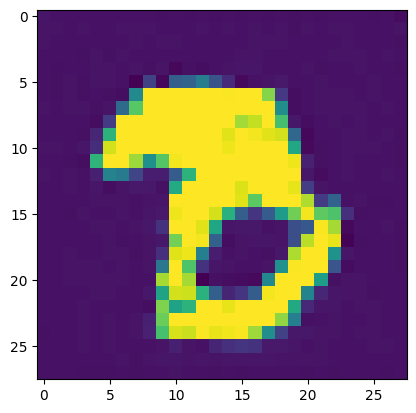


Epoch: 13 | Learning Rate: 0.0008
0.046048276126384735
0.04340897127985954
0.04626649618148804
0.04533151164650917
0.043213851749897
0.04442493990063667
0.045113928616046906
0.042905718088150024
0.04434879496693611
0.04442806541919708
0.04436713829636574
0.04214143753051758
0.04368385300040245
0.044244393706321716
0.043250687420368195
0.04313625395298004
0.043386463075876236
0.0420290008187294
0.043222006410360336
0.04247364029288292
0.04549765959382057
0.043278537690639496
0.04084372892975807
0.04547294229269028
0.04448719322681427
0.04521019384264946
0.04473298415541649
0.04484252631664276
0.04279140383005142
0.0441899299621582
0.04493417963385582
0.045094069093465805
0.04506899416446686
0.04507853463292122
0.04486287385225296
0.044731274247169495
0.042999207973480225
0.04399343952536583
0.042048048228025436
0.04152282327413559
0.045100755989551544
0.044088833034038544
0.04338431730866432
0.04639673978090286
0.04296637326478958
0.044089190661907196
0.04310161620378494
0.043567657470

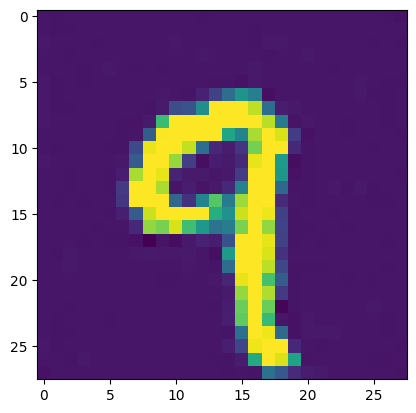


Epoch: 14 | Learning Rate: 0.0008
0.04662067070603371
0.041614774614572525
0.04350963979959488
0.0440204031765461
0.04328438639640808
0.04316158592700958
0.0456092432141304
0.04235221818089485
0.04353594779968262
0.043963175266981125
0.04581424221396446
0.0421975739300251
0.04267748072743416
0.043633606284856796
0.04407905787229538
0.04537827521562576
0.04126822203397751
0.04330400377511978
0.042734544724226
0.04390743747353554
0.045032333582639694
0.044642288237810135
0.04495050758123398
0.043118320405483246
0.04500119388103485
0.04268831014633179
0.044357288628816605
0.04460643231868744
0.04504716396331787
0.04061983898282051
0.0440635085105896
0.0438121072947979
0.04163837805390358
0.042963527143001556
0.04341737553477287
0.04190598800778389
0.042940184473991394
0.04512275010347366
0.04520826414227486
0.044922687113285065
0.04121475666761398
0.04206956923007965
0.04230572283267975
0.042631909251213074
0.044753298163414
0.044702306389808655
0.04546074569225311
0.043262019753456116
0

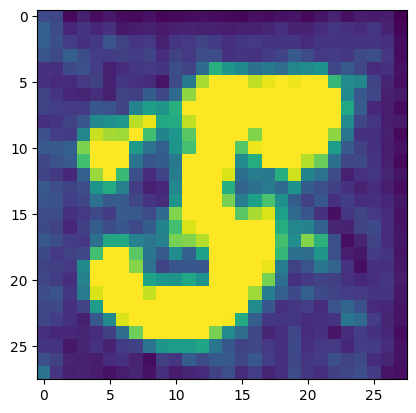


Epoch: 15 | Learning Rate: 0.0008
0.042743828147649765
0.043161313980817795
0.04415425285696983
0.04514969885349274
0.044035639613866806
0.04383106529712677
0.045073892921209335
0.04473365098237991
0.04376671835780144
0.045406825840473175
0.04076932370662689
0.04428974539041519
0.04193427041172981
0.04202962666749954
0.040818262845277786
0.046287234872579575
0.04272621497511864
0.041664522141218185
0.044623151421546936
0.04460093751549721
0.04368351027369499
0.045191068202257156
0.04393231123685837
0.04444361478090286
0.043834052979946136
0.04403525963425636
0.04347066953778267
0.041595108807086945
0.04148106649518013
0.042805563658475876
0.044406160712242126
0.044801875948905945
0.04024902731180191
0.04150380194187164
0.04409588500857353
0.0454665906727314
0.043175987899303436
0.04264480248093605
0.04259765148162842
0.043787721544504166
0.04371447488665581
0.04283899441361427
0.04160330817103386
0.04244030639529228
0.04352671653032303
0.042142320424318314
0.04200125113129616
0.044191

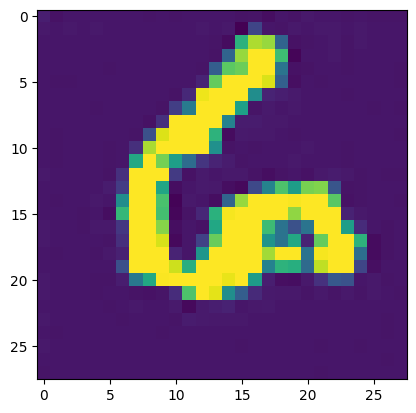


Epoch: 16 | Learning Rate: 0.0008
0.040864650160074234
0.04411650449037552
0.042055439203977585
0.042756229639053345
0.040646135807037354
0.042760882526636124
0.04487861320376396
0.04216014966368675
0.04242397099733353
0.045133545994758606
0.04220521077513695
0.04645683243870735
0.043173469603061676
0.0405583530664444
0.041641272604465485
0.04131527245044708
0.04418597370386124
0.04287499561905861
0.043175432831048965
0.041598737239837646
0.04022211581468582
0.043547701090574265
0.04519066959619522
0.04211663082242012
0.04177699610590935
0.04269303008913994
0.043064504861831665
0.043464045971632004
0.0405372679233551
0.04152824729681015
0.04190409183502197
0.0411229133605957
0.04238095134496689
0.040784984827041626
0.04231889173388481
0.04271915927529335
0.042230937629938126
0.04363154247403145
0.04051366448402405
0.0413285493850708
0.0405152402818203
0.040440402925014496
0.04370378330349922
0.04247908666729927
0.044325247406959534
0.044998325407505035
0.04031405225396156
0.0412148237

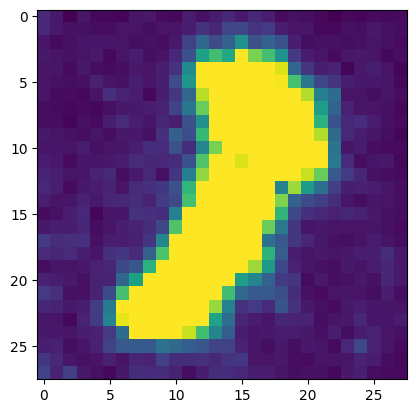


Epoch: 17 | Learning Rate: 0.0008
0.04279670491814613
0.04171127453446388
0.03974490612745285
0.04212077707052231
0.042227938771247864
0.04320116713643074
0.04117831215262413
0.04456924647092819
0.04278191551566124
0.03952189162373543
0.043603215366601944
0.04309280589222908
0.03870510309934616
0.043639056384563446
0.041345518082380295
0.04176882281899452
0.04159374535083771
0.04411562532186508
0.04195354878902435
0.04021726921200752
0.04195262864232063
0.041294582188129425
0.04114532470703125
0.04019550979137421
0.042865581810474396
0.04052058979868889
0.040243200957775116
0.04069000110030174
0.04149584844708443
0.041962627321481705
0.04160364344716072
0.04223135486245155
0.04387669637799263
0.0425695963203907
0.0414682999253273
0.043303243815898895
0.042200494557619095
0.04190335050225258
0.04194420203566551
0.04196259751915932
0.04180188104510307
0.04095178097486496
0.041762515902519226
0.04080633446574211
0.03921585530042648
0.04479903355240822
0.04180366173386574
0.04237262159585

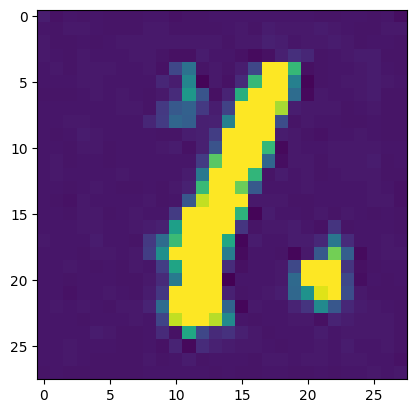


Epoch: 18 | Learning Rate: 0.0008
0.04177917540073395
0.04183873161673546
0.041579123586416245
0.042187973856925964
0.042814262211322784
0.039451371878385544
0.04160010814666748
0.04183775931596756
0.0413639098405838
0.04177813231945038
0.04062890261411667
0.04150252789258957
0.040611036121845245
0.04375540837645531
0.0412944070994854
0.04147753864526749
0.04385640099644661
0.0436398908495903
0.04053538665175438
0.041882310062646866
0.04078321158885956
0.040258076041936874
0.04127175733447075
0.041672661900520325
0.04038083180785179
0.03985616937279701
0.04112453758716583
0.03926227241754532
0.040998637676239014
0.04202120378613472
0.04152452573180199
0.040272168815135956
0.041281722486019135
0.04123983532190323
0.03878539428114891
0.04015812650322914
0.04152490198612213
0.04148464649915695
0.042238350957632065
0.040598079562187195
0.039938680827617645
0.04219532385468483
0.04228517785668373
0.04253530502319336
0.040589865297079086
0.04000209644436836
0.03833324462175369
0.04514925181

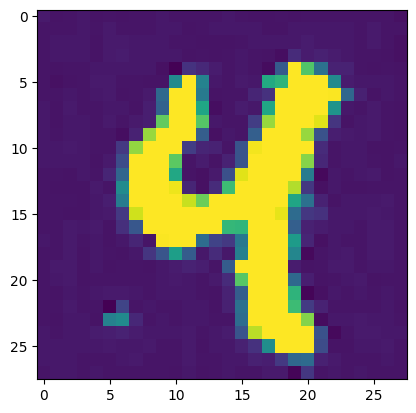


Epoch: 19 | Learning Rate: 0.0008
0.0407736599445343
0.041332680732011795
0.04038601368665695
0.042459554970264435
0.03963784500956535
0.0413769967854023
0.04155617207288742
0.041168298572301865
0.04058224335312843
0.0402817539870739
0.039627235382795334
0.045689865946769714
0.0411192886531353
0.03831973299384117
0.039571452885866165
0.04280071333050728
0.04155777022242546
0.04051512852311134
0.03952152654528618
0.04091254621744156
0.04037350043654442
0.04125121235847473
0.04139053076505661
0.043373268097639084
0.04184512794017792
0.04215271398425102
0.04160924255847931
0.039566803723573685
0.03994646295905113
0.0408872589468956
0.039200276136398315
0.03813490644097328
0.041752494871616364
0.04101772978901863
0.04051430895924568
0.03788036108016968
0.04102412983775139
0.040382154285907745
0.04105604439973831
0.041384968906641006
0.040354590862989426
0.040253620594739914
0.04036908596754074
0.03985476493835449
0.0405515655875206
0.03924710676074028
0.04038308188319206
0.039389330893754

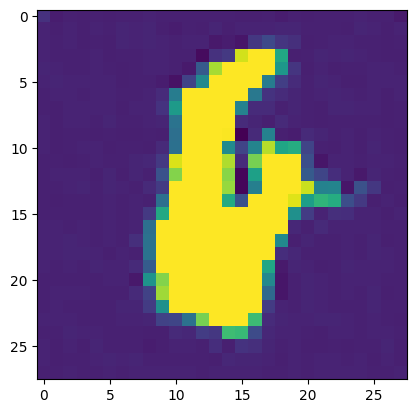


Epoch: 20 | Learning Rate: 0.0008
0.04100482165813446
0.041973814368247986
0.03780476376414299
0.04145844653248787
0.039137180894613266
0.037404630333185196
0.039996176958084106
0.04006065055727959
0.04029107093811035
0.03990469500422478
0.039378389716148376
0.038689207285642624
0.03855137526988983
0.0402325838804245
0.04183089733123779
0.03871114179491997
0.03965666890144348
0.04000364989042282
0.041253045201301575
0.039301615208387375
0.04127991944551468
0.04081420972943306
0.04004325345158577
0.03839976713061333
0.03860703110694885
0.04093553498387337
0.039444152265787125
0.040247537195682526
0.04396185651421547
0.041591472923755646
0.03715731203556061
0.04171471670269966
0.04091323912143707
0.040665507316589355
0.04175988584756851
0.040304914116859436
0.0400146022439003
0.03878244757652283
0.040043432265520096
0.042067401111125946
0.040284138172864914
0.03999623283743858
0.042740412056446075
0.04111204296350479
0.038285333663225174
0.04190823435783386
0.040320876985788345
0.040990

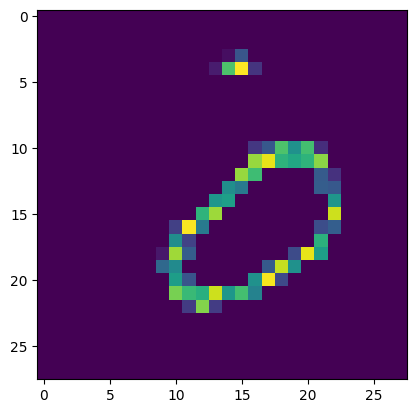


Epoch: 21 | Learning Rate: 0.00064
0.03846553713083267
0.041569557040929794
0.040200550109148026
0.04244116321206093
0.03889041021466255
0.04048415645956993
0.03791408985853195
0.03836457058787346
0.0378011055290699
0.04048555716872215
0.038234394043684006
0.041078414767980576
0.04041413962841034
0.03877650573849678
0.039330244064331055
0.041438616812229156
0.03992472216486931
0.04030778259038925
0.04166331887245178
0.042122647166252136
0.04232947528362274
0.03913026675581932
0.04304620251059532
0.042302004992961884
0.03913414478302002
0.040359143167734146
0.03945304453372955
0.03811557590961456
0.03926219046115875
0.038895636796951294
0.040767695754766464
0.04034486040472984
0.040790677070617676
0.03973754867911339
0.04031418636441231
0.042527325451374054
0.039199888706207275
0.03686491400003433
0.043004024773836136
0.042494457215070724
0.03847234696149826
0.0371851846575737
0.0417725145816803
0.03932248800992966
0.040795788168907166
0.038974080234766006
0.041860371828079224
0.038382

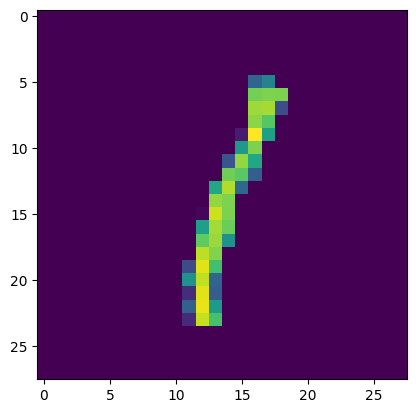


Epoch: 22 | Learning Rate: 0.00064
0.041695836931467056
0.04036148637533188
0.039832863956689835
0.03896218165755272
0.038614336401224136
0.03946707397699356
0.040504537522792816
0.03757297620177269
0.03830523416399956
0.03935587406158447
0.038659196346998215
0.04166540130972862
0.03905445709824562
0.03863015025854111
0.03807899355888367
0.04134521260857582
0.04190804436802864
0.03942874073982239
0.04011550545692444
0.04151604697108269
0.041099317371845245
0.04075261205434799
0.04232848435640335
0.03900624066591263
0.03755856305360794
0.0410696417093277
0.0377238430082798
0.03846146538853645
0.040817782282829285
0.037569329142570496
0.0384962297976017
0.04082084074616432
0.04008590802550316
0.041715025901794434
0.03843926638364792
0.03949068486690521
0.04065496847033501
0.04115822911262512
0.04180894419550896
0.040583252906799316
0.038805536925792694
0.03841286897659302
0.04063872992992401
0.039848171174526215
0.039665378630161285
0.04031893238425255
0.03734763339161873
0.040913049131

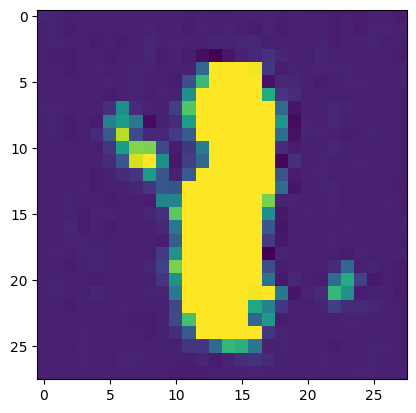


Epoch: 23 | Learning Rate: 0.00064
0.04138755798339844
0.03725157678127289
0.04062720760703087
0.04127775505185127
0.04129745438694954
0.040560975670814514
0.038089681416749954
0.03848905861377716
0.04041221737861633
0.042376454919576645
0.03996835649013519
0.04117869585752487
0.040822990238666534
0.04257289692759514
0.03814246505498886
0.03790966421365738
0.039196837693452835
0.04126327112317085
0.03870365023612976
0.03876892477273941
0.040306638926267624
0.041708216071128845
0.03983955830335617
0.038348834961652756
0.04094851762056351
0.04317587986588478
0.04159212112426758
0.036280106753110886
0.03971339017152786
0.03898392990231514
0.04148979112505913
0.0413641519844532
0.03973168134689331
0.04028473421931267
0.04026714339852333
0.03757579252123833
0.039694782346487045
0.041676733642816544
0.041505709290504456
0.040150102227926254
0.040326785296201706
0.04064326360821724
0.038229409605264664
0.039917636662721634
0.03912632167339325
0.03951137512922287
0.040916625410318375
0.039310

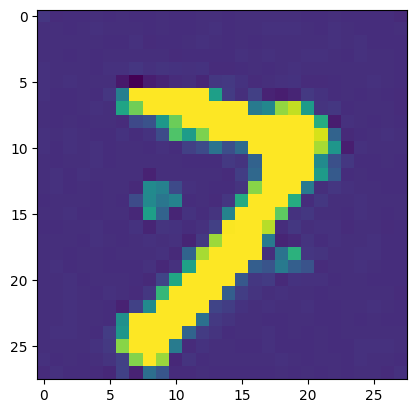


Epoch: 24 | Learning Rate: 0.00064
0.04217805713415146
0.036837756633758545
0.039813295006752014
0.037716612219810486
0.04113048315048218
0.039876293390989304
0.037948962301015854
0.04118741303682327
0.041499216109514236
0.0395842045545578
0.04180944710969925
0.038322724401950836
0.042570605874061584
0.04103317856788635
0.04319118708372116
0.03764429688453674
0.03894413262605667
0.040202729403972626
0.04086259379982948
0.04049858823418617
0.04024069011211395
0.04067225381731987
0.03883078694343567
0.037913959473371506
0.03723336011171341
0.03687095642089844
0.03823453560471535
0.039506278932094574
0.03950068727135658
0.039691489189863205
0.03861748427152634
0.03927210718393326
0.03891117498278618
0.04041334614157677
0.03917473927140236
0.03829886391758919
0.04019070416688919
0.039828523993492126
0.039500441402196884
0.03849930316209793
0.038621023297309875
0.04138591140508652
0.03988635167479515
0.04095969349145889
0.03853682428598404
0.04007444903254509
0.039179712533950806
0.0402535

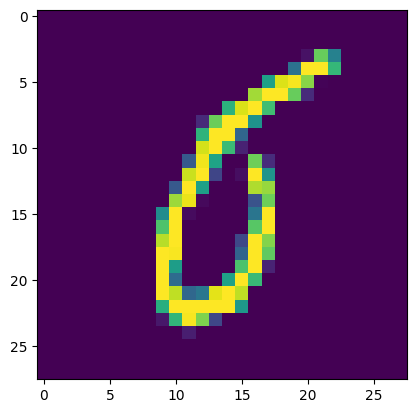


Epoch: 25 | Learning Rate: 0.00064
0.038862623274326324
0.041933272033929825
0.03717673942446709
0.03742886334657669
0.03955940529704094
0.03707781434059143
0.04326840862631798
0.04063238948583603
0.03744819760322571
0.039040494710206985
0.03909783065319061
0.03896038979291916
0.040211524814367294
0.03839699923992157
0.039767906069755554
0.040408942848443985
0.039141956716775894
0.03826359659433365
0.041713591665029526
0.03819720447063446
0.03852517902851105
0.037829019129276276
0.03863155096769333
0.039035290479660034
0.03914566710591316
0.03754869103431702
0.03854421153664589
0.03801210969686508
0.04081277921795845
0.04043060541152954
0.03687599301338196
0.03741632401943207
0.03988546133041382
0.03880305960774422
0.03862500190734863
0.03809408098459244
0.040361691266298294
0.038777243345975876
0.03639096021652222
0.040464501827955246
0.03721904009580612
0.04030480608344078
0.038873981684446335
0.0382467657327652
0.04177307337522507
0.03932735696434975
0.039034705609083176
0.03813362

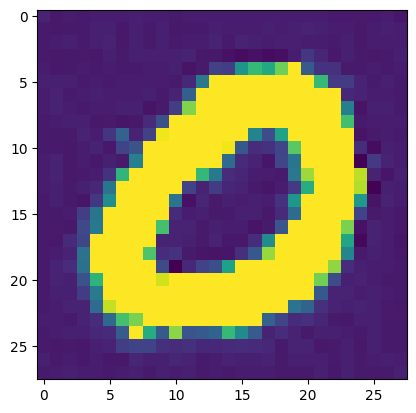


Epoch: 26 | Learning Rate: 0.00064
0.04169933497905731
0.03994263708591461
0.03852428123354912
0.0384545773267746
0.03835003077983856
0.04048272594809532
0.03794459253549576
0.03875544294714928
0.03754093497991562
0.0381227508187294
0.03900584205985069
0.038262225687503815
0.03889385610818863
0.03794446587562561
0.037130944430828094
0.040470827370882034
0.036651432514190674
0.03855562210083008
0.03854978084564209
0.04070347547531128
0.04022588953375816
0.03834071755409241
0.03885513171553612
0.03952304646372795
0.0379040390253067
0.03874829411506653
0.038075804710388184
0.03743994981050491
0.04043678194284439
0.03869807347655296
0.03928547725081444
0.03944200649857521
0.040624286979436874
0.038886658847332
0.03666004538536072
0.03945852816104889
0.04121735692024231
0.03965378925204277
0.03911202773451805
0.03894033655524254
0.03845031559467316
0.0400225855410099
0.040026839822530746
0.03873202204704285
0.03819688782095909
0.03732610493898392
0.039683420211076736
0.04028239846229553
0.

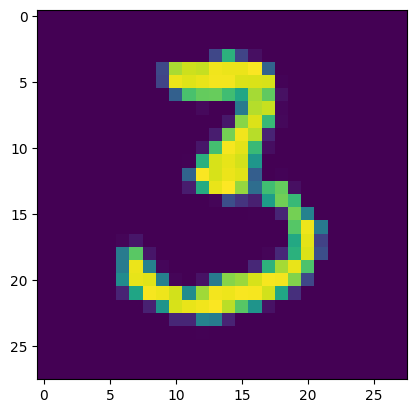


Epoch: 27 | Learning Rate: 0.00064
0.03712482377886772
0.04079899936914444
0.03709005191922188
0.04026324301958084
0.04028156399726868
0.039437126368284225
0.03802954778075218
0.03825347125530243
0.03785088658332825
0.03949344903230667
0.039095569401979446
0.03723382204771042
0.03889431804418564
0.03864803910255432
0.0375509150326252
0.03955637291073799
0.03803493455052376
0.036708515137434006
0.0390179380774498
0.038285110145807266
0.03723184019327164
0.038773972541093826
0.03854551911354065
0.03730093315243721
0.03700548782944679
0.03831786289811134
0.03892366588115692
0.039650771766901016
0.038320548832416534
0.04019809886813164
0.03787646070122719
0.03844062611460686
0.03742561861872673
0.04020707681775093
0.03842205926775932
0.04043176770210266
0.040287893265485764
0.040868472307920456
0.03871593996882439
0.03810783848166466
0.038399238139390945
0.03897721320390701
0.038764797151088715
0.03868953138589859
0.038171228021383286
0.04088851436972618
0.037678081542253494
0.04041459783

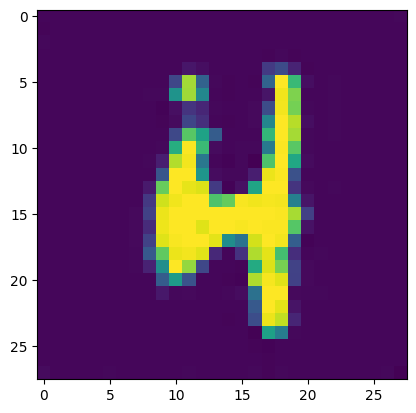


Epoch: 28 | Learning Rate: 0.00064
0.03890550136566162
0.03806992620229721
0.03903009742498398
0.03750011324882507
0.03971375897526741
0.03820788860321045
0.038814663887023926
0.04262649640440941
0.040206387639045715
0.04049481451511383
0.03764595463871956
0.0388353057205677
0.03818473592400551
0.03904348239302635
0.03737384453415871
0.03843977302312851
0.03797547519207001
0.03949291259050369
0.03887845575809479
0.03809606656432152
0.03987294062972069
0.03757019713521004
0.035177331417798996
0.036642588675022125
0.04034755751490593
0.04003455117344856
0.03934066742658615
0.039205361157655716
0.03815493732690811
0.03561369702219963
0.036179881542921066
0.03594568371772766
0.0374285988509655
0.0375521183013916
0.03816332295536995
0.03941769152879715
0.039933156222105026
0.039079878479242325
0.03595241531729698
0.038903187960386276
0.03771115094423294
0.03954753279685974
0.03904947638511658
0.03596099466085434
0.03683658689260483
0.0403841957449913
0.03822460398077965
0.04129043966531753

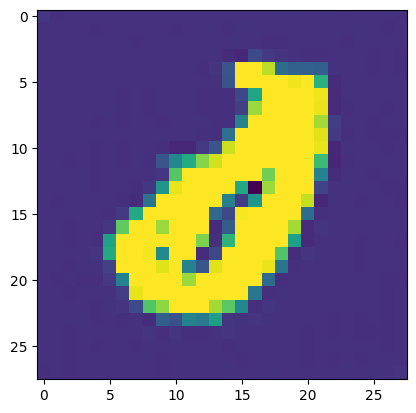


Epoch: 29 | Learning Rate: 0.00064
0.03855980187654495
0.03862994909286499
0.037568677216768265
0.038655687123537064
0.0392877422273159
0.0385885089635849
0.03890150412917137
0.03808536008000374
0.038503002375364304
0.0376022644340992
0.038580361753702164
0.03737696632742882
0.03690888360142708
0.03859056159853935
0.03410842642188072
0.03705808147788048
0.03912844508886337
0.040817975997924805
0.041536301374435425
0.035862863063812256
0.03915143385529518
0.03763139247894287
0.03564998880028725
0.03965175151824951
0.0384729839861393
0.03787664324045181
0.03999932482838631
0.04085979610681534
0.03842556104063988
0.03878317400813103
0.0392402745783329
0.03604182228446007
0.03727857023477554
0.039448849856853485
0.039424262940883636
0.03887220844626427
0.03682674095034599
0.03877408057451248
0.0384795106947422
0.038705699145793915
0.03961404412984848
0.038700420409440994
0.03913712501525879
0.0397823303937912
0.03891431540250778
0.038119327276945114
0.03830653801560402
0.03671226650476456

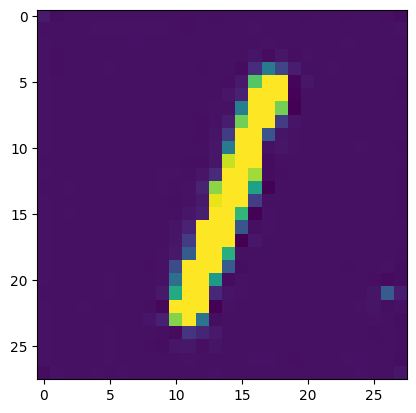


Epoch: 30 | Learning Rate: 0.00064
0.037504617124795914
0.03793661296367645
0.03838125616312027
0.04025302827358246
0.037520866841077805
0.040196001529693604
0.03900084272027016
0.03975601866841316
0.03890374302864075
0.038082681596279144
0.038413893431425095
0.0376398079097271
0.0388784222304821
0.036452654749155045
0.03790147230029106
0.03762849047780037
0.037515319883823395
0.039445482194423676
0.039299510419368744
0.040454886853694916
0.04244416952133179
0.03896009176969528
0.03928368538618088
0.04008597880601883
0.03759472817182541
0.03947598487138748
0.03854230046272278
0.03762330487370491
0.039416421204805374
0.03965950384736061
0.037832729518413544
0.03919847682118416
0.040620919317007065
0.03788737207651138
0.03880412504076958
0.038822729140520096
0.038911037147045135
0.038317613303661346
0.03759775310754776
0.03849880024790764
0.03740350157022476
0.040312010794878006
0.039817459881305695
0.0405929870903492
0.03718318045139313
0.03896056488156319
0.0391758494079113
0.03630005

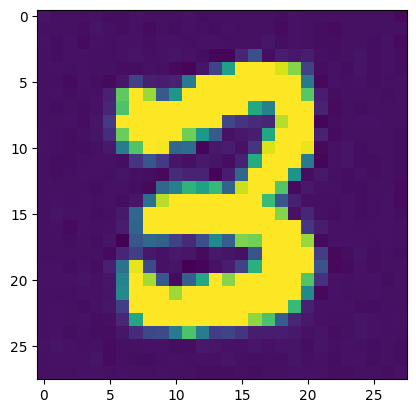


Epoch: 31 | Learning Rate: 0.0005120000000000001
0.03888876363635063
0.040111806243658066
0.041141577064991
0.0395905040204525
0.04015330970287323
0.03738461807370186
0.036614105105400085
0.037304025143384933
0.03788734972476959
0.039520613849163055
0.038573477417230606
0.03704838827252388
0.03861263394355774
0.03784055635333061
0.03634536266326904
0.039106544107198715
0.03653612732887268
0.03674660623073578
0.03603769838809967
0.0369211882352829
0.03692161291837692
0.03870280459523201
0.03549141809344292
0.038418225944042206
0.037908826023340225
0.03979457542300224
0.0358797088265419
0.03830526024103165
0.03796088322997093
0.03772607445716858
0.03763170167803764
0.037838298827409744
0.03656693920493126
0.03852634131908417
0.03792784735560417
0.03922462835907936
0.03808405250310898
0.039457593113183975
0.038355063647031784
0.03792918100953102
0.03631376475095749
0.038542456924915314
0.0373961515724659
0.040915265679359436
0.036046240478754044
0.039092838764190674
0.03737425059080124
0

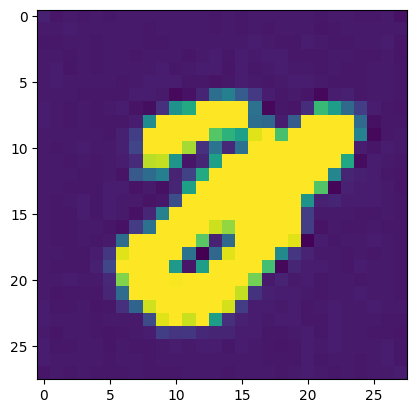


Epoch: 32 | Learning Rate: 0.0005120000000000001
0.035592108964920044
0.037265632301568985
0.03805823251605034
0.03787410259246826
0.03672979399561882
0.040339112281799316
0.0361284464597702
0.0387645848095417
0.036937467753887177
0.039471011608839035
0.03852466866374016
0.03880978003144264
0.039045803248882294
0.03809613361954689
0.03793163225054741
0.03972720354795456
0.037405211478471756
0.04036066308617592
0.04027371108531952
0.03917090222239494
0.038115691393613815
0.03780689835548401
0.03967958688735962
0.03626827895641327
0.03671015799045563
0.03824944049119949
0.03821183368563652
0.03694579377770424
0.03848079591989517
0.036310359835624695
0.03931088373064995
0.038175296038389206
0.038871150463819504
0.037398260086774826
0.03674982115626335
0.03652338683605194
0.03742847219109535
0.037943948060274124
0.03733102232217789
0.03752465546131134
0.03768467158079147
0.03935908526182175
0.03623685985803604
0.03925352916121483
0.03844728693366051
0.03768102824687958
0.03795187175273895

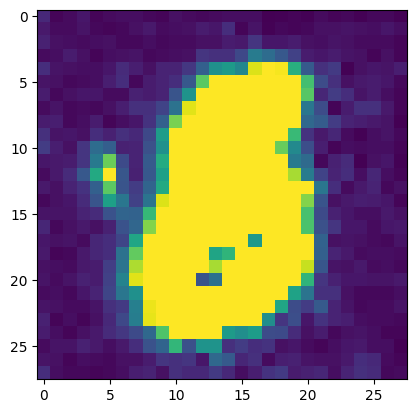


Epoch: 33 | Learning Rate: 0.0005120000000000001
0.03803442791104317
0.03871007636189461
0.03831413760781288
0.03886309638619423
0.039251137524843216
0.03729170188307762
0.03914696350693703
0.037134915590286255
0.03944632038474083
0.036397695541381836
0.03861420974135399
0.03744843602180481
0.036731041967868805
0.03976207599043846
0.03796824440360069
0.03715173900127411
0.0369713120162487
0.03711222857236862
0.036462049931287766
0.03586209565401077
0.0390871986746788
0.037977151572704315
0.03685073181986809
0.038279879838228226
0.038627419620752335
0.037197746336460114
0.03852136433124542
0.03865095600485802
0.03787772357463837
0.037497032433748245
0.03868192434310913
0.03824533522129059
0.038962263613939285
0.03871695697307587
0.038042400032281876
0.036746419966220856
0.03871608525514603
0.03845814988017082
0.038776811212301254
0.04081561416387558
0.03702324628829956
0.03923483565449715
0.03764999657869339
0.03609232231974602
0.039276860654354095
0.03772343322634697
0.038496844470500

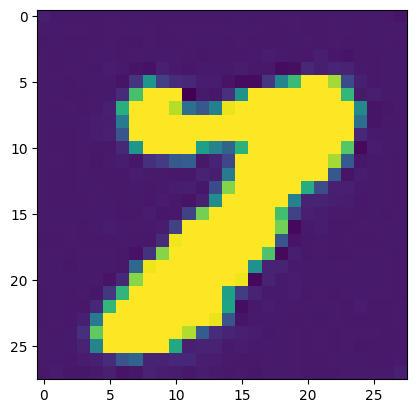


Epoch: 34 | Learning Rate: 0.0005120000000000001
0.038658976554870605
0.03574937954545021
0.03800281509757042
0.039160653948783875
0.03717586770653725
0.03865032270550728
0.0381501242518425
0.03638254851102829
0.03390175849199295
0.0358676016330719
0.03890858590602875
0.03797071799635887
0.0375373400747776
0.036829184740781784
0.038286469876766205
0.04060971736907959
0.037543460726737976
0.03697415813803673
0.03614859655499458
0.037105459719896317
0.037842828780412674
0.03749644756317139
0.036272354423999786
0.04007047042250633
0.03707575052976608
0.03504840284585953
0.039070773869752884
0.03746023774147034
0.03802899271249771
0.03869398310780525
0.03615104779601097
0.03929374739527702
0.03680281341075897
0.03500965237617493
0.03630055487155914
0.036983489990234375
0.03602335974574089
0.03781724348664284
0.03641871362924576
0.0388302318751812
0.03917911648750305
0.03981732577085495
0.040428128093481064
0.04013296216726303
0.03745276853442192
0.03651722893118858
0.03863974288105965
0.0

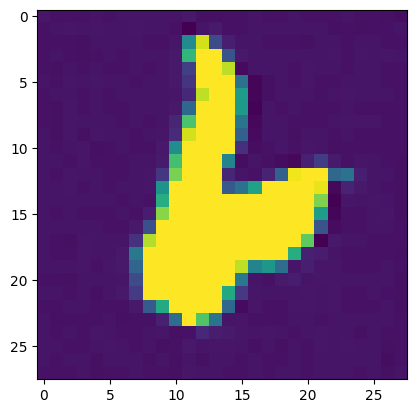


Epoch: 35 | Learning Rate: 0.0005120000000000001
0.03741791471838951
0.03642585128545761
0.03713933378458023
0.03876040130853653
0.0357641838490963
0.03786895051598549
0.03756338357925415
0.035977717489004135
0.038269106298685074
0.03601016104221344
0.03811798617243767
0.03758293390274048
0.03819139674305916
0.04159962385892868
0.036584869027137756
0.03836045041680336
0.03762975335121155
0.039066825062036514
0.038201961666345596
0.03746549040079117
0.037528593093156815
0.036790426820516586
0.035060953348875046
0.0376598984003067
0.03987250104546547
0.038549505174160004
0.03722492232918739
0.03617248684167862
0.03775299713015556
0.03941706568002701
0.03752314671874046
0.03869009390473366
0.0382392592728138
0.03761763870716095
0.036829907447099686
0.0354514941573143
0.038348741829395294
0.038017407059669495
0.03890003263950348
0.037874266505241394
0.037475600838661194
0.03891284391283989
0.039056532084941864
0.03721259906888008
0.040073152631521225
0.03760938346385956
0.0382793769240379

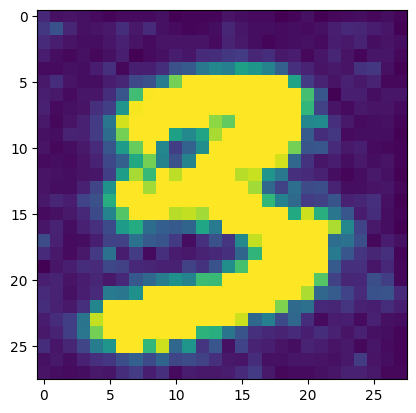


Epoch: 36 | Learning Rate: 0.0005120000000000001
0.03525068238377571
0.03999490290880203
0.03788953274488449
0.0386473722755909
0.037748031318187714
0.03708538040518761
0.03879276663064957
0.03595463186502457
0.03763726353645325
0.03700418397784233
0.038390617817640305
0.04001828655600548
0.03789686784148216
0.03724455088376999
0.03947572410106659
0.03565097227692604
0.037149082869291306
0.03749332204461098
0.037352122366428375
0.03727779909968376
0.036899384111166
0.03751220554113388
0.03791464865207672
0.03701786696910858
0.038272686302661896
0.039262112230062485
0.037328947335481644
0.03753617778420448
0.03789466619491577
0.038478150963783264
0.03789350017905235
0.038011595606803894
0.037059251219034195
0.03802932798862457
0.03594348207116127
0.03724315017461777
0.038159068673849106
0.038046155124902725
0.03816184774041176
0.03754771873354912
0.036382004618644714
0.036759886890649796
0.03872046619653702
0.035620082169771194
0.03868239000439644
0.03719589486718178
0.0385170206427574

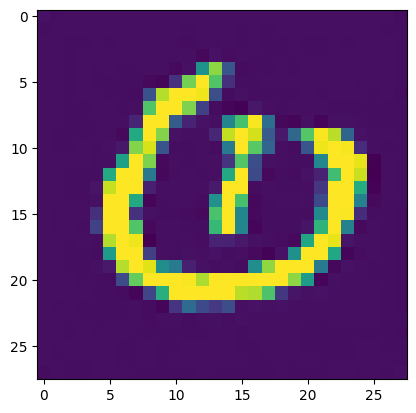


Epoch: 37 | Learning Rate: 0.0005120000000000001
0.035725537687540054
0.03748119994997978
0.03689896687865257
0.03757978230714798
0.038308318704366684
0.03663788363337517
0.03598342463374138
0.035767506808042526
0.037322916090488434
0.03491044044494629
0.04004759341478348
0.038728371262550354
0.03670916706323624
0.037944260984659195
0.039562251418828964
0.03564665839076042
0.03725181892514229
0.035630639642477036
0.0381215363740921
0.0373261421918869
0.03762735053896904
0.036841604858636856
0.03763865306973457
0.037653692066669464
0.03815576061606407
0.03869321569800377
0.035114217549562454
0.03788711130619049
0.03721097111701965
0.037479985505342484
0.03968915715813637
0.04053106904029846
0.03667439520359039
0.036046724766492844
0.03773952275514603
0.037006448954343796
0.038077324628829956
0.03883105888962746
0.03562425076961517
0.03724915161728859
0.03620678558945656
0.03688834235072136
0.038540732115507126
0.03959256038069725
0.037249889224767685
0.038741763681173325
0.037348378449

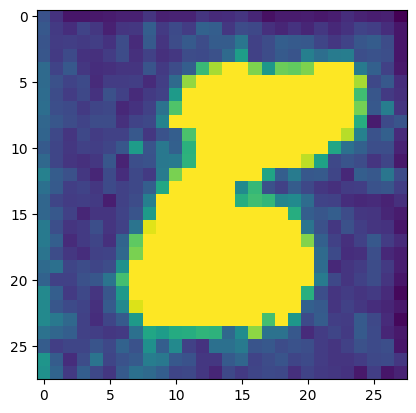


Epoch: 38 | Learning Rate: 0.0005120000000000001
0.03817106783390045
0.037586744874715805
0.036903347820043564
0.0382872112095356
0.037681352347135544
0.03591575846076012
0.037042371928691864
0.038565896451473236
0.034029360860586166
0.03765165060758591
0.03669114038348198
0.03761908784508705
0.03817319869995117
0.03867446258664131
0.037975046783685684
0.036944370716810226
0.03784051164984703
0.03622483089566231
0.03712188079953194
0.03679218143224716
0.03719336912035942
0.03783666715025902
0.04017536714673042
0.03877010941505432
0.03836965560913086
0.038148269057273865
0.03862132877111435
0.03658241778612137
0.036597996950149536
0.036929573863744736
0.038328737020492554
0.03903862461447716
0.037104688584804535
0.036146923899650574
0.03712918609380722
0.037589624524116516
0.03816275671124458
0.035212792456150055
0.03593262657523155
0.03731895983219147
0.03874810039997101
0.03740246966481209
0.037162210792303085
0.03640718385577202
0.03687278926372528
0.03889539837837219
0.036572001874

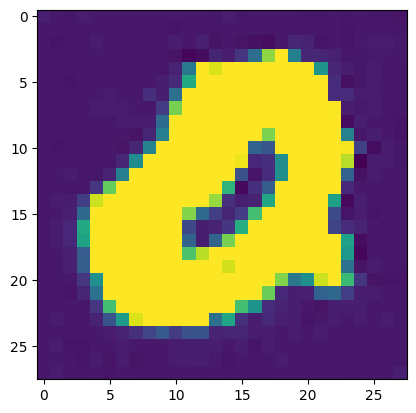


Epoch: 39 | Learning Rate: 0.0005120000000000001
0.036731816828250885
0.03796252980828285
0.03858070820569992
0.03834599256515503
0.03704240545630455
0.037360381335020065
0.036458373069763184
0.037111323326826096
0.035871654748916626
0.037321604788303375
0.038494985550642014
0.037958741188049316
0.038381390273571014
0.03849716857075691
0.03852056339383125
0.03578602895140648
0.03750105947256088
0.0359550379216671
0.03826069086790085
0.03700188174843788
0.03601199388504028
0.03885285556316376
0.037275154143571854
0.037173792719841
0.037854552268981934
0.03662551939487457
0.038311026990413666
0.03902976214885712
0.03885915130376816
0.037154391407966614
0.036611299961805344
0.03703486919403076
0.03729507327079773
0.03810269013047218
0.03904137387871742
0.03941349312663078
0.03557750582695007
0.03773627430200577
0.03787055239081383
0.035923127084970474
0.03853791207075119
0.03970172628760338
0.0353454165160656
0.03865063190460205
0.03868401050567627
0.03743642941117287
0.03865309059619903

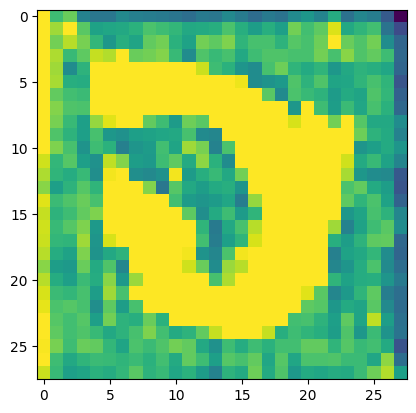


Epoch: 40 | Learning Rate: 0.0005120000000000001
0.03628247231245041
0.03789277747273445
0.03711840510368347
0.03679671511054039
0.03600398451089859
0.03732198849320412
0.0363762341439724
0.0357162244617939
0.036850858479738235
0.04003863036632538
0.03720306232571602
0.03669733926653862
0.035407863557338715
0.037277571856975555
0.0372568815946579
0.03651506453752518
0.03420613333582878
0.036171805113554
0.037745583802461624
0.03697533160448074
0.03872779756784439
0.03749828413128853
0.03627432882785797
0.036027126014232635
0.03865581378340721
0.03691190481185913
0.037189267575740814
0.037509288638830185
0.03641829267144203
0.03687131404876709
0.03804904595017433
0.035835620015859604
0.03637693449854851
0.03556623309850693
0.036742690950632095
0.03912843391299248
0.03984369337558746
0.0381280742585659
0.036703094840049744
0.0383576862514019
0.036589689552783966
0.03612714260816574
0.03573189303278923
0.03733421862125397
0.036698874086141586
0.03598577901721001
0.03765571862459183
0.035

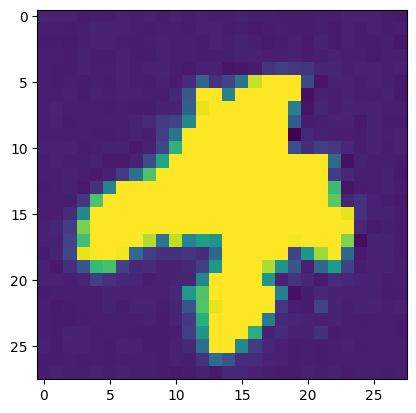


Epoch: 41 | Learning Rate: 0.0004096000000000001
0.0344645157456398
0.038178451359272
0.036618731915950775
0.03950491547584534
0.03855431079864502
0.03699544444680214
0.03711545094847679
0.037759892642498016
0.03667302057147026
0.036731455475091934
0.037305768579244614
0.03571352735161781
0.038265690207481384
0.03721535950899124
0.03671002388000488
0.03871966153383255
0.03629641234874725
0.037500761449337006
0.03369150683283806
0.035505980253219604
0.039366889744997025
0.03663929924368858
0.03601134195923805
0.036926623433828354
0.03461239114403725
0.03589608147740364
0.03725988045334816
0.03677317500114441
0.03876447677612305
0.036470189690589905
0.034639183431863785
0.0351950004696846
0.03317635506391525
0.03819946199655533
0.038989342749118805
0.03761163353919983
0.03826840594410896
0.03673606365919113
0.037519559264183044
0.03585830330848694
0.037811070680618286
0.03518811985850334
0.03694392740726471
0.03932459279894829
0.03807489573955536
0.0379936620593071
0.034886669367551804


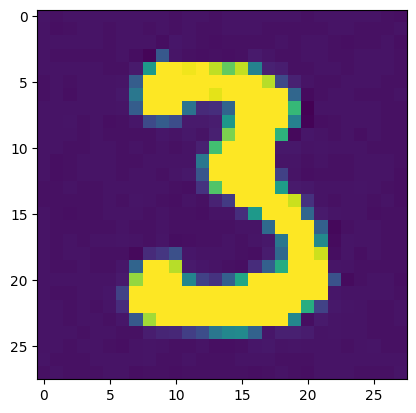


Epoch: 42 | Learning Rate: 0.0004096000000000001
0.036138080060482025
0.03651204705238342
0.03533352166414261
0.037080101668834686
0.035277143120765686
0.0377349779009819
0.03712494298815727
0.03748241066932678
0.03577946498990059
0.0364384651184082
0.038183387368917465
0.036728523671627045
0.035106029361486435
0.037898000329732895
0.035299137234687805
0.03548052906990051
0.037984732538461685
0.03751755878329277
0.03835871070623398
0.03639594092965126
0.037287332117557526
0.03673186153173447
0.036081552505493164
0.036952052265405655
0.03398624062538147
0.03609323501586914
0.03705239295959473
0.0353357270359993
0.03615521267056465
0.03709697350859642
0.03666527196764946
0.035062555223703384
0.03704606741666794
0.03587254881858826
0.03666672855615616
0.03565805405378342
0.03701280802488327
0.03705374151468277
0.03521767258644104
0.03738841041922569
0.04019664600491524
0.03890582546591759
0.03668305650353432
0.037357378751039505
0.037468452006578445
0.03850051388144493
0.0347303859889507

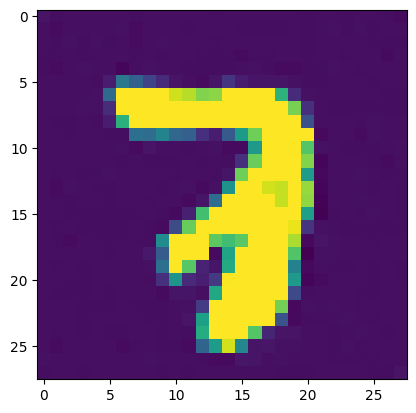


Epoch: 43 | Learning Rate: 0.0004096000000000001
0.036569807678461075
0.03750496357679367
0.035804446786642075
0.03588801249861717
0.03810014948248863
0.03711441531777382
0.03580952435731888
0.037302546203136444
0.03419240191578865
0.03684220835566521
0.03700869902968407
0.037366583943367004
0.03647470474243164
0.03832882642745972
0.03824795410037041
0.03667764365673065
0.036209482699632645
0.03694578632712364
0.039240963757038116
0.03788010776042938
0.0383722260594368
0.03700726851820946
0.038633354008197784
0.03735244274139404
0.03659040853381157
0.036006681621074677
0.03586471825838089
0.03638528659939766
0.03656331077218056
0.036854956299066544
0.036200858652591705
0.0403410866856575
0.035616204142570496
0.03696621581912041
0.035565085709095
0.036346644163131714
0.038057442754507065
0.03722263127565384
0.03857468441128731
0.03715568035840988
0.03573610633611679
0.03630519658327103
0.03722413256764412
0.03907203674316406
0.037904731929302216
0.03639509528875351
0.03616822510957718


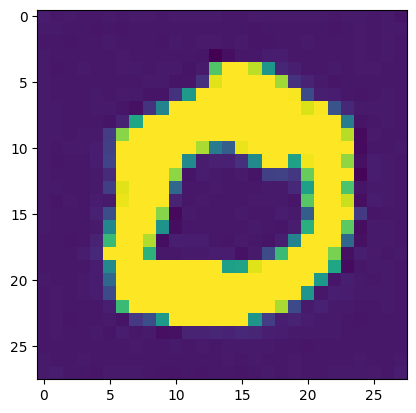


Epoch: 44 | Learning Rate: 0.0004096000000000001
0.03797449544072151
0.03616642206907272
0.0377001017332077
0.03835248947143555
0.03724079579114914
0.03593337908387184
0.03884347155690193
0.03643272817134857
0.036519501358270645
0.03642963618040085
0.03491484746336937
0.03696651756763458
0.035970695316791534
0.04093785211443901
0.03846799582242966
0.038243796676397324
0.036584265530109406
0.036537062376737595
0.03427518531680107
0.03621925413608551
0.03513435274362564
0.0360589474439621
0.036018624901771545
0.03591439127922058
0.036832716315984726
0.037637095898389816
0.03740297630429268
0.03683790564537048
0.037191249430179596
0.03583966940641403
0.03800810128450394
0.03527430444955826
0.035691771656274796
0.039243582636117935
0.03800639510154724
0.037510812282562256
0.039008788764476776
0.036701980978250504
0.036866240203380585
0.036569926887750626
0.035115137696266174
0.03609239682555199
0.036966994404792786
0.036509670317173004
0.03547178953886032
0.03808794915676117
0.03672022745

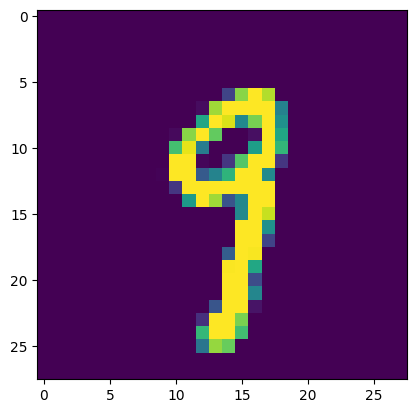


Epoch: 45 | Learning Rate: 0.0004096000000000001
0.03619951754808426
0.037551529705524445
0.03797642141580582
0.036458127200603485
0.03634269908070564
0.03835545852780342
0.034915048629045486
0.0367962010204792
0.03578188642859459
0.03627606853842735
0.037941835820674896
0.039469193667173386
0.03610029071569443
0.03564929589629173
0.03841949999332428
0.038213714957237244
0.03741079941391945
0.03962636739015579
0.03574531525373459
0.03645952790975571
0.03652224689722061
0.037254273891448975
0.035515196621418
0.03561101481318474
0.03634022921323776
0.03699665889143944
0.03746623173356056
0.03513343259692192
0.03650002181529999
0.03802066668868065
0.03814936801791191
0.036745134741067886
0.035363562405109406
0.037057969719171524
0.036138296127319336
0.03758544102311134
0.037903793156147
0.038072314113378525
0.03539503738284111
0.03755811229348183
0.03604089468717575
0.03631102293729782
0.03831855207681656
0.03883645683526993
0.035490624606609344
0.03810783848166466
0.03719118982553482
0.

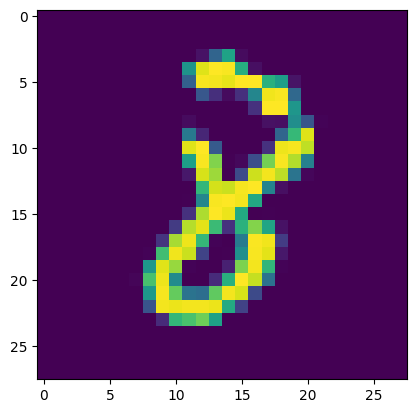


Epoch: 46 | Learning Rate: 0.0004096000000000001
0.036056116223335266
0.037071406841278076
0.03830723837018013
0.03563458099961281
0.03718383237719536
0.03826845809817314
0.036298174411058426
0.03780480846762657
0.034109391272068024
0.03713534027338028
0.03521084040403366
0.03761379420757294
0.03536485135555267
0.03822290897369385
0.03583180159330368
0.03727850690484047
0.034883592277765274
0.036545634269714355
0.03607938066124916
0.033970363438129425
0.0385596938431263
0.03517082706093788
0.03507392108440399
0.03519104793667793
0.03811446204781532
0.03596226125955582
0.037128765136003494
0.03841027989983559
0.03686818107962608
0.03774382546544075
0.034908849745988846
0.0377221405506134
0.03708670288324356
0.03553237020969391
0.04001791402697563
0.03731731325387955
0.037311844527721405
0.03710015490651131
0.03744847699999809
0.03790552541613579
0.03629765287041664
0.03785490244626999
0.03738837316632271
0.03724651783704758
0.03726831078529358
0.03539198264479637
0.03569050133228302
0.

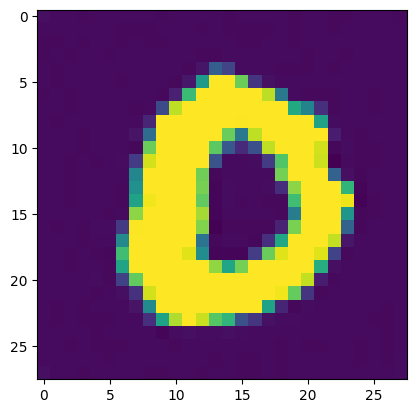


Epoch: 47 | Learning Rate: 0.0004096000000000001
0.037163425236940384
0.03715677559375763
0.03603442385792732
0.03739136829972267
0.03462850674986839
0.036596667021512985
0.03568558767437935
0.036052364856004715
0.03680873289704323
0.0361090712249279
0.035838399082422256
0.03655179589986801
0.03695598244667053
0.036312736570835114
0.036303482949733734
0.03913315013051033
0.03448820114135742
0.03747321665287018
0.03673475608229637
0.036909449845552444
0.039409104734659195
0.03823700174689293
0.03827933967113495
0.03724353387951851
0.037089042365550995
0.036713264882564545
0.03678160160779953
0.03684944286942482
0.037654660642147064
0.03716490790247917
0.03747124224901199
0.037104636430740356
0.03482503816485405
0.03519677743315697
0.036711156368255615
0.03832753375172615
0.03655519336462021
0.035806071013212204
0.036685410887002945
0.03719547018408775
0.036095473915338516
0.03430397808551788
0.03797879070043564
0.03725237771868706
0.03521541506052017
0.03618653491139412
0.0372002124786

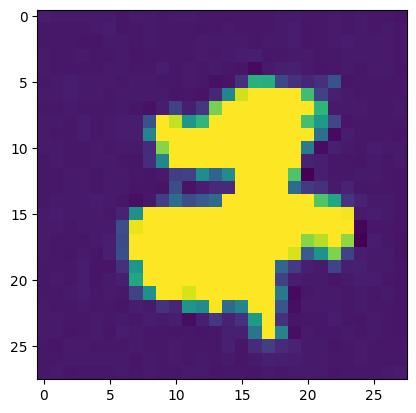


Epoch: 48 | Learning Rate: 0.0004096000000000001
0.035121336579322815
0.035586126148700714
0.03717593848705292
0.039901308715343475
0.037472452968358994
0.03614721819758415
0.035102952271699905
0.036967456340789795
0.035673897713422775
0.035833489149808884
0.03812550753355026
0.037167739123106
0.036748066544532776
0.03620162606239319
0.03837662190198898
0.03796439990401268
0.03583654388785362
0.035613760352134705
0.03736588731408119
0.03578934073448181
0.035316504538059235
0.038916584104299545
0.03777415305376053
0.03615870326757431
0.03771685063838959
0.03676504269242287
0.03475801646709442
0.0341951884329319
0.03610125184059143
0.03717301785945892
0.036690209060907364
0.03649049252271652
0.03470205143094063
0.03742671385407448
0.03685484826564789
0.037996452301740646
0.0380103625357151
0.03466110676527023
0.03765813261270523
0.03721747174859047
0.0371323898434639
0.03578198701143265
0.035567332059144974
0.034535810351371765
0.03468592092394829
0.03737003728747368
0.03820940852165222

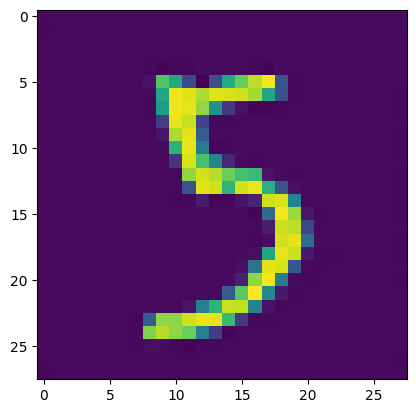


Epoch: 49 | Learning Rate: 0.0004096000000000001
0.03662985935807228
0.04040505737066269
0.0384133942425251
0.034535106271505356
0.03672775253653526
0.0367000550031662
0.035932984203100204
0.0351327583193779
0.03618184104561806
0.03567100316286087
0.03745659813284874
0.03645647317171097
0.0370834581553936
0.03533080592751503
0.035105131566524506
0.03683231398463249
0.03423738852143288
0.036505311727523804
0.038678985089063644
0.0344044528901577
0.0356505922973156
0.03710590675473213
0.036744389683008194
0.035774245858192444
0.037464987486600876
0.034487221390008926
0.03735028952360153
0.03551410138607025
0.037281621247529984
0.03512726351618767
0.036045122891664505
0.03534207493066788
0.03488549590110779
0.03533555567264557
0.03770044445991516
0.03617190569639206
0.035569094121456146
0.0374896377325058
0.036499787122011185
0.036381859332323074
0.03578466549515724
0.03636637702584267
0.03786231949925423
0.03563758358359337
0.03540024533867836
0.035195592790842056
0.03643552213907242
0.

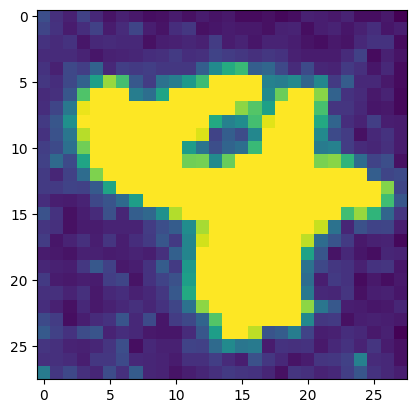


Epoch: 50 | Learning Rate: 0.0004096000000000001
0.03468163684010506
0.03618508204817772
0.03713270649313927
0.03770441189408302
0.03496771305799484
0.036608751863241196
0.037754811346530914
0.03433329239487648
0.03693521395325661
0.036314040422439575
0.03542553633451462
0.03619859740138054
0.03790171816945076
0.03845008462667465
0.0358705148100853
0.03857205808162689
0.03716949373483658
0.03719325736165047
0.03757459297776222
0.03538019582629204
0.03869369998574257
0.03541819751262665
0.03456655144691467
0.035461582243442535
0.03785056248307228
0.036882054060697556
0.034725647419691086
0.03703382983803749
0.03572022169828415
0.03697032853960991
0.03622141107916832
0.03620626777410507
0.035274989902973175
0.03488577529788017
0.034583933651447296
0.03608284145593643
0.03447656333446503
0.03659598529338837
0.03719985485076904
0.03484819456934929
0.03584080561995506
0.03768668696284294
0.036211103200912476
0.03803651034832001
0.03642575442790985
0.033748745918273926
0.03795361518859863
0

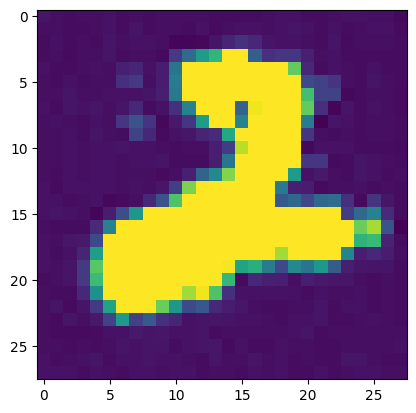


Epoch: 51 | Learning Rate: 0.0003276800000000001
0.038271065801382065
0.037820152938365936
0.03535013645887375
0.03842449560761452
0.0362556055188179
0.036027953028678894
0.03651845455169678
0.03742906078696251
0.03629831597208977
0.03720920905470848
0.036331113427877426
0.037872314453125
0.03686445578932762
0.035737451165914536
0.03562488406896591
0.036209795624017715
0.036481067538261414
0.0382109209895134
0.03487857058644295
0.0357004851102829
0.03681498020887375
0.03487018495798111
0.03561754524707794
0.03771135210990906
0.03579876944422722
0.037206098437309265
0.03695325553417206
0.03673931211233139
0.03623995929956436
0.035965148359537125
0.03775903210043907
0.034950193017721176
0.03697734326124191
0.036789435893297195
0.03578069806098938
0.03714622184634209
0.03511566296219826
0.03351525217294693
0.038545284420251846
0.03571740910410881
0.036315396428108215
0.034858208149671555
0.037295274436473846
0.036210961639881134
0.03504478931427002
0.038676124066114426
0.0359462052583694

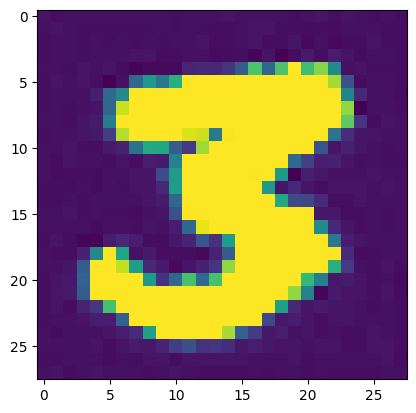


Epoch: 52 | Learning Rate: 0.0003276800000000001
0.036516979336738586
0.03534608334302902
0.03628209978342056
0.035085827112197876
0.03510406240820885
0.0364895723760128
0.035029180347919464
0.03380702808499336
0.03607098013162613
0.03642057254910469
0.035487208515405655
0.035758256912231445
0.03589179366827011
0.034599222242832184
0.0355314239859581
0.034616872668266296
0.03850590065121651
0.03615181893110275
0.03771328926086426
0.0354212149977684
0.0366656668484211
0.03648705407977104
0.03413030505180359
0.03644370287656784
0.035454776138067245
0.03658997640013695
0.0358395092189312
0.03487616032361984
0.035929057747125626
0.03740532323718071
0.03393818065524101
0.03661718964576721
0.03517850860953331
0.03738588094711304
0.03573249652981758
0.03633103519678116
0.0374840572476387
0.036745186895132065
0.03653671592473984
0.03608522191643715
0.0389154776930809
0.036353304982185364
0.036806877702474594
0.03629164770245552
0.036867864429950714
0.03761720657348633
0.03585738316178322
0.03

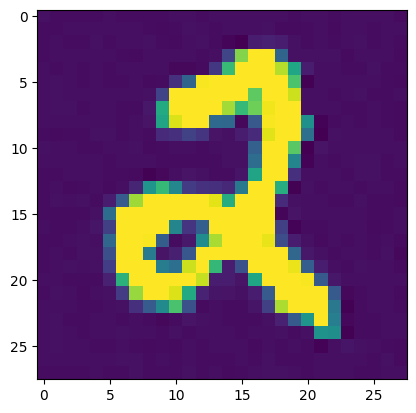


Epoch: 53 | Learning Rate: 0.0003276800000000001
0.038163166493177414
0.03574977070093155
0.0354684479534626
0.03475544974207878
0.0360037237405777
0.03579605743288994
0.03629021346569061
0.03533530980348587
0.03757554665207863
0.03850782662630081
0.03747386112809181
0.03575343266129494
0.03506206348538399
0.037255506962537766
0.03612123057246208
0.03364217281341553
0.037565771490335464
0.036863334476947784
0.03510807827115059
0.03592846915125847
0.04006360098719597
0.03622036054730415
0.0376555435359478
0.03418375924229622
0.03542427718639374
0.03516308218240738
0.034826986491680145
0.037830621004104614
0.036552514880895615
0.03654244542121887
0.03823113813996315
0.03549928963184357
0.03615464270114899
0.03778330236673355
0.03408796340227127
0.038107648491859436
0.03703030198812485
0.034182578325271606
0.0348171591758728
0.03570835292339325
0.035605087876319885
0.03824673593044281
0.03704918175935745
0.0356670618057251
0.03599843755364418
0.03495755046606064
0.034932445734739304
0.03

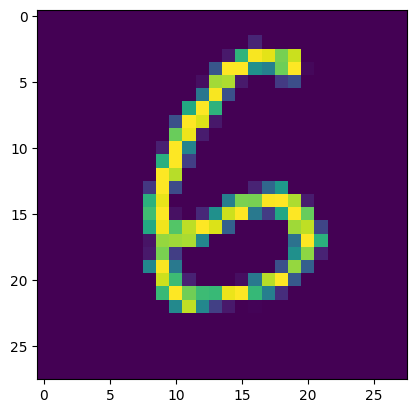


Epoch: 54 | Learning Rate: 0.0003276800000000001
0.03529142215847969
0.03688734397292137
0.03556350991129875
0.035932060331106186
0.034496892243623734
0.03629474341869354
0.034678537398576736
0.035531915724277496
0.03649502620100975
0.03628036752343178
0.03621732071042061
0.03561526909470558
0.03825846314430237
0.03597985580563545
0.035017598420381546
0.03541259095072746
0.03579475358128548
0.03772469609975815
0.037063971161842346
0.03616016358137131
0.03707943111658096
0.03479663282632828
0.0359027124941349
0.038960494101047516
0.03545552119612694
0.03672073408961296
0.036615997552871704
0.03699994087219238
0.036753151565790176
0.0336461067199707
0.03694506362080574
0.03713071718811989
0.037039730697870255
0.037974368780851364
0.03664714843034744
0.037121593952178955
0.038554783910512924
0.034504231065511703
0.035510092973709106
0.03684329241514206
0.0347716398537159
0.0366971455514431
0.03900555893778801
0.03692682459950447
0.034277185797691345
0.03859854117035866
0.0372727885842323

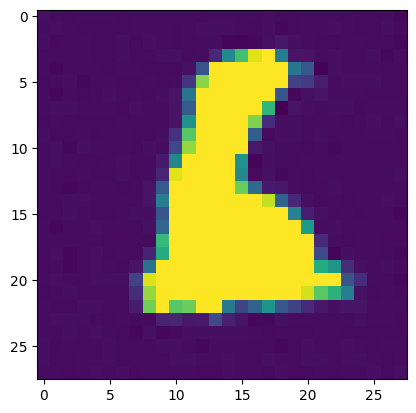


Epoch: 55 | Learning Rate: 0.0003276800000000001
0.03513413295149803
0.03707068786025047
0.035909153521060944
0.037138745188713074
0.03472383692860603
0.036264628171920776
0.03597382456064224
0.03491766005754471
0.03721453249454498
0.03681379556655884
0.036159031093120575
0.03490034118294716
0.03451177477836609
0.03584584221243858
0.03592139109969139
0.03595591336488724
0.03578001633286476
0.03566761314868927
0.03419758379459381
0.03733401745557785
0.03717681020498276
0.03672471642494202
0.03726399689912796
0.035617031157016754
0.037674445658922195
0.03524519503116608
0.03391128033399582
0.0386027991771698
0.03631233051419258
0.03603895381093025
0.03602556511759758
0.03773888945579529
0.034195203334093094
0.0368787981569767
0.03648228570818901
0.03613198921084404
0.03671612590551376
0.03627195954322815
0.03731328994035721
0.03658022731542587
0.037776391953229904
0.03433486446738243
0.03711675852537155
0.03665396198630333
0.03618216514587402
0.035688526928424835
0.037157829850912094
0.

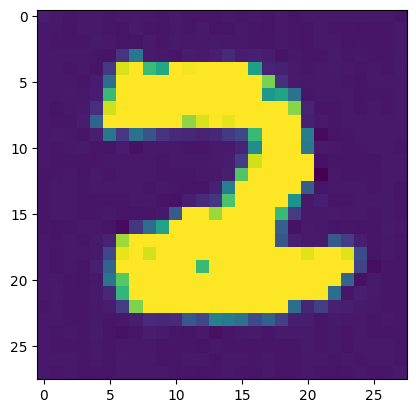


Epoch: 56 | Learning Rate: 0.0003276800000000001
0.03706684708595276
0.03793567046523094
0.03546888381242752
0.0360664539039135
0.03660766780376434
0.03717499598860741
0.036965277045965195
0.03490475192666054
0.03757801279425621
0.03907720744609833
0.03632296621799469
0.03560682758688927
0.034814197570085526
0.03519825637340546
0.03769971430301666
0.03511771187186241
0.03586765006184578
0.03680678829550743
0.03516643866896629
0.034752096980810165
0.035927046090364456
0.03558489680290222
0.03613986447453499
0.03764376416802406
0.0375375971198082
0.03797434642910957
0.03828183561563492
0.03555265814065933
0.03718679025769234
0.03699512779712677
0.0346195288002491
0.03525335341691971
0.03701804578304291
0.03726993128657341
0.03563747555017471
0.03559219092130661
0.03532780334353447
0.03618880733847618
0.035309918224811554
0.03678969293832779
0.03489364683628082
0.036997828632593155
0.03774341195821762
0.03668919578194618
0.03752592206001282
0.034464944154024124
0.03509238734841347
0.0343

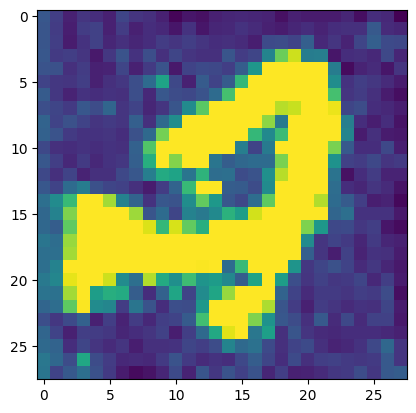


Epoch: 57 | Learning Rate: 0.0003276800000000001
0.03746471181511879
0.035901665687561035
0.03531595319509506
0.03621464967727661
0.037130873650312424
0.036364711821079254
0.0359707735478878
0.035065051168203354
0.03566994518041611
0.03631838783621788
0.03584522008895874
0.038396675139665604
0.034484099596738815
0.03615069016814232
0.03479185700416565
0.03732043877243996
0.03628924861550331
0.03689724951982498
0.036301832646131516
0.03724943846464157
0.03654301166534424
0.034908562898635864
0.03473987802863121
0.038088440895080566
0.03722391650080681
0.037880364805459976
0.033950794488191605
0.03774619102478027
0.03501978516578674
0.03656318038702011
0.03760891035199165
0.03535374253988266
0.036946047097444534
0.03765486925840378
0.034887488931417465
0.037489570677280426
0.033889465034008026
0.034037839621305466
0.034813232719898224
0.03823447227478027
0.03396202623844147
0.03776414319872856
0.037193603813648224
0.038035888224840164
0.036384161561727524
0.0350116565823555
0.0374037250

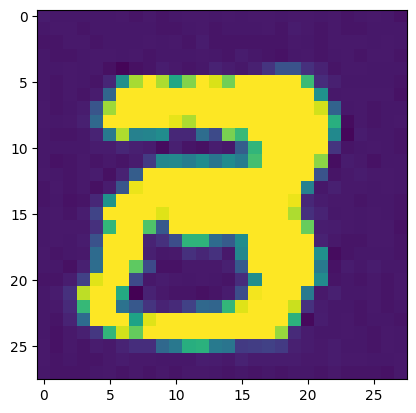


Epoch: 58 | Learning Rate: 0.0003276800000000001
0.036002591252326965
0.036500073969364166
0.03592377156019211
0.03674522414803505
0.03659595549106598
0.03539057821035385
0.03565138950943947
0.03500637784600258
0.03638984262943268
0.03631075099110603
0.035514067858457565
0.036747321486473083
0.036910343915224075
0.0359824076294899
0.03787168860435486
0.03730522468686104
0.03742484003305435
0.03571074828505516
0.035171426832675934
0.034939493983983994
0.03777138888835907
0.03429054841399193
0.03805936127901077
0.035777732729911804
0.03573554381728172
0.03655280917882919
0.03432707488536835
0.036123745143413544
0.036086373031139374
0.03602435812354088
0.034256115555763245
0.03539757430553436
0.034829434007406235
0.03506750240921974
0.03500731661915779
0.03558479622006416
0.037157200276851654
0.03855293616652489
0.03521798178553581
0.035944800823926926
0.034561462700366974
0.03493177890777588
0.03510058671236038
0.03499921038746834
0.03479396179318428
0.03630794957280159
0.03492682427167

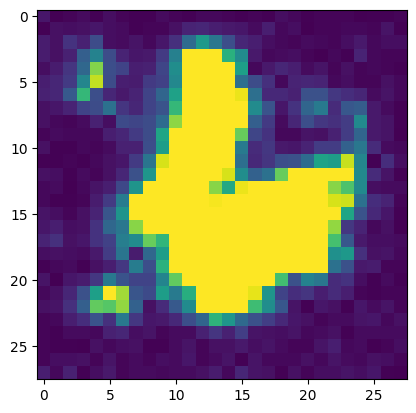


Epoch: 59 | Learning Rate: 0.0003276800000000001
0.03510241210460663
0.03657960146665573
0.034754473716020584
0.03761567547917366
0.03597249090671539
0.034804489463567734
0.03682607039809227
0.03496658802032471
0.03604704886674881
0.03495391830801964
0.034146059304475784
0.03658332675695419
0.035729359835386276
0.03726201504468918
0.03633512184023857
0.034842826426029205
0.03531359136104584
0.03392763063311577
0.03878355771303177
0.036005597561597824
0.03488015756011009
0.037819232791662216
0.03633680194616318
0.0357489176094532
0.03579153120517731
0.03529325872659683
0.0356256365776062
0.03573203831911087
0.035559188574552536
0.036902476102113724
0.03694070875644684
0.03681067377328873
0.035446904599666595
0.03491433709859848
0.036139655858278275
0.03576669469475746
0.03475471958518028
0.03521113842725754
0.034878768026828766
0.035938508808612823
0.03914526104927063
0.036838993430137634
0.03668748214840889
0.036274686455726624
0.03476429730653763
0.03546023741364479
0.035416312515735

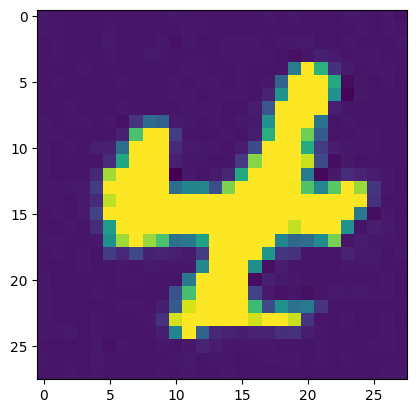


Epoch: 60 | Learning Rate: 0.0003276800000000001
0.03494439646601677
0.0340699665248394
0.03808441013097763
0.03363282233476639
0.036562852561473846
0.03427599370479584
0.03497517853975296
0.03795919567346573
0.03639090433716774
0.037564195692539215
0.036534134298563004
0.03403131663799286
0.03636842593550682
0.03655904904007912
0.03552626818418503
0.03630206361413002
0.037300001829862595
0.036199528723955154
0.03380503132939339
0.03387043625116348
0.03814160078763962
0.03728476166725159
0.03492620587348938
0.03389069810509682
0.03734349086880684
0.03637318313121796
0.0350789837539196
0.03647953271865845
0.03666411340236664
0.03614117205142975
0.035355016589164734
0.0359322652220726
0.03589429706335068
0.03487749397754669
0.03562534600496292
0.03668578341603279
0.03362642228603363
0.03456840664148331
0.03671862930059433
0.03631040081381798
0.03417682647705078
0.03567934036254883
0.036364078521728516
0.0354357548058033
0.0351141095161438
0.03638095036149025
0.03773801028728485
0.034440

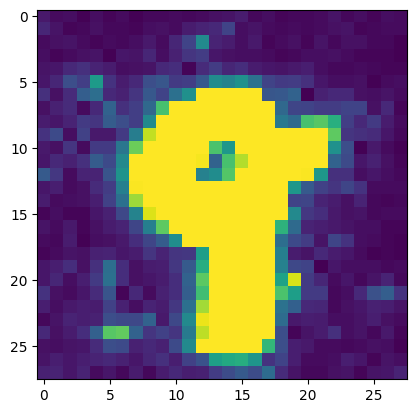


Epoch: 61 | Learning Rate: 0.0002621440000000001
0.0346977673470974
0.03609088063240051
0.035626716911792755
0.0355512760579586
0.03614436835050583
0.03662465140223503
0.03572586551308632
0.036116041243076324
0.034489620476961136
0.036869246512651443
0.035545021295547485
0.0342738963663578
0.03618568181991577
0.03498778119683266
0.035291410982608795
0.03586551919579506
0.03365502506494522
0.03658130392432213
0.03419286385178566
0.0356752872467041
0.03533468022942543
0.03435997664928436
0.03494692221283913
0.03426377847790718
0.03429034724831581
0.036284979432821274
0.03663158789277077
0.03548049181699753
0.03562883287668228
0.03545799106359482
0.03696214780211449
0.03581217676401138
0.03451910242438316
0.0386209636926651
0.038001514971256256
0.03559796139597893
0.03519256040453911
0.03649658337235451
0.03464356064796448
0.038114678114652634
0.03627070039510727
0.036029648035764694
0.035178668797016144
0.037208303809165955
0.03681827336549759
0.03620198369026184
0.034261226654052734
0.

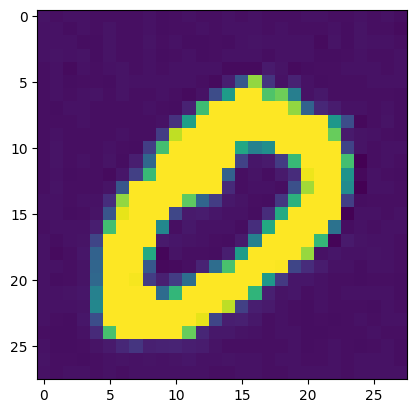


Epoch: 62 | Learning Rate: 0.0002621440000000001
0.03541954979300499
0.03663070872426033
0.03745453059673309
0.03510560095310211
0.036228958517313004
0.03637107089161873
0.03477642312645912
0.03588614612817764
0.036754049360752106
0.0345945879817009
0.0373886413872242
0.03632166236639023
0.034969039261341095
0.03577187657356262
0.034950509667396545
0.03625243902206421
0.03661211207509041
0.03586287796497345
0.03613026812672615
0.036416195333004
0.03596185892820358
0.033926062285900116
0.03427975997328758
0.0363798551261425
0.03531373664736748
0.035776205360889435
0.037195999175310135
0.0359983891248703
0.03765714168548584
0.035357385873794556
0.035496871918439865
0.03547533601522446
0.036229658871889114
0.03635840490460396
0.036388713866472244
0.034219350665807724
0.037619370967149734
0.03629428893327713
0.03686719760298729
0.03527476638555527
0.03648637235164642
0.03692350536584854
0.03684423863887787
0.03497831150889397
0.03419309854507446
0.03513801097869873
0.0345596969127655
0.03

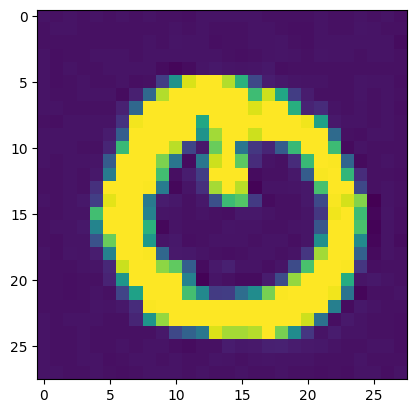


Epoch: 63 | Learning Rate: 0.0002621440000000001
0.0358995720744133
0.03609156608581543
0.03537706285715103
0.037891171872615814
0.037399519234895706
0.03461003676056862
0.035546980798244476
0.03613173961639404
0.036333613097667694
0.03564213588833809
0.036078691482543945
0.034426070749759674
0.035926949232816696
0.03477160632610321
0.03648900240659714
0.03525689244270325
0.036386873573064804
0.036741286516189575
0.03469984233379364
0.03536570444703102
0.03828809782862663
0.03454205021262169
0.035531431436538696
0.033765994012355804
0.03526952862739563
0.03635813668370247
0.035315752029418945
0.037445660680532455
0.035992853343486786
0.035789016634225845
0.035738419741392136
0.035435207188129425
0.034572385251522064
0.03617877885699272
0.03407309204339981
0.03460439667105675
0.03592216596007347
0.03612115606665611
0.03661052882671356
0.036409638822078705
0.03831290826201439
0.03562825545668602
0.03432008996605873
0.034193165600299835
0.03457128256559372
0.033496856689453125
0.03511171

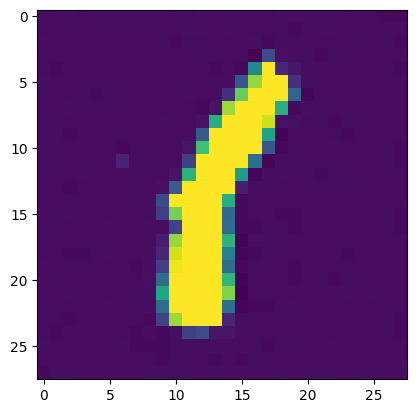


Epoch: 64 | Learning Rate: 0.0002621440000000001
0.037440598011016846
0.033826496452093124
0.03610314428806305
0.03561727702617645
0.03707783669233322
0.03472563251852989
0.037637803703546524
0.034892112016677856
0.036424294114112854
0.036928046494722366
0.036640968173742294
0.0361969992518425
0.03701886534690857
0.03724636510014534
0.03579605743288994
0.03556394577026367
0.03589789196848869
0.03559431806206703
0.034755583852529526
0.035446248948574066
0.037737730890512466
0.03783220425248146
0.03762119635939598
0.03641948476433754
0.03490636870265007
0.037083689123392105
0.036031536757946014
0.03535449132323265
0.03619745001196861
0.034728556871414185
0.03550947830080986
0.036566972732543945
0.038730259984731674
0.03597000241279602
0.03542913869023323
0.036070965230464935
0.035883430391550064
0.036609090864658356
0.03504910320043564
0.03494477644562721
0.03554043546319008
0.03490075096487999
0.03464224934577942
0.03430315852165222
0.036247774958610535
0.03617699816823006
0.0345723852

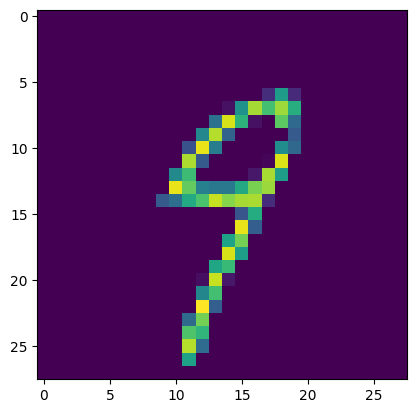


Epoch: 65 | Learning Rate: 0.0002621440000000001
0.034608323127031326
0.03627719730138779
0.03513544797897339
0.03574938327074051
0.034565266221761703
0.03527454286813736
0.03439851477742195
0.03566903993487358
0.03484601154923439
0.034420572221279144
0.03585485368967056
0.035772569477558136
0.03529819846153259
0.03805456683039665
0.03832940012216568
0.0332733578979969
0.03599927946925163
0.03653906658291817
0.034520167857408524
0.03584617003798485
0.036680735647678375
0.03526823967695236
0.036788009107112885
0.034635454416275024
0.036379311233758926
0.035856883972883224
0.03620477765798569
0.0356142520904541
0.0367884524166584
0.0348409004509449
0.03474648669362068
0.034949641674757004
0.03580078110098839
0.03537013381719589
0.03475230559706688
0.0358426608145237
0.037609685212373734
0.03568533435463905
0.03418659046292305
0.03592215105891228
0.037464968860149384
0.03545074164867401
0.03690830245614052
0.034063152968883514
0.033877331763505936
0.03670056164264679
0.033816929906606674

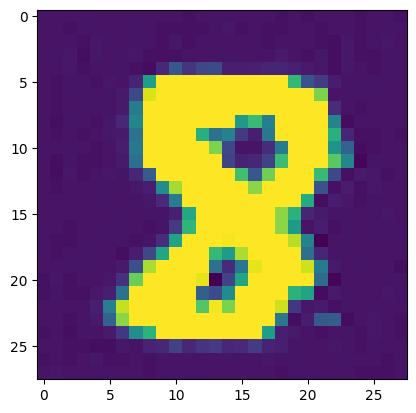


Epoch: 66 | Learning Rate: 0.0002621440000000001
0.03363318741321564
0.03409632295370102
0.035100530833005905
0.035568494349718094
0.03584213927388191
0.034159865230321884
0.0345795638859272
0.03522307798266411
0.03602222353219986
0.03702544420957565
0.0376494862139225
0.036428194493055344
0.036855071783065796
0.03565540909767151
0.035428907722234726
0.034728772938251495
0.03445021063089371
0.034578144550323486
0.03631609305739403
0.03744116425514221
0.03443903848528862
0.03450046852231026
0.03693162649869919
0.03532922640442848
0.03548039495944977
0.0348542220890522
0.03693961724638939
0.0359264500439167
0.037204399704933167
0.03677341341972351
0.035057488828897476
0.03625898063182831
0.035927388817071915
0.036339446902275085
0.03596428036689758
0.03569139912724495
0.03683631122112274
0.03830709308385849
0.03766263276338577
0.03336041420698166
0.03476613387465477
0.03469600901007652
0.0353107824921608
0.035173214972019196
0.036607153713703156
0.035966139286756516
0.03602081909775734


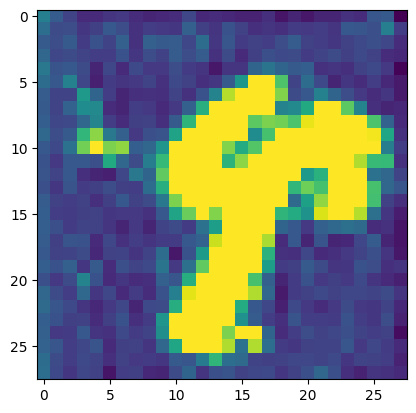


Epoch: 67 | Learning Rate: 0.0002621440000000001
0.036355163902044296
0.03450809046626091
0.03549078106880188
0.03665061295032501
0.0342387855052948
0.035643383860588074
0.03424425050616264
0.03431372344493866
0.03521884232759476
0.0345773845911026
0.035014234483242035
0.03444681316614151
0.03516394644975662
0.035354744642972946
0.03598067909479141
0.0344223789870739
0.037510283291339874
0.03703770413994789
0.03551413118839264
0.03402472287416458
0.03578861057758331
0.03713094815611839
0.03424467891454697
0.03703688830137253
0.03695928677916527
0.037245385348796844
0.03635500743985176
0.03709026053547859
0.03430495038628578
0.0372345894575119
0.03605281561613083
0.03704458102583885
0.036259181797504425
0.03621847555041313
0.03583613783121109
0.03521226346492767
0.0363130159676075
0.0360809862613678
0.035646144300699234
0.034594882279634476
0.035962533205747604
0.034644220024347305
0.035747136920690536
0.035594020038843155
0.03773871809244156
0.037288546562194824
0.036927204579114914
0

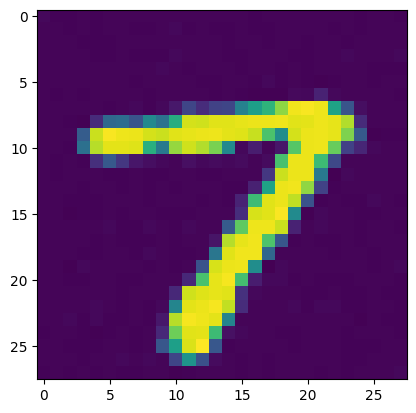


Epoch: 68 | Learning Rate: 0.0002621440000000001
0.03613380342721939
0.03624860197305679
0.03617257997393608
0.03791180998086929
0.03556499257683754
0.036381371319293976
0.038296885788440704
0.03589141368865967
0.036643415689468384
0.03542661666870117
0.03687126561999321
0.03472987934947014
0.035693418234586716
0.036584384739398956
0.035789892077445984
0.03542555868625641
0.035454005002975464
0.03519197925925255
0.03582129627466202
0.03512972965836525
0.03605268523097038
0.035488564521074295
0.03604459762573242
0.034757159650325775
0.036542024463415146
0.035673730075359344
0.0362698957324028
0.03686046600341797
0.03601561859250069
0.03605347499251366
0.03480314090847969
0.036002371460199356
0.03587848320603371
0.03362087532877922
0.03481539711356163
0.03641052171587944
0.03251682594418526
0.03486055135726929
0.034602418541908264
0.03584645688533783
0.03684840723872185
0.03633252531290054
0.03671983256936073
0.037101130932569504
0.0375480055809021
0.03509605675935745
0.0364593826234340

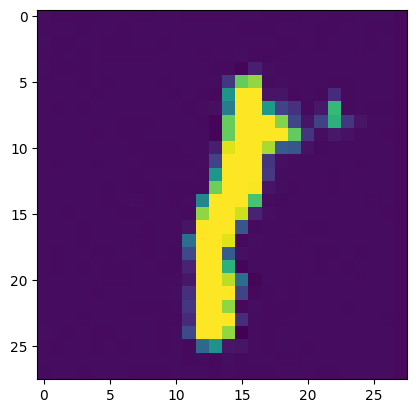


Epoch: 69 | Learning Rate: 0.0002621440000000001
0.0353124663233757
0.03534679859876633
0.03485798463225365
0.03746319189667702
0.036049697548151016
0.035401806235313416
0.035772960633039474
0.035846367478370667
0.03537833318114281
0.03756800293922424
0.033459581434726715
0.03490324690937996
0.03553169593214989
0.03635837510228157
0.03648841008543968
0.03601713478565216
0.036206599324941635
0.03561817482113838
0.0361432284116745
0.03498214855790138
0.03678370267152786
0.035468727350234985
0.037443675100803375
0.03479110449552536
0.0367019884288311
0.03524075075984001
0.03663858026266098
0.03677792474627495
0.036238621920347214
0.036266665905714035
0.035512834787368774
0.03485356643795967
0.03648240491747856
0.033566974103450775
0.0356789194047451
0.03625386580824852
0.0364241823554039
0.034703101962804794
0.035707712173461914
0.03554423525929451
0.0380440279841423
0.03597462177276611
0.03426389768719673
0.03579388186335564
0.03552652895450592
0.03581136092543602
0.03420040011405945
0.

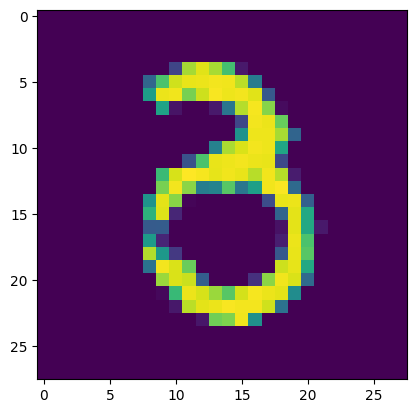


Epoch: 70 | Learning Rate: 0.0002621440000000001
0.03439665958285332
0.038678985089063644
0.035192444920539856
0.03586335480213165
0.03621955215930939
0.035121750086545944
0.03471216931939125
0.0342116542160511
0.03466927632689476
0.03547092154622078
0.03634697571396828
0.03455980122089386
0.03420700877904892
0.03459124639630318
0.03594757989048958
0.03590034320950508
0.03445056080818176
0.035404689610004425
0.03584936633706093
0.0352044440805912
0.0326753668487072
0.033940766006708145
0.03417572006583214
0.03435944393277168
0.03495587036013603
0.035542234778404236
0.03401174768805504
0.03608237951993942
0.0345488116145134
0.0350247286260128
0.03488914668560028
0.03671072795987129
0.03488178178668022
0.03601821884512901
0.03682485222816467
0.03668082877993584
0.03582053631544113
0.03568844497203827
0.03489985316991806
0.03465484455227852
0.03719617426395416
0.03688817471265793
0.03573751822113991
0.03500727191567421
0.03589913249015808
0.03387903794646263
0.0360652431845665
0.03504811

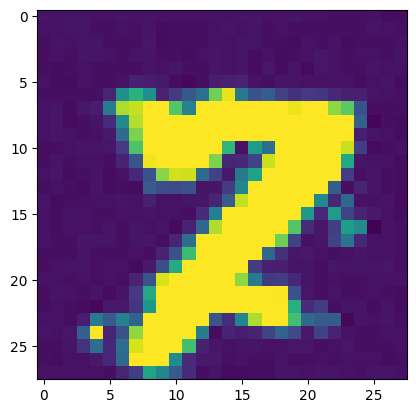


Epoch: 71 | Learning Rate: 0.00020971520000000012
0.0366646982729435
0.03706621378660202
0.03645200654864311
0.03654058650135994
0.034779347479343414
0.03773776441812515
0.03670113906264305
0.036044105887413025
0.032243888825178146
0.03800468146800995
0.03523797541856766
0.038405340164899826
0.033847689628601074
0.0381820984184742
0.03449145704507828
0.03528621047735214
0.03610561415553093
0.03672167286276817
0.03461809456348419
0.037016842514276505
0.03698264807462692
0.03712089732289314
0.03656868636608124
0.036028169095516205
0.03423420339822769
0.03501074016094208
0.033260270953178406
0.03386473283171654
0.03442692756652832
0.03540053591132164
0.03618236631155014
0.034999314695596695
0.03675379976630211
0.03717108070850372
0.03445242717862129
0.03438904508948326
0.03832908719778061
0.03520575910806656
0.034677084535360336
0.036542750895023346
0.03625042364001274
0.037155140191316605
0.03601799160242081
0.03542923182249069
0.035375844687223434
0.034729599952697754
0.037120729684829

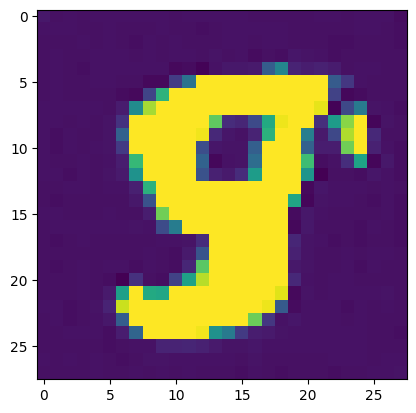


Epoch: 72 | Learning Rate: 0.00020971520000000012
0.033783555030822754
0.03509896248579025
0.03418327867984772
0.03425372391939163
0.037062421441078186
0.03509407490491867
0.03280438482761383
0.03489727899432182
0.033557064831256866
0.03610359504818916
0.035207491368055344
0.0350809246301651
0.03745994716882706
0.033692389726638794
0.03364526852965355
0.036367010325193405
0.0345962829887867
0.036003321409225464
0.03704027086496353
0.035460781306028366
0.03475688025355339
0.0360809862613678
0.03627089411020279
0.03556601703166962
0.035408902913331985
0.03774699196219444
0.035366836935281754
0.03474298119544983
0.03655747324228287
0.035154614597558975
0.03559626638889313
0.03551049157977104
0.0347362719476223
0.03470621630549431
0.0365351140499115
0.03605295717716217
0.03412492200732231
0.036198925226926804
0.03530045971274376
0.03609302267432213
0.03366883844137192
0.03783653303980827
0.036575984209775925
0.03652196004986763
0.03428327664732933
0.03755547106266022
0.03278650343418121
0

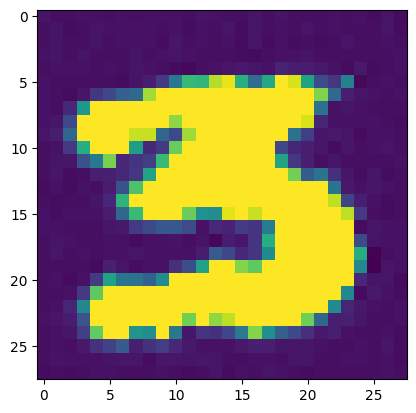


Epoch: 73 | Learning Rate: 0.00020971520000000012
0.036453329026699066
0.03620823845267296
0.0349058099091053
0.03515705093741417
0.035609614104032516
0.036593832075595856
0.03605598583817482
0.03704700991511345
0.03495919704437256
0.036449383944272995
0.035480156540870667
0.036019355058670044
0.0357508584856987
0.034719068557024
0.033215202391147614
0.037737105041742325
0.034828443080186844
0.03540478274226189
0.03628995269536972
0.03574848175048828
0.03602510690689087
0.03542904555797577
0.03545679524540901
0.035368647426366806
0.034340325742959976
0.034996189177036285
0.035043369978666306
0.035976894199848175
0.033218685537576675
0.034298960119485855
0.03477615863084793
0.03575102612376213
0.035497378557920456
0.0378643199801445
0.034532781690359116
0.0363062247633934
0.036330658942461014
0.035019390285015106
0.0356101393699646
0.034797072410583496
0.03329116851091385
0.03496824577450752
0.03234652429819107
0.035569388419389725
0.034887995570898056
0.03484470024704933
0.03502970188

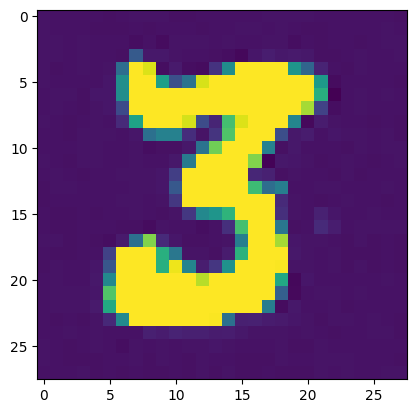


Epoch: 74 | Learning Rate: 0.00020971520000000012
0.03719882667064667
0.03629622980952263
0.037453144788742065
0.037946831434965134
0.037126414477825165
0.03395335003733635
0.03516887128353119
0.03555021435022354
0.035806335508823395
0.03621215000748634
0.035679660737514496
0.035204607993364334
0.035089489072561264
0.034887608140707016
0.03603395074605942
0.03526797145605087
0.035917334258556366
0.037036169320344925
0.03502810373902321
0.03898627310991287
0.03585367277264595
0.035398006439208984
0.035976655781269073
0.03513920307159424
0.034696731716394424
0.03566168248653412
0.03492274135351181
0.03560597822070122
0.03513593599200249
0.035238344222307205
0.0378294363617897
0.03623680770397186
0.034663572907447815
0.03383391723036766
0.035713519901037216
0.03537579998373985
0.035665784031152725
0.036371875554323196
0.03508405014872551
0.037491098046302795
0.03547288849949837
0.03502778708934784
0.03417923301458359
0.034331534057855606
0.03555072471499443
0.03561687469482422
0.03477744

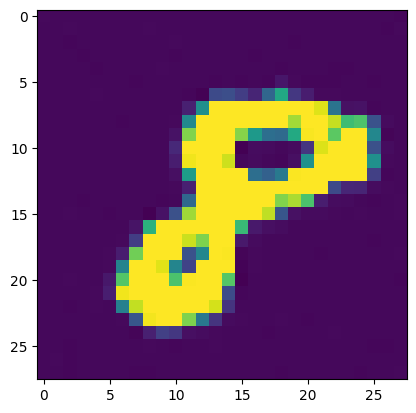


Epoch: 75 | Learning Rate: 0.00020971520000000012
0.03481556475162506
0.03658099099993706
0.036274511367082596
0.0352591834962368
0.035768140107393265
0.03513874113559723
0.03474738076329231
0.0353342704474926
0.03737519681453705
0.035704657435417175
0.03437046706676483
0.034131672233343124
0.037076160311698914
0.03361310064792633
0.0352415032684803
0.03446420654654503
0.03689466789364815
0.03330936282873154
0.03521458059549332
0.03554602339863777
0.03434000164270401
0.036796893924474716
0.037410128861665726
0.034948091953992844
0.035785868763923645
0.03724012151360512
0.03651900589466095
0.03598983585834503
0.0356396809220314
0.03473950922489166
0.03363277018070221
0.03636721521615982
0.03593644127249718
0.035315342247486115
0.03598909080028534
0.03655052185058594
0.0353797972202301
0.03470413759350777
0.03428118675947189
0.03570086136460304
0.037082016468048096
0.03532199561595917
0.03552648425102234
0.03699611872434616
0.03527440130710602
0.03519127145409584
0.03681178018450737
0.0

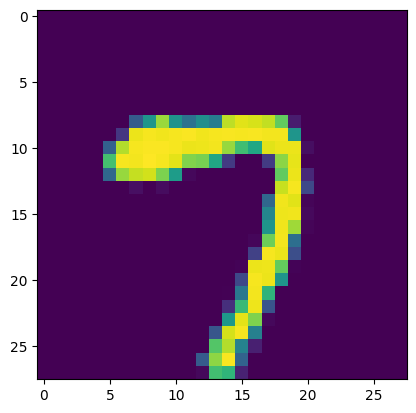


Epoch: 76 | Learning Rate: 0.00020971520000000012
0.03605674207210541
0.03709816187620163
0.035950466990470886
0.03417833894491196
0.035465698689222336
0.03508968651294708
0.03601275384426117
0.03494095429778099
0.036926086992025375
0.03478338196873665
0.034926824271678925
0.03561682254076004
0.038064032793045044
0.034597981721162796
0.0352078340947628
0.0354376956820488
0.03653814643621445
0.034597285091876984
0.03672681748867035
0.03554435446858406
0.03598255291581154
0.03392082080245018
0.0342906229197979
0.03773616999387741
0.03359627723693848
0.03602894768118858
0.035260286182165146
0.037037331610918045
0.03456617519259453
0.03310543671250343
0.035884879529476166
0.03531910479068756
0.03577466681599617
0.03346824645996094
0.036425769329071045
0.034967806190252304
0.03348105773329735
0.03728698566555977
0.03667721524834633
0.036013323813676834
0.036382947117090225
0.0358608178794384
0.03394095227122307
0.03604838624596596
0.03573713079094887
0.03557315096259117
0.03582213819026947

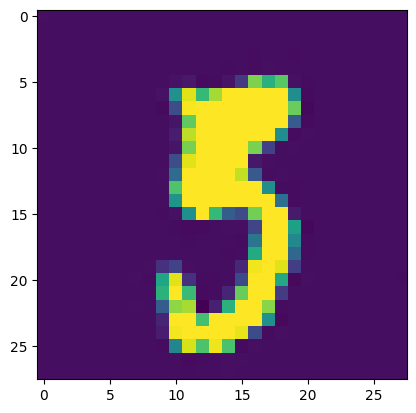


Epoch: 77 | Learning Rate: 0.00020971520000000012
0.036555998027324677
0.03679822385311127
0.03576778247952461
0.03497687727212906
0.03576693311333656
0.03655145689845085
0.03418033570051193
0.03422606736421585
0.03394726663827896
0.03605464845895767
0.03492986038327217
0.033911168575286865
0.03519344702363014
0.03714907169342041
0.03657277300953865
0.03630660101771355
0.03473926708102226
0.03644352778792381
0.03514057397842407
0.036449749022722244
0.03496498242020607
0.03464119881391525
0.03536920249462128
0.03539566323161125
0.03455442935228348
0.03490893542766571
0.035582080483436584
0.03431808575987816
0.03834918141365051
0.03365234285593033
0.0357477031648159
0.03451985493302345
0.03644571453332901
0.03502107411623001
0.035443611443042755
0.03731514886021614
0.03750979155302048
0.03639490157365799
0.034115951508283615
0.034782178699970245
0.03459148108959198
0.034996118396520615
0.0343974344432354
0.03531326353549957
0.03562602773308754
0.03477656468749046
0.03360876068472862
0.0

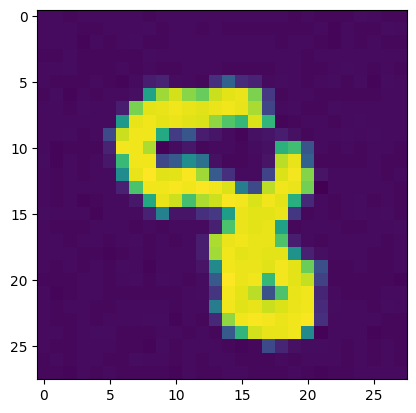


Epoch: 78 | Learning Rate: 0.00020971520000000012
0.03454802557826042
0.03579180687665939
0.03506142646074295
0.03707217425107956
0.03560919687151909
0.03358963876962662
0.036313772201538086
0.036868683993816376
0.037996452301740646
0.034936632961034775
0.03533066436648369
0.03579629957675934
0.03425261750817299
0.03661690279841423
0.03459296002984047
0.03484741970896721
0.03696173056960106
0.03534206375479698
0.03467772528529167
0.03419748693704605
0.03724066913127899
0.033599235117435455
0.035709552466869354
0.03469614312052727
0.034513186663389206
0.034508612006902695
0.03546483442187309
0.035738881677389145
0.037150803953409195
0.034800298511981964
0.03428160771727562
0.03366812318563461
0.03571411222219467
0.03417639434337616
0.03516460955142975
0.03357258066534996
0.03599170595407486
0.03563136234879494
0.034074462950229645
0.03564774990081787
0.03557320311665535
0.03383013233542442
0.03387664631009102
0.03622495383024216
0.033946726471185684
0.03496978059411049
0.03520463407039

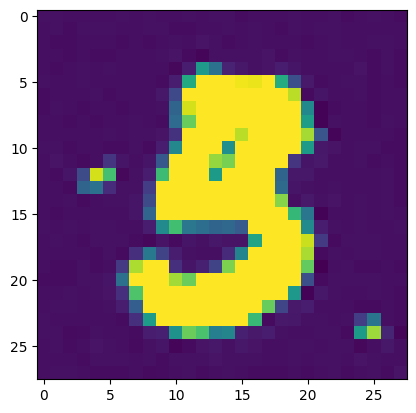


Epoch: 79 | Learning Rate: 0.00020971520000000012
0.03499261289834976
0.03385872766375542
0.0355386920273304
0.03414140269160271
0.0362478531897068
0.03481082245707512
0.03530207276344299
0.03349493816494942
0.035476189106702805
0.033824801445007324
0.03495415300130844
0.035349778831005096
0.036066073924303055
0.035805005580186844
0.036600105464458466
0.03440806269645691
0.03485282137989998
0.036279961466789246
0.0363052673637867
0.03540056571364403
0.03505614399909973
0.03412977606058121
0.03423455357551575
0.03574134781956673
0.03507668897509575
0.03601758927106857
0.03748572990298271
0.03386919945478439
0.03449726849794388
0.035501256585121155
0.03701888397336006
0.035987839102745056
0.03371625766158104
0.03562624752521515
0.03820101171731949
0.03689969703555107
0.03733889013528824
0.03518334776163101
0.03637191280722618
0.035546448081731796
0.03590177372097969
0.03620809316635132
0.03572367876768112
0.03433232009410858
0.03578624501824379
0.035922858864068985
0.03508709743618965
0

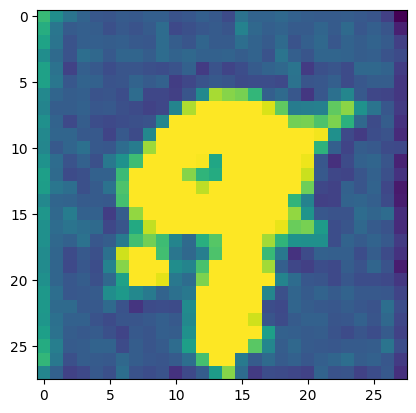


Epoch: 80 | Learning Rate: 0.00020971520000000012
0.0356125570833683
0.03541824594140053
0.034094396978616714
0.03452479839324951
0.03408299759030342
0.037038180977106094
0.03428317978978157
0.03651992976665497
0.03305758535861969
0.036280471831560135
0.03671393543481827
0.035300906747579575
0.03500574454665184
0.03591718524694443
0.03488731011748314
0.03484520688652992
0.03546888753771782
0.03467496857047081
0.03525443375110626
0.035358477383852005
0.035206642001867294
0.03520955145359039
0.03552320972084999
0.035560861229896545
0.03519662469625473
0.034685056656599045
0.0353957861661911
0.03540479391813278
0.03733936697244644
0.03471263498067856
0.03407033905386925
0.03346183896064758
0.03534889966249466
0.03464057296514511
0.03621615469455719
0.03547457605600357
0.03482171520590782
0.03619350120425224
0.03561372682452202
0.034179773181676865
0.03383566066622734
0.03697828948497772
0.03640836104750633
0.03626548498868942
0.03311455249786377
0.03375117480754852
0.03511210158467293
0.

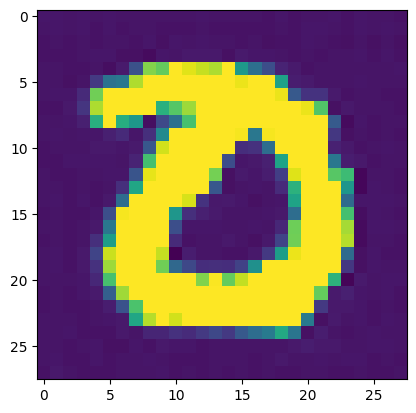


Epoch: 81 | Learning Rate: 0.0001677721600000001
0.03679847717285156
0.03512183204293251
0.03433673456311226
0.03555133938789368
0.033632904291152954
0.03657875210046768
0.03676825389266014
0.03577771782875061
0.03427319973707199
0.03672721982002258
0.03505556285381317
0.03573128953576088
0.03472831845283508
0.03652063012123108
0.03759327530860901
0.03531932458281517
0.03685750067234039
0.034297630190849304
0.034988127648830414
0.03484233841300011
0.03714056685566902
0.033642347902059555
0.03525194898247719
0.035391245037317276
0.03194468468427658
0.034137412905693054
0.032611630856990814
0.03623246029019356
0.035693198442459106
0.03528144210577011
0.03426932170987129
0.03437565639615059
0.03367575258016586
0.03524423763155937
0.032778870314359665
0.03784368932247162
0.033836375921964645
0.036354634910821915
0.03522815555334091
0.03433947265148163
0.036430153995752335
0.03527619317173958
0.03418087214231491
0.03750072792172432
0.03355204686522484
0.03459781035780907
0.0359903462231159

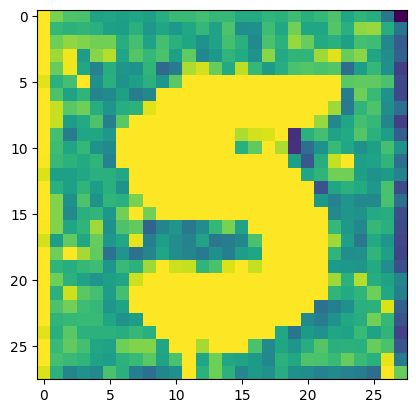


Epoch: 82 | Learning Rate: 0.0001677721600000001
0.034647975116968155
0.03450120612978935
0.0362643264234066
0.03429717570543289
0.03635765239596367
0.03611020743846893
0.035576097667217255
0.03732737526297569
0.0362379364669323
0.03535325080156326
0.03669927641749382
0.035041384398937225
0.03534939885139465
0.03540927916765213
0.035332661122083664
0.03686210885643959
0.035629574209451675
0.03380762040615082
0.03393586352467537
0.033980291336774826
0.035035956650972366
0.03308386728167534
0.036868661642074585
0.03481968864798546
0.03545553237199783
0.03509203717112541
0.03490981459617615
0.03328535333275795
0.03439851477742195
0.03402549773454666
0.03586295247077942
0.034772198647260666
0.03572671115398407
0.03396599739789963
0.03706064820289612
0.03620021790266037
0.035361964255571365
0.037280790507793427
0.03642967343330383
0.03546819090843201
0.035814765840768814
0.03568824753165245
0.0346810556948185
0.036776382476091385
0.03452657535672188
0.035384438931941986
0.03556156158447265

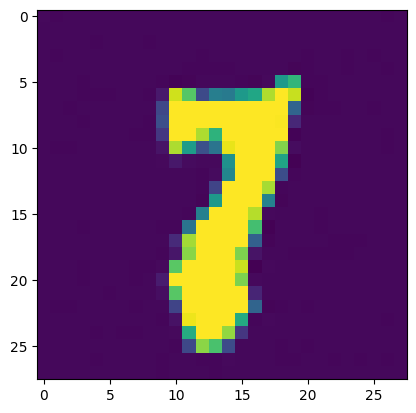


Epoch: 83 | Learning Rate: 0.0001677721600000001
0.03716575726866722
0.03485171124339104
0.03590969741344452
0.035527460277080536
0.034316107630729675
0.034536946564912796
0.03419879078865051
0.03630295395851135
0.03700659051537514
0.035239141434431076
0.03466914966702461
0.0345611646771431
0.03648565337061882
0.03543795272707939
0.033584125339984894
0.032835137099027634
0.03513165935873985
0.03599657490849495
0.034963786602020264
0.03413078188896179
0.03460811451077461
0.03512994199991226
0.03500135615468025
0.03478193283081055
0.038153424859046936
0.0349942110478878
0.03437677025794983
0.03639359772205353
0.03341728076338768
0.03454117476940155
0.035041261464357376
0.03450683131814003
0.036100007593631744
0.035389214754104614
0.03532059118151665
0.03552854806184769
0.03466644138097763
0.03467496111989021
0.03378863260149956
0.03479640558362007
0.035305455327034
0.03440850228071213
0.035039059817790985
0.03452945128083229
0.03689650073647499
0.032981954514980316
0.035292454063892365


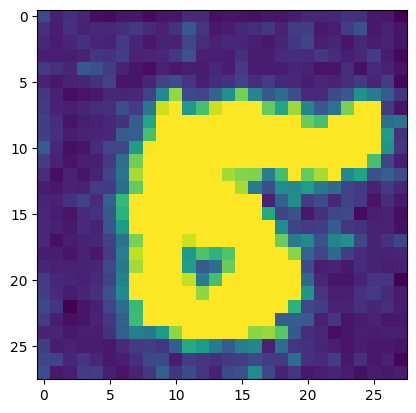


Epoch: 84 | Learning Rate: 0.0001677721600000001
0.033673714846372604
0.03532487899065018
0.036057665944099426
0.03326503187417984
0.03519206494092941
0.03344494849443436
0.03504692390561104
0.03772285580635071
0.03460004925727844
0.0358758270740509
0.03583865985274315
0.035737380385398865
0.035552896559238434
0.037157703191041946
0.03581583499908447
0.035616740584373474
0.03759349137544632
0.03486740216612816
0.036522336304187775
0.035877712070941925
0.03506185859441757
0.03521187603473663
0.035086002200841904
0.03424575552344322
0.03495929762721062
0.03573188558220863
0.03499859943985939
0.03507808595895767
0.03449186310172081
0.03507930412888527
0.035433877259492874
0.034160733222961426
0.03598761558532715
0.03533003851771355
0.03642299026250839
0.03280837461352348
0.034417442977428436
0.03453383594751358
0.035484470427036285
0.035582803189754486
0.036447156220674515
0.03538358956575394
0.036363933235406876
0.03590545430779457
0.03663249686360359
0.034891337156295776
0.035203490406

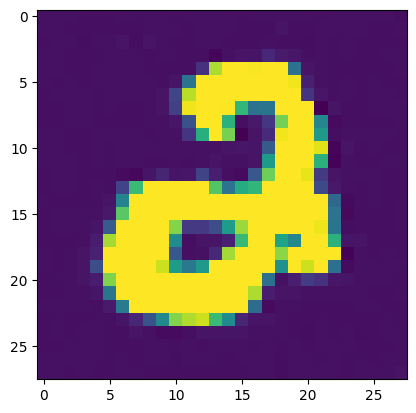


Epoch: 85 | Learning Rate: 0.0001677721600000001
0.03613157942891121
0.034368306398391724
0.03658704832196236
0.03863959759473801
0.035738877952098846
0.034104831516742706
0.03625300154089928
0.03330380097031593
0.035105474293231964
0.03433788940310478
0.03455251455307007
0.035344235599040985
0.033747050911188126
0.0355059914290905
0.03469058871269226
0.036862313747406006
0.03494908660650253
0.03549779951572418
0.0352877713739872
0.03330216556787491
0.03548843786120415
0.03516855090856552
0.03683101758360863
0.034603051841259
0.036521658301353455
0.03389795869588852
0.034436311572790146
0.03392118588089943
0.03464522212743759
0.03535753861069679
0.034734126180410385
0.03383691981434822
0.03412282466888428
0.03560097515583038
0.03396812826395035
0.03531324118375778
0.035869039595127106
0.035707954317331314
0.03526084125041962
0.033794332295656204
0.035347793251276016
0.03581975772976875
0.03501282259821892
0.037098709493875504
0.03443795442581177
0.034209903329610825
0.0340668186545372

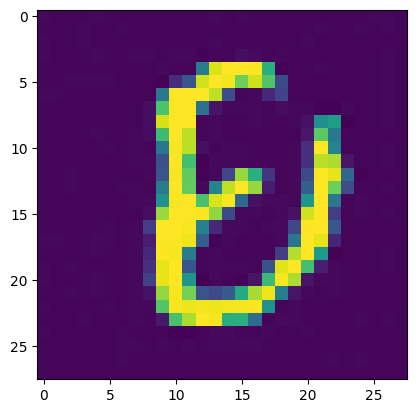


Epoch: 86 | Learning Rate: 0.0001677721600000001
0.03474052622914314
0.03538723662495613
0.03544735535979271
0.03438860550522804
0.03394385799765587
0.032565638422966
0.036110974848270416
0.035241540521383286
0.03396149352192879
0.035989075899124146
0.03562607616186142
0.03427276015281677
0.036363519728183746
0.034914594143629074
0.03518924489617348
0.035541899502277374
0.035782281309366226
0.034738849848508835
0.036459628492593765
0.035970933735370636
0.03693103790283203
0.03317300230264664
0.0328216627240181
0.03576670214533806
0.0355568565428257
0.03528035432100296
0.036536406725645065
0.036080434918403625
0.03507877513766289
0.03517397865653038
0.0350869856774807
0.03485069051384926
0.03628465160727501
0.03368358314037323
0.03543941304087639
0.03727724403142929
0.03597019612789154
0.035340603440999985
0.03494011238217354
0.03402397781610489
0.03591303899884224
0.033680278807878494
0.03376596421003342
0.03716311976313591
0.035307515412569046
0.03423278406262398
0.03686506673693657


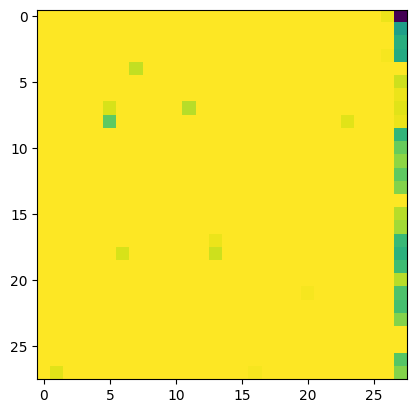


Epoch: 87 | Learning Rate: 0.0001677721600000001
0.03686004504561424
0.036240942776203156
0.03584064543247223
0.03575334697961807
0.03931169956922531
0.03492327779531479
0.033773377537727356
0.035356052219867706
0.03358178585767746
0.034531306475400925
0.0338764488697052
0.034545473754405975
0.035668499767780304
0.03749536722898483
0.03547152504324913
0.03529662638902664
0.03520865738391876
0.037453945726156235
0.035243403166532516
0.03670627251267433
0.0363236665725708
0.03442351147532463
0.03455188870429993
0.03511236608028412
0.035684969276189804
0.034635622054338455
0.03316070884466171
0.03697581961750984
0.035488080233335495
0.03620437532663345
0.03624198958277702
0.036873623728752136
0.03668954223394394
0.03560429811477661
0.035237669944763184
0.03519124537706375
0.034093622118234634
0.0346592552959919
0.03394544869661331
0.03600601106882095
0.034708961844444275
0.03425188735127449
0.03422939032316208
0.03638377785682678
0.03510729968547821
0.03584350645542145
0.0341631136834621

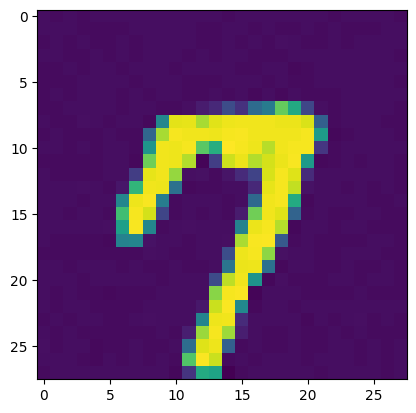


Epoch: 88 | Learning Rate: 0.0001677721600000001
0.03421163186430931
0.03387625887989998
0.034817811101675034
0.03356800600886345
0.03573709353804588
0.034548696130514145
0.03552332520484924
0.03503793105483055
0.033804308623075485
0.034637451171875
0.03525417298078537
0.03616763651371002
0.03385428339242935
0.03324604034423828
0.03513778746128082
0.03718351572751999
0.036437634378671646
0.033483631908893585
0.033864933997392654
0.034505344927310944
0.03572762757539749
0.03646755963563919
0.03698129579424858
0.03829355165362358
0.03512478619813919
0.03531629219651222
0.03451559692621231
0.036811213940382004
0.034640438854694366
0.03466114029288292
0.03334767371416092
0.03404132276773453
0.03520394489169121
0.03457426652312279
0.03276422992348671
0.034454233944416046
0.03586353734135628
0.035106465220451355
0.0344255231320858
0.03376440703868866
0.03318823501467705
0.03454168885946274
0.03554048389196396
0.03535200655460358
0.035892926156520844
0.035345353186130524
0.036012861877679825

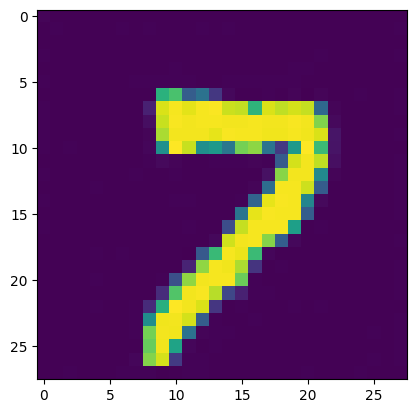


Epoch: 89 | Learning Rate: 0.0001677721600000001
0.036742229014635086
0.036646779626607895
0.0366259329020977
0.03585861623287201
0.03325099125504494
0.03608237951993942
0.0345054492354393
0.03482954949140549
0.035193994641304016
0.03384493291378021
0.036319293081760406
0.03543802350759506
0.03539583832025528
0.03505115583539009
0.03344199061393738
0.03409786894917488
0.035642579197883606
0.03672405704855919
0.03603249043226242
0.035963065922260284
0.03488706797361374
0.03549814969301224
0.03300304710865021
0.03640421852469444
0.03588499128818512
0.03473566845059395
0.03518608957529068
0.03573029860854149
0.03582428768277168
0.03460870310664177
0.033973488956689835
0.03559229150414467
0.036873865872621536
0.03528668358922005
0.03622780740261078
0.03586289659142494
0.03598586842417717
0.035084404051303864
0.035780660808086395
0.036559268832206726
0.03437717631459236
0.037943337112665176
0.0351414680480957
0.03600514680147171
0.03433695808053017
0.03350332751870155
0.0369504913687706
0.

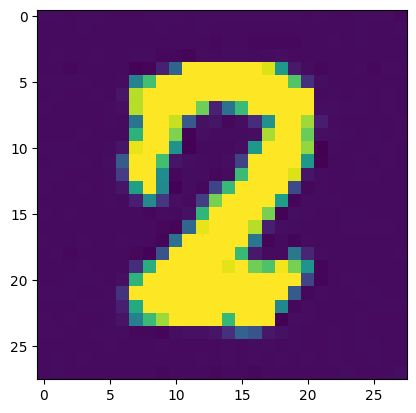


Epoch: 90 | Learning Rate: 0.0001677721600000001
0.03586013242602348
0.03457155078649521
0.03505728766322136
0.03697096183896065
0.035890959203243256
0.03430071473121643
0.03504364565014839
0.03334668278694153
0.03593205288052559
0.03469224274158478
0.03442652150988579
0.034704942256212234
0.03683014586567879
0.036658067256212234
0.033988457173109055
0.03487143665552139
0.036428820341825485
0.03437625244259834
0.03526993840932846
0.03424134477972984
0.03475552424788475
0.036386556923389435
0.03617843613028526
0.03507358953356743
0.036218538880348206
0.03571946546435356
0.0349218025803566
0.03386101499199867
0.034163475036621094
0.03570764884352684
0.03404824435710907
0.03515510633587837
0.03560704365372658
0.036474764347076416
0.03591085597872734
0.0352109894156456
0.03426789492368698
0.036311037838459015
0.036060672253370285
0.032363444566726685
0.035224784165620804
0.03768478333950043
0.036546558141708374
0.033012937754392624
0.03542038053274155
0.03519073873758316
0.036563709378242

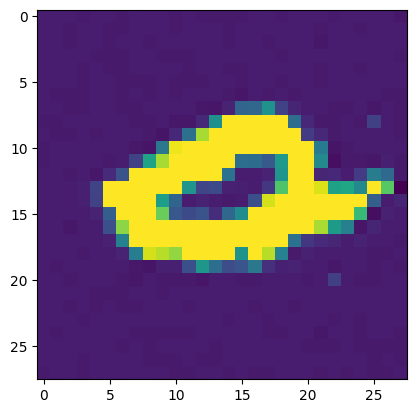


Epoch: 91 | Learning Rate: 0.00013421772800000008
0.035726021975278854
0.035399869084358215
0.03509227931499481
0.03549933806061745
0.03517671301960945
0.03241237625479698
0.03744857385754585
0.035159338265657425
0.03395349904894829
0.03527000546455383
0.03469281643629074
0.036353953182697296
0.03460624814033508
0.03517427295446396
0.03652182221412659
0.03586385026574135
0.03566047549247742
0.035759154707193375
0.03524971753358841
0.034383680671453476
0.03612736612558365
0.03462216258049011
0.034445870667696
0.03511468321084976
0.03696751594543457
0.03414873778820038
0.03466152772307396
0.033684518188238144
0.03650042042136192
0.03483070433139801
0.034808896481990814
0.034761782735586166
0.03636065870523453
0.035170432180166245
0.036223046481609344
0.03514697402715683
0.03494006767868996
0.03564666584134102
0.03464896231889725
0.034925542771816254
0.03522781282663345
0.03660265728831291
0.03498149663209915
0.03478167578577995
0.03500949963927269
0.03473527356982231
0.03612441942095756

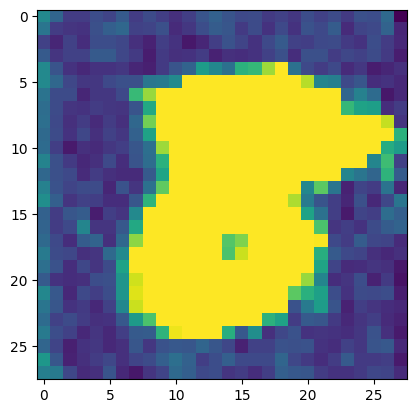


Epoch: 92 | Learning Rate: 0.00013421772800000008
0.03530849888920784
0.03609204292297363
0.035696931183338165
0.03398400917649269
0.03312251344323158
0.03579317778348923
0.03559571132063866
0.032285332679748535
0.0359673947095871
0.03310464695096016
0.03476849943399429
0.03645960986614227
0.03449748829007149
0.03654145449399948
0.03621695563197136
0.037190236151218414
0.03405705466866493
0.03481965884566307
0.035497989505529404
0.035782985389232635
0.03449394553899765
0.03314818814396858
0.034826163202524185
0.03526659682393074
0.0352068655192852
0.03482099995017052
0.03366148844361305
0.03693261742591858
0.03551574423909187
0.033406421542167664
0.036389466375112534
0.03424231335520744
0.03637992963194847
0.03461296856403351
0.03574809804558754
0.03450646623969078
0.03540201112627983
0.03456452116370201
0.03599769249558449
0.03489106893539429
0.034201886504888535
0.036703772842884064
0.0339043103158474
0.03556760028004646
0.035594843327999115
0.03529000282287598
0.03540218621492386
0

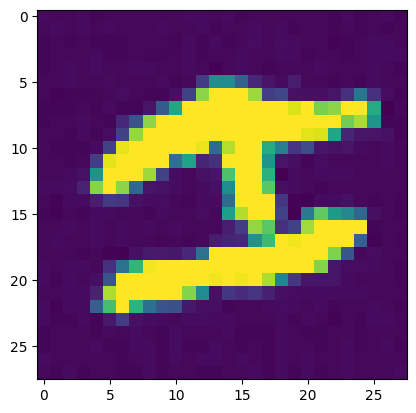


Epoch: 93 | Learning Rate: 0.00013421772800000008
0.034130290150642395
0.03364396095275879
0.03522410988807678
0.03563808649778366
0.03467259183526039
0.03648371249437332
0.03650796040892601
0.03488334268331528
0.034360021352767944
0.0335882343351841
0.03557072952389717
0.03341728076338768
0.033700935542583466
0.035960499197244644
0.036344148218631744
0.035617075860500336
0.03490990772843361
0.03587505966424942
0.03456486016511917
0.03487413376569748
0.03518597036600113
0.03520187735557556
0.035109929740428925
0.03538908809423447
0.034853897988796234
0.03306032717227936
0.03669628128409386
0.03520992770791054
0.034525323659181595
0.03428380936384201
0.03412232920527458
0.03427597135305405
0.03732498362660408
0.03475012630224228
0.03338569030165672
0.03642290085554123
0.03551855310797691
0.03412345051765442
0.03392818570137024
0.03569188341498375
0.03649231418967247
0.03389407694339752
0.034887365996837616
0.03693974018096924
0.03609545901417732
0.03680012747645378
0.0351705439388752
0

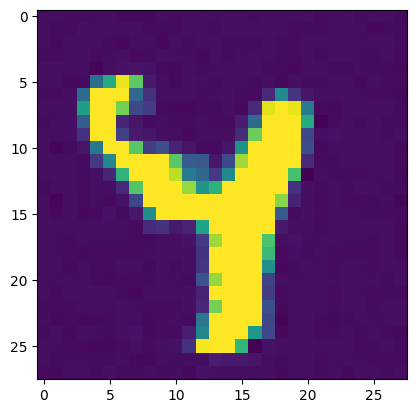


Epoch: 94 | Learning Rate: 0.00013421772800000008
0.03502326086163521
0.03193550929427147
0.035791538655757904
0.033163927495479584
0.03331223130226135
0.03336424008011818
0.036395005881786346
0.03425315022468567
0.03724933788180351
0.03472578525543213
0.03600049018859863
0.03405314311385155
0.037196043878793716
0.03491682559251785
0.03597044199705124
0.03648095205426216
0.03678159788250923
0.03749924153089523
0.035846151411533356
0.03532339632511139
0.03622182831168175
0.034098654985427856
0.034904900938272476
0.035228800028562546
0.03622862324118614
0.03566604107618332
0.0357050783932209
0.033080585300922394
0.033370450139045715
0.03514310345053673
0.03567679598927498
0.035157520323991776
0.0341683104634285
0.03808475285768509
0.03279228135943413
0.03546128049492836
0.03489211946725845
0.03346439078450203
0.03328406438231468
0.03357437998056412
0.03402823209762573
0.033599045127630234
0.03450747951865196
0.03491072356700897
0.03648322448134422
0.03546777367591858
0.03316350653767586

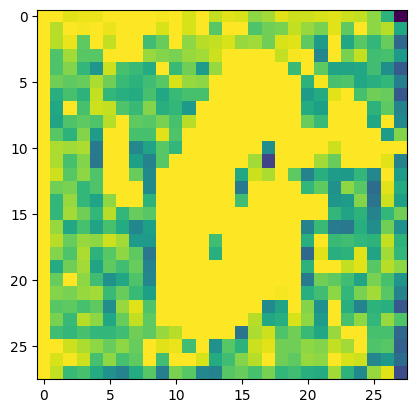


Epoch: 95 | Learning Rate: 0.00013421772800000008
0.034909144043922424
0.033824872225522995
0.035652272403240204
0.03419984132051468
0.035562481731176376
0.03646864369511604
0.03317668288946152
0.035684142261743546
0.0364023819565773
0.03400846943259239
0.03560086712241173
0.035012535750865936
0.03585585579276085
0.035753682255744934
0.0344427190721035
0.0351552814245224
0.03577888011932373
0.03624710068106651
0.032725684344768524
0.03494654968380928
0.034679632633924484
0.03602173924446106
0.035011664032936096
0.03447320684790611
0.03438160941004753
0.03627435117959976
0.035474635660648346
0.03430652990937233
0.03722444549202919
0.03514905273914337
0.0348820723593235
0.035841312259435654
0.03537410497665405
0.03443513810634613
0.03439059108495712
0.03647993132472038
0.03699732571840286
0.03696976974606514
0.03464936092495918
0.03803187236189842
0.0344923734664917
0.03452076017856598
0.03414205461740494
0.03314711153507233
0.03392089903354645
0.03553077578544617
0.034846026450395584
0

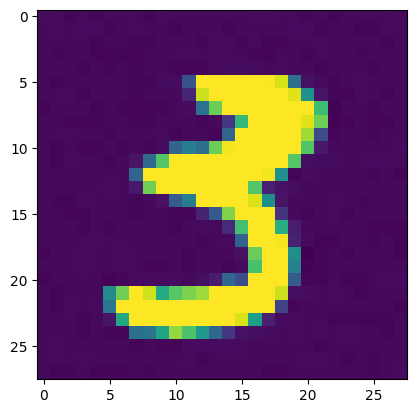


Epoch: 96 | Learning Rate: 0.00013421772800000008
0.03482280299067497
0.03473393991589546
0.03444662690162659
0.034439533948898315
0.0364096499979496
0.03577695041894913
0.03541995584964752
0.03457649424672127
0.033902253955602646
0.035084839910268784
0.03488030284643173
0.03402465209364891
0.03644082322716713
0.0363757461309433
0.03438021242618561
0.03524704650044441
0.034966401755809784
0.035520877689123154
0.036851927638053894
0.03494192287325859
0.034507784992456436
0.03433925285935402
0.03530639782547951
0.034592945128679276
0.03517017513513565
0.03363126888871193
0.03538636490702629
0.034844908863306046
0.03351558372378349
0.03484492003917694
0.03465409204363823
0.03479544073343277
0.03553012013435364
0.03465813025832176
0.03466694429516792
0.035056326538324356
0.03623208776116371
0.03466465324163437
0.03605567291378975
0.034748245030641556
0.035026032477617264
0.034345805644989014
0.036089662462472916
0.03814228996634483
0.037274666130542755
0.03383651748299599
0.03471145406365

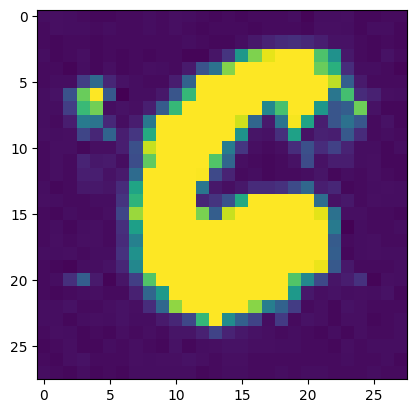


Epoch: 97 | Learning Rate: 0.00013421772800000008
0.03405739367008209
0.03484869375824928
0.03340990096330643
0.03606678545475006
0.034639470279216766
0.037041984498500824
0.035972710698843
0.03400461748242378
0.03777630999684334
0.03480711206793785
0.034833088517189026
0.03775098919868469
0.034829799085855484
0.03300125524401665
0.035558074712753296
0.03559846803545952
0.03503435105085373
0.03566049411892891
0.03558221086859703
0.033261045813560486
0.036981694400310516
0.035793062299489975
0.036274779587984085
0.03559624403715134
0.03443261981010437
0.03727000579237938
0.03467411547899246
0.035402894020080566
0.03418460488319397
0.03538331761956215
0.034874327480793
0.035593997687101364
0.033974677324295044
0.03453074023127556
0.03462653607130051
0.035116977989673615
0.03583012893795967
0.034438591450452805
0.03448546677827835
0.036137741059064865
0.0332743339240551
0.036354243755340576
0.03429415822029114
0.03579786792397499
0.03509466350078583
0.035393886268138885
0.034588877111673

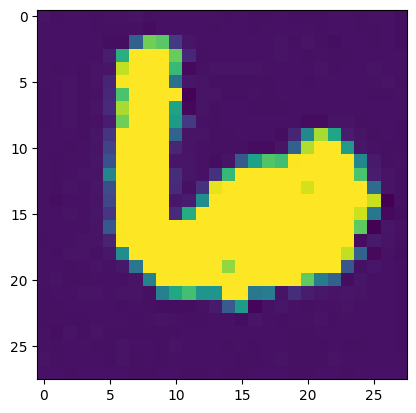


Epoch: 98 | Learning Rate: 0.00013421772800000008
0.0332803949713707
0.03364355489611626
0.03590443730354309
0.03586128354072571
0.03467218577861786
0.035326726734638214
0.03348376974463463
0.03478860855102539
0.03536165878176689
0.03414547070860863
0.03537624701857567
0.034842971712350845
0.03208757936954498
0.03496610000729561
0.03660573810338974
0.03458568453788757
0.035609170794487
0.03457573056221008
0.03522375971078873
0.034322772175073624
0.03311998397111893
0.03515138849616051
0.036059826612472534
0.035995904356241226
0.036149438470602036
0.0355023592710495
0.033990178257226944
0.034222014248371124
0.0342443622648716
0.035104669630527496
0.03620250150561333
0.03391624987125397
0.03465305268764496
0.03490455076098442
0.0351325087249279
0.0389677993953228
0.03506365790963173
0.03548504412174225
0.03663162142038345
0.036198507994413376
0.03302907943725586
0.034445565193891525
0.03412903845310211
0.03489384427666664
0.03695636987686157
0.03627482056617737
0.032154716551303864
0.03

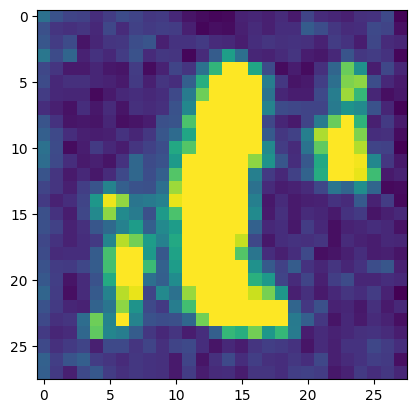


Epoch: 99 | Learning Rate: 0.00013421772800000008
0.03453315421938896
0.03466764837503433
0.03418003395199776
0.03384121134877205
0.03469458222389221
0.03605691343545914
0.03643279895186424
0.03317690268158913
0.03309314697980881
0.034942928701639175
0.03467283397912979
0.0348924845457077
0.03612631559371948
0.034371327608823776
0.037907280027866364
0.03525692969560623
0.03384362533688545
0.035580314695835114
0.0340760201215744
0.03480607643723488
0.03434067219495773
0.03464148938655853
0.0350525826215744
0.03538639843463898
0.03752966597676277
0.03560290113091469
0.03351110592484474
0.034969743341207504
0.034273661673069
0.03550845757126808
0.034538839012384415
0.035623110830783844
0.03735063970088959
0.03480590134859085
0.03649631887674332
0.03590487688779831
0.03600482642650604
0.03732360899448395
0.03429454565048218
0.03571426495909691
0.035439688712358475
0.03538259491324425
0.032409608364105225
0.0352245531976223
0.03461563214659691
0.035192303359508514
0.036568671464920044
0.03

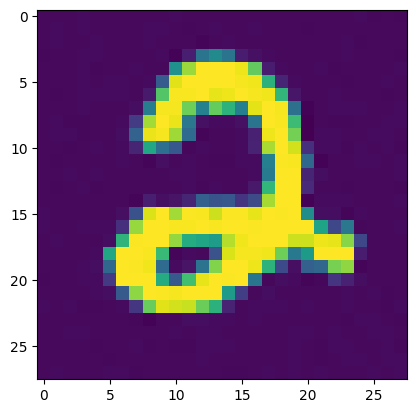


Epoch: 100 | Learning Rate: 0.00013421772800000008
0.03273533657193184
0.035276323556900024
0.034801188856363297
0.03529723361134529
0.034823447465896606
0.03499313071370125
0.03549446165561676
0.035777539014816284
0.036740392446517944
0.03583640232682228
0.032739847898483276
0.0349537618458271
0.0344199500977993
0.03738575801253319
0.035113975405693054
0.035417985171079636
0.03374378755688667
0.036208901554346085
0.03544279932975769
0.03402527794241905
0.03395804390311241
0.034799087792634964
0.03683706000447273
0.03493195399641991
0.033746615052223206
0.03429792821407318
0.034587424248456955
0.033612336963415146
0.03323604166507721
0.03423600271344185
0.0354996919631958
0.032986849546432495
0.03630769997835159
0.03463396802544594
0.03448588773608208
0.03304489329457283
0.03400744870305061
0.03613738715648651
0.03519755229353905
0.03403293713927269
0.033739056438207626
0.03413975238800049
0.03581229969859123
0.03762703388929367
0.03466491773724556
0.03333212435245514
0.03353305533528

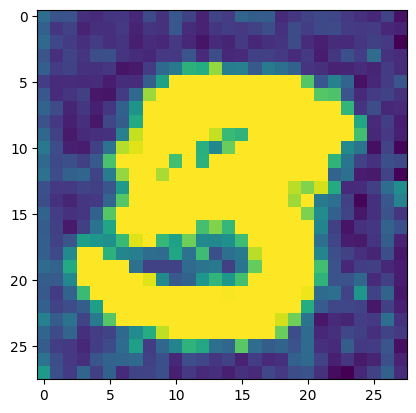

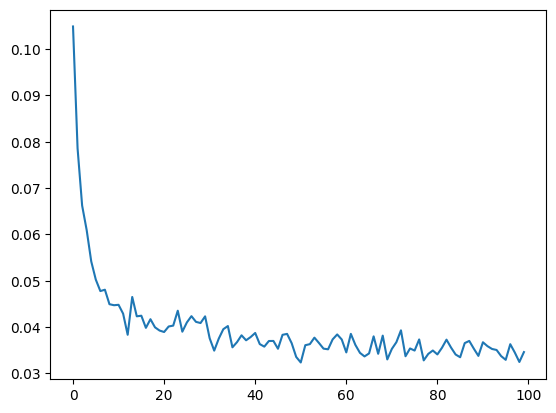

In [12]:
print("Number of parameters:", sum([param.numel() for param in unet.parameters()]))
optimizer = optim.Adam(unet.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.8)
train(unet, data, ddpm, optimizer, scheduler, epochs=100, num_workers=2)

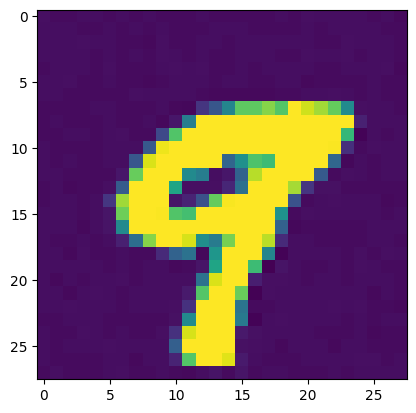

In [14]:
unet.eval()
display_generated(unet, ddpm, data)

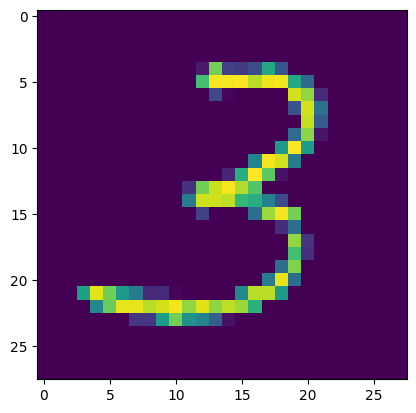

In [18]:
unet.eval()
display_generated(unet, ddpm, data)

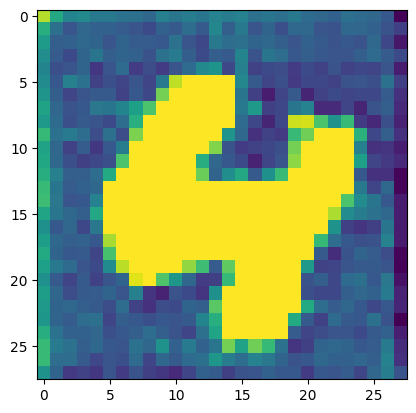

In [19]:
unet.eval()
display_generated(unet, ddpm, data)

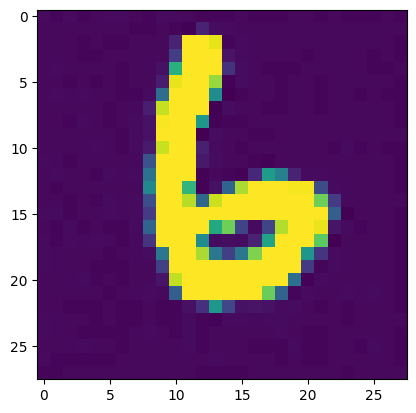

In [20]:
unet.eval()
display_generated(unet, ddpm, data)

In [21]:
torch.save(unet.state_dict(), os.path.join(GOOGLE_DRIVE_PATH, "unet_mnist"))

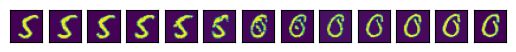

In [38]:
unet.eval()
ddpm.interpolate(data, 23424, 234, unet, t=100)

###CIFAR10

In [20]:
ddpm_dict = {
  "beta_start": 1e-4,
  "beta_end": 2e-2,
  "timesteps": 512,
  "device": device,
  "dtype": dtype
}

data_dict = {
  "name": "cifar10",
  "path": "data",
  "batch_size": 1024
}

ddpm = DDPM(**ddpm_dict)
data2 = Data(**data_dict)

unet_dict = {
  "input_channels": data2.shape[0],
  "hid_channels": 32,
  "num_blocks": 4,
  "emb_dim": 512
}

unet2 = UNet(**unet_dict).to(dtype=ddpm.dtype, device=ddpm.device)

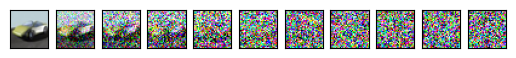

In [12]:
visualize_forward(ddpm, data2)

Number of parameters: 9563776

Epoch: 1 | Learning Rate: 0.001
1.3156226873397827
0.993419349193573
0.7875773906707764
0.6422111988067627
0.5545781850814819
0.4860658347606659
0.42288321256637573
0.37131306529045105
0.3292404115200043
0.29487842321395874
0.27648451924324036
0.24645864963531494
0.2336873859167099
0.22928735613822937
0.21479305624961853
0.20740249752998352
0.19835369288921356
0.19806954264640808
0.1962345689535141
0.1912471354007721
0.18906627595424652
0.18241345882415771
0.1862727850675583
0.17827090620994568
0.17848080396652222
0.17698732018470764
0.16858136653900146
0.16768114268779755
0.17017601430416107
0.16473248600959778
0.15876342356204987
0.16133823990821838
0.16253474354743958
0.1529044806957245
0.1522972136735916
0.16190829873085022
0.15705716609954834
0.14976003766059875
0.14565686881542206
0.15173855423927307
0.15336965024471283
0.1501823365688324
0.15074974298477173
0.15420423448085785
0.14684419333934784
0.14640216529369354
0.14034613966941833
0.1424218714

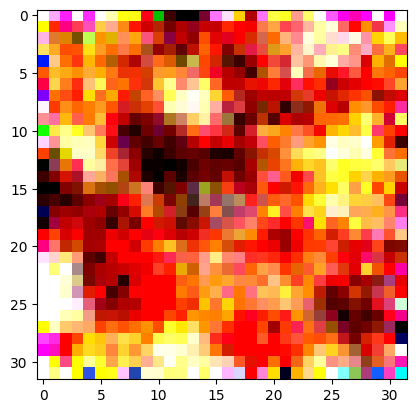


Epoch: 2 | Learning Rate: 0.001
0.14216077327728271
0.14054016768932343
0.13699989020824432
0.14103323221206665
0.1341589093208313


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x79c024d6de40>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x79c024d6de40>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 16

0.13514381647109985


^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process


0.14243817329406738
0.1295825093984604
0.1274002492427826
0.1315799504518509
0.12439747899770737
0.13214994966983795
0.12683039903640747
0.12877026200294495
0.13150547444820404
0.1281222701072693
0.13005566596984863
0.1275816261768341
0.12791165709495544
0.12503594160079956
0.13424766063690186
0.12576505541801453
0.12816952168941498
0.11962243169546127
0.1260828971862793
0.124829962849617
0.12503087520599365
0.1250418871641159
0.12006690353155136
0.12021495401859283
0.11646639555692673
0.11695613712072372
0.11734481900930405
0.11864187568426132
0.11781172454357147
0.12652340531349182
0.11377960443496704
0.10983508825302124
0.11191793531179428
0.121674083173275
0.10735130310058594
0.12033268064260483
0.10925804078578949
0.11488416790962219
0.10865998268127441
0.10699983686208725
0.11381199210882187
0.11156117916107178
0.10552434623241425


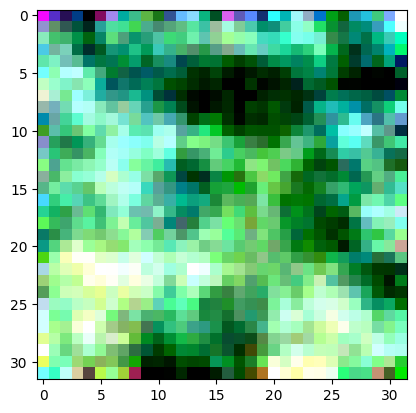


Epoch: 3 | Learning Rate: 0.001
0.11992999166250229
0.10947118699550629
0.1142699345946312
0.1105869859457016
0.10645127296447754
0.10811851918697357
0.10519663989543915
0.10732388496398926
0.11415669322013855
0.10823999345302582
0.10768476128578186
0.0972096174955368
0.09869271516799927
0.10021305084228516
0.10536911338567734
0.10875540971755981
0.10069449990987778
0.10377516597509384
0.1090623065829277
0.09703469276428223
0.10464638471603394
0.10147325694561005
0.10363259166479111
0.09847112745046616
0.09528928995132446
0.09419010579586029
0.1016201600432396
0.09375171363353729
0.09937568753957748
0.09223869442939758
0.09559397399425507
0.09442399442195892
0.09949657320976257
0.10044869035482407
0.09777369350194931
0.09787997603416443
0.09243999421596527
0.09527968615293503
0.08786936104297638
0.09685830771923065
0.09587600082159042
0.09165380895137787
0.09072256088256836
0.09035097062587738
0.08753183484077454
0.09236855804920197
0.09284240007400513
0.08549158275127411
0.0901835337

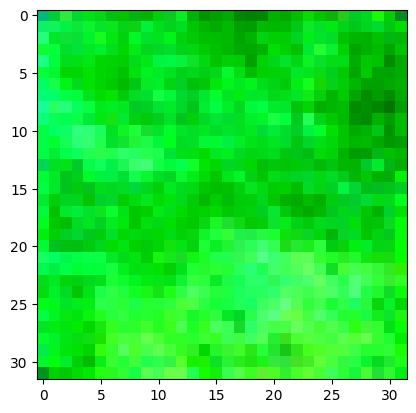


Epoch: 4 | Learning Rate: 0.001
0.08874141424894333
0.08921437710523605
0.09182265400886536
0.09236960113048553
0.0905449241399765
0.09032698720693588
0.0910128578543663
0.08544859290122986
0.08809884637594223
0.08934380859136581
0.08636201918125153
0.08938663452863693
0.08822043985128403
0.08284684270620346
0.08604612201452255
0.08643871545791626
0.08168339729309082
0.08435579389333725
0.0875350758433342
0.08477447926998138
0.08194657415151596
0.07779684662818909
0.08620060980319977
0.08794216811656952
0.08842207491397858
0.08536656200885773
0.08697595447301865
0.08208534121513367
0.07406940311193466
0.07979246228933334
0.07749389111995697
0.0813346803188324
0.08746712654829025
0.0870634913444519
0.07837793231010437
0.0875585675239563
0.0817350298166275
0.08375687897205353
0.0866134986281395
0.07913708686828613
0.08538571000099182
0.08086664974689484
0.07782261073589325
0.08111792802810669
0.08110008388757706
0.08453457057476044
0.08245357125997543
0.08229349553585052
0.0803592205047

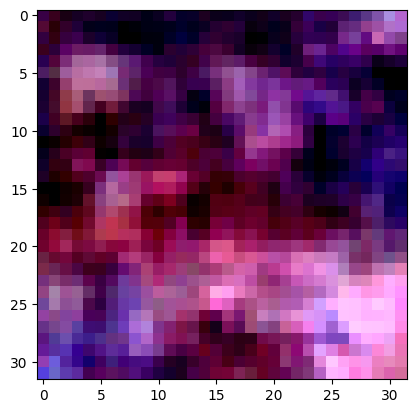


Epoch: 5 | Learning Rate: 0.001
0.08075464516878128
0.07937242090702057
0.07351355254650116
0.07729558646678925
0.07743076235055923
0.07761875540018082
0.07873523235321045
0.07774268835783005
0.07502346485853195
0.07637612521648407
0.08552780747413635
0.07745499163866043
0.08005672693252563
0.07304735481739044
0.07571332156658173
0.08045236766338348
0.08044321835041046
0.07586070150136948
0.07839404046535492
0.07872766256332397
0.07403866946697235
0.07348859310150146
0.07272598147392273
0.08038650453090668
0.0748632550239563
0.07909731566905975
0.07806193828582764
0.0751744955778122
0.07768692076206207
0.07131089270114899
0.07560788840055466
0.07532988488674164
0.07418277859687805
0.07289719581604004
0.07937350869178772
0.07384355366230011
0.07658873498439789
0.07457409799098969
0.07887736707925797
0.07068347930908203
0.06897493451833725
0.07216561585664749
0.07236403226852417
0.07548819482326508
0.07886043190956116
0.07202094048261642
0.0757923424243927
0.07218709588050842
0.07745060

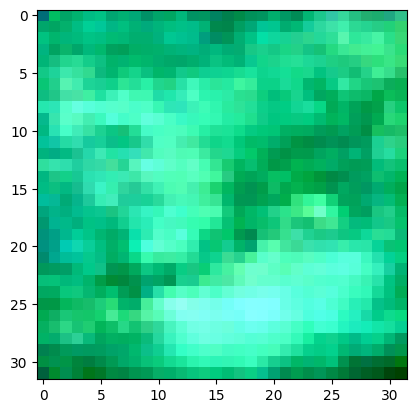


Epoch: 6 | Learning Rate: 0.001
0.07154294103384018
0.07122184336185455
0.07128480076789856
0.07014098763465881
0.06895914673805237
0.0718347579240799
0.07749378681182861
0.07278268039226532
0.07409194856882095
0.07286077737808228
0.06868945062160492
0.07430195808410645
0.07244885712862015
0.0769389420747757
0.07562435418367386
0.0694446712732315
0.07380882650613785
0.06794288009405136
0.07748688757419586
0.07224351912736893
0.07175794243812561
0.07326319813728333
0.07206417620182037
0.0711967945098877
0.06646860390901566
0.06338673830032349
0.07004623115062714
0.06960462033748627
0.07129742205142975
0.0766368955373764
0.06830213963985443
0.07148391008377075
0.07407912611961365
0.06547142565250397
0.06871375441551208
0.06464730948209763
0.07233847677707672
0.06590041518211365
0.07035090029239655
0.07032463699579239
0.06730064749717712
0.07165446877479553
0.0661185085773468
0.0768595039844513
0.07117849588394165
0.06651909649372101
0.06534608453512192
0.06733255088329315
0.060083981603

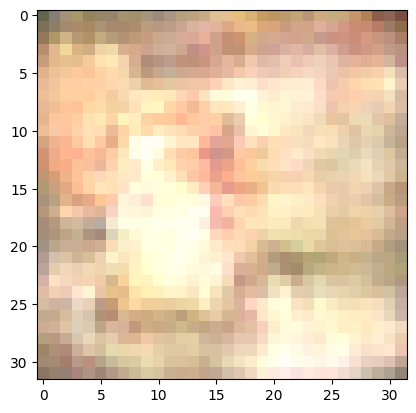


Epoch: 7 | Learning Rate: 0.001
0.06510283052921295
0.06790363788604736
0.07022057473659515
0.06930000334978104
0.06638661026954651
0.06358122825622559
0.06304958462715149
0.06592609733343124
0.0663476213812828
0.06828168034553528
0.07388045638799667
0.06646014750003815
0.05830052122473717
0.0675533264875412
0.06714246422052383
0.06381683051586151
0.06251116096973419
0.06376956403255463
0.06437817215919495
0.06716983765363693
0.06888711452484131
0.07049189507961273
0.06563499569892883
0.07016334682703018
0.06507423520088196
0.0658874660730362
0.06605607271194458
0.06072128936648369
0.06575869768857956
0.0685553252696991
0.06707217544317245
0.06779598444700241
0.07025264203548431
0.06460093706846237
0.06559397280216217
0.06672301143407822
0.06535186618566513
0.06276959925889969
0.07204017043113708
0.06276112049818039
0.06577572226524353
0.06696765869855881
0.06267128884792328
0.0679970309138298
0.07298543304204941
0.06377828121185303
0.06751307100057602
0.07135626673698425
0.0748954713

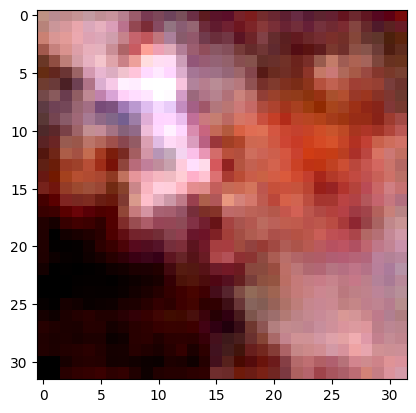


Epoch: 8 | Learning Rate: 0.001
0.06359373778104782
0.06718133389949799
0.06468817591667175
0.06702899187803268
0.0688825249671936
0.07007502019405365
0.06204795837402344
0.060809358954429626
0.06326582282781601
0.06278014183044434
0.06752809882164001
0.061174869537353516
0.06312461197376251
0.06054110452532768
0.06369729340076447
0.07096449285745621
0.056690704077482224
0.07077783346176147
0.06386126577854156
0.06257936358451843
0.06485020369291306
0.0695800930261612
0.06451179087162018
0.05947808921337128
0.06296160817146301
0.06201326474547386
0.06642401963472366
0.06280927360057831
0.06184346601366997
0.06185080111026764
0.06415464729070663
0.06179748475551605
0.05978759750723839
0.06142602115869522
0.0635368824005127
0.06747331470251083
0.06510408967733383
0.06272925436496735
0.06668458133935928
0.065855011343956
0.060570087283849716
0.06465022265911102
0.06511032581329346
0.061047594994306564
0.06509348005056381
0.06387614458799362
0.06518904864788055
0.06183142587542534
0.05918

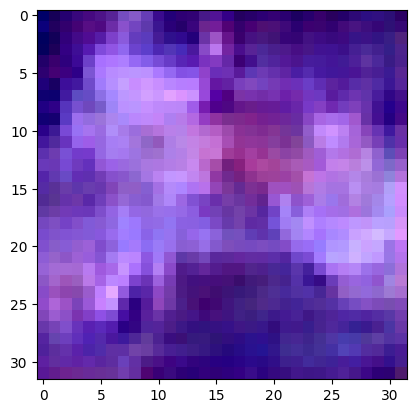


Epoch: 9 | Learning Rate: 0.001
0.07098253071308136
0.06896479427814484
0.06367950886487961
0.06458252668380737
0.058951541781425476
0.06342451274394989
0.0680420771241188
0.06535574793815613
0.06115945428609848
0.06374389678239822
0.06609705090522766
0.06302891671657562
0.06256799399852753
0.061792366206645966
0.06152327358722687
0.057467468082904816
0.07060596346855164
0.06437082588672638
0.06557390093803406
0.06162206828594208
0.06290462613105774
0.06408275663852692
0.06086906045675278
0.06872729957103729
0.06452711671590805
0.06050168722867966
0.062216054648160934
0.061618126928806305
0.05768914148211479
0.05700862035155296
0.05912606045603752
0.05644531175494194
0.056637611240148544
0.0596405565738678
0.06055837869644165
0.0604223757982254
0.06212138384580612
0.06552639603614807
0.05429957062005997
0.060713838785886765
0.059091292321681976
0.06400357186794281
0.06322947144508362
0.06329694390296936
0.056749843060970306
0.06388847529888153
0.06246425211429596
0.06124330684542656
0

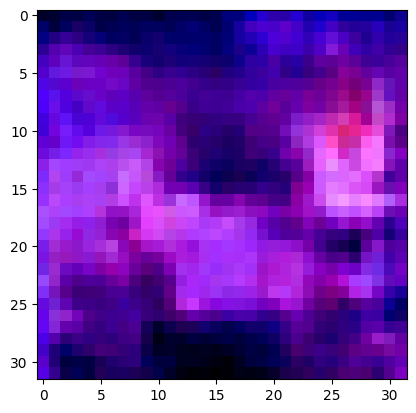


Epoch: 10 | Learning Rate: 0.001
0.06145770847797394
0.05841716751456261
0.05449027940630913
0.06423139572143555
0.06160574406385422
0.05847961828112602
0.06035023182630539
0.06181369349360466
0.06068010628223419
0.05907030031085014
0.06306584179401398
0.06085444986820221
0.060618095099925995
0.06690390408039093
0.06292331218719482
0.06221582740545273
0.06368051469326019
0.06207400560379028
0.05996175855398178
0.05527796596288681
0.06274272501468658
0.0591762475669384
0.06383737921714783
0.05806339904665947
0.06452477723360062
0.061832740902900696
0.05834871530532837
0.05889931321144104
0.06237804889678955
0.0609457902610302
0.05990838259458542
0.05784238502383232
0.056368835270404816
0.05644522234797478
0.06253667175769806
0.057563506066799164
0.06078801676630974
0.059999577701091766
0.06215464323759079
0.0572269968688488
0.06031922623515129
0.0621231310069561
0.057238079607486725
0.061864372342824936
0.06263598799705505
0.059177398681640625
0.059405308216810226
0.05916912108659744
0

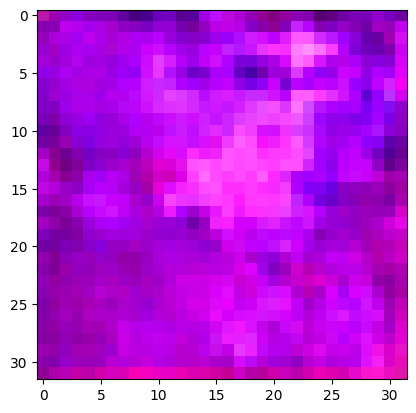


Epoch: 11 | Learning Rate: 0.001
0.05613688379526138
0.06693193316459656
0.06020907312631607
0.05916036292910576
0.056061625480651855
0.054829057306051254
0.060293953865766525
0.06450115144252777
0.06493381410837173
0.06241100654006004
0.060876231640577316
0.05712282285094261
0.0520043671131134
0.06319041550159454
0.06293468177318573
0.06350351870059967
0.059059999883174896
0.06412766873836517
0.05969937890768051
0.06046643108129501
0.06002616509795189
0.05391006916761398
0.05365319177508354
0.06037260591983795
0.060413382947444916
0.06174730509519577
0.05724230036139488
0.05288253352046013
0.06181397661566734
0.0605490505695343
0.06352629512548447
0.05798249691724777
0.0606154166162014
0.0625370442867279
0.06407854706048965
0.05941671133041382
0.06066571921110153
0.05501465126872063
0.06072011590003967
0.06090887635946274
0.060812897980213165
0.056205254048109055
0.05853309482336044
0.0527477040886879
0.06335761398077011
0.06255511939525604
0.06266366690397263
0.05935445427894592
0.0

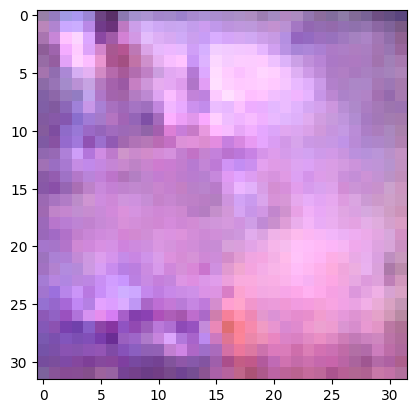


Epoch: 12 | Learning Rate: 0.001
0.05776718258857727
0.059670936316251755
0.05931814759969711
0.061013996601104736
0.05958351120352745
0.05645697936415672
0.060220371931791306
0.059549808502197266
0.05814938247203827
0.06059451028704643
0.055137377232313156
0.059948354959487915
0.062134191393852234
0.05963378772139549
0.055423855781555176
0.055218663066625595
0.06332646310329437
0.0580814927816391
0.05912971496582031
0.05899181589484215
0.05859094113111496
0.06309258192777634
0.059869565069675446
0.06501194834709167
0.0623803436756134
0.0650804340839386
0.058841586112976074
0.05638762563467026
0.05719254910945892
0.05707614868879318
0.05536526069045067
0.059427447617053986
0.06407847255468369
0.05935954302549362
0.05364738032221794
0.06326746195554733
0.05732937902212143
0.06092113256454468
0.06002028286457062
0.05971056967973709
0.059425316751003265
0.05604064092040062
0.057127680629491806
0.059768494218587875
0.057026978582143784
0.05813755840063095
0.0552704781293869
0.052031837403

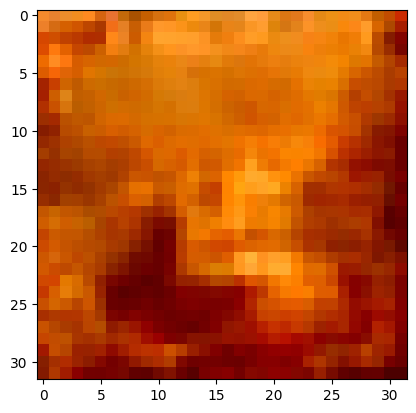


Epoch: 13 | Learning Rate: 0.001
0.05532955378293991
0.06283139437437057
0.051366131752729416
0.058160509914159775
0.05378241464495659
0.05378664657473564
0.05201976001262665
0.05567024275660515
0.061240024864673615
0.05585546791553497
0.0585901141166687
0.05835540220141411
0.05558755621314049
0.05452776700258255
0.053766049444675446
0.05591092258691788
0.056954458355903625
0.0577784888446331
0.05841713398694992
0.05680245906114578
0.05586085841059685
0.05800782889127731
0.057792723178863525
0.05679377168416977
0.05851663276553154
0.0622880756855011
0.0598054938018322
0.06000826880335808
0.05517083406448364
0.053408991545438766
0.0554312989115715
0.05519052594900131
0.05476488173007965
0.05937233567237854
0.054068297147750854
0.05795688554644585
0.05378037691116333
0.05999847874045372
0.055331528186798096
0.05521086975932121
0.057357996702194214
0.059662606567144394
0.05659174919128418
0.05338701605796814
0.05625157058238983
0.05480165407061577
0.05404329299926758
0.05752075836062431


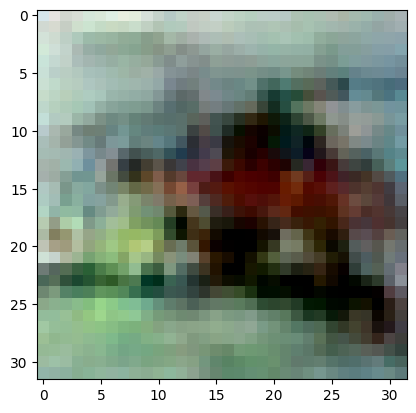


Epoch: 14 | Learning Rate: 0.001
0.05833917111158371
0.05462608486413956
0.05664954334497452
0.06125954911112785
0.05787378177046776
0.05611775442957878
0.0522281788289547
0.05857260152697563
0.057330500334501266
0.056917332112789154
0.061087265610694885
0.05585455894470215
0.058330416679382324
0.051375530660152435
0.05579096078872681
0.05567365884780884
0.059847619384527206
0.057496484369039536
0.056103527545928955
0.05197228118777275
0.05358749255537987
0.054127246141433716
0.05589434504508972
0.05675471946597099
0.057231418788433075
0.05733928829431534
0.06039152666926384
0.058032043278217316
0.05697917193174362
0.05892951413989067
0.05653410404920578
0.05188097804784775
0.05722076818346977
0.05843328684568405
0.05777440220117569
0.05782840773463249
0.056391797959804535
0.06203663349151611
0.058223120868206024
0.052807360887527466
0.05481491610407829
0.06119943782687187
0.06036452203989029
0.05314406380057335
0.05444205924868584
0.0594390332698822
0.055417682975530624
0.05673172324

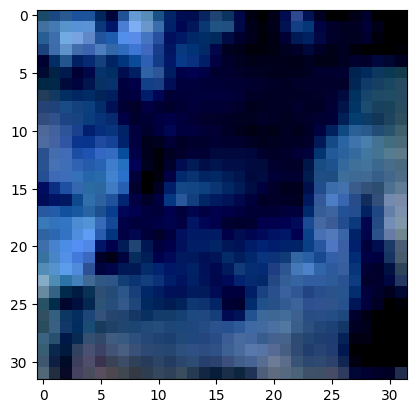


Epoch: 15 | Learning Rate: 0.001
0.055631399154663086
0.05701528489589691
0.050859369337558746
0.05717488378286362
0.05556895583868027
0.05443194508552551
0.05770847946405411
0.05808532238006592
0.05638260766863823
0.05387715995311737
0.06123698502779007
0.05525586009025574
0.0522797517478466
0.06000625342130661
0.05777577683329582
0.05438116192817688
0.05785267800092697
0.05369308590888977
0.06014956161379814
0.055612899363040924
0.05396581441164017
0.056211039423942566
0.056729756295681
0.053102463483810425
0.05361323803663254
0.053454749286174774
0.059770725667476654
0.05441360920667648
0.05695800110697746
0.05532705411314964
0.056807130575180054
0.05823441967368126
0.05837249010801315
0.059652965515851974
0.057615723460912704
0.0554271936416626
0.051357924938201904
0.05595383048057556
0.055478669703006744
0.05284634232521057
0.058669835329055786
0.053418152034282684
0.055817894637584686
0.05647933483123779
0.05745675414800644
0.05360731482505798
0.05154058337211609
0.0535618290305

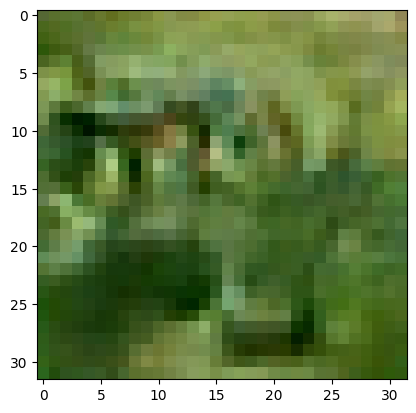


Epoch: 16 | Learning Rate: 0.001
0.05598503351211548
0.05558094382286072
0.0542740523815155
0.0552016943693161
0.05449502170085907
0.05215790867805481
0.05475546047091484
0.055189501494169235
0.05551557242870331
0.057999387383461
0.060065895318984985
0.05584646761417389
0.05355437844991684
0.05278471112251282
0.05289098620414734
0.050038449466228485
0.053932320326566696
0.05523410066962242
0.05574413388967514
0.056348517537117004
0.050861455500125885
0.04794037342071533
0.051915399730205536
0.05482159182429314
0.05390962213277817
0.06405116617679596
0.05333998426795006
0.05307596176862717
0.05491086468100548
0.05254122614860535
0.0535871684551239
0.0568879172205925
0.05655212327837944
0.053522538393735886
0.05419034883379936
0.05513628572225571
0.04734566807746887
0.05445341765880585
0.053781621158123016
0.05456983298063278
0.057609379291534424
0.05310437083244324
0.05527118965983391
0.04732076823711395
0.05916754901409149
0.056820016354322433
0.059873923659324646
0.052047669887542725

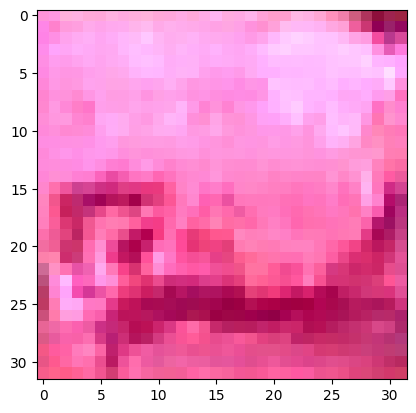


Epoch: 17 | Learning Rate: 0.001
0.055206310003995895
0.05225413292646408
0.05563897639513016
0.05336218699812889
0.05155825614929199
0.05108482763171196
0.05648677796125412
0.0549854040145874
0.05755370110273361
0.05775967240333557
0.0546112023293972
0.05745277553796768
0.053734585642814636
0.04781905934214592
0.058765958994627
0.05640131235122681
0.05521741509437561
0.05356756970286369
0.05341136455535889
0.05494218319654465
0.057831406593322754
0.055254265666007996
0.0502249114215374
0.056120894849300385
0.056662581861019135
0.05610589310526848
0.04891818016767502
0.04796905443072319
0.057941339910030365
0.05673674866557121
0.052349504083395004
0.05470889434218407
0.05386453494429588
0.05311514064669609
0.05574586242437363
0.05490390956401825
0.057084716856479645
0.057990022003650665
0.05866025388240814
0.052949368953704834
0.05416315793991089
0.06100129336118698
0.056183140724897385
0.0558653399348259
0.05391307920217514
0.0549703985452652
0.055152155458927155
0.056390952318906784

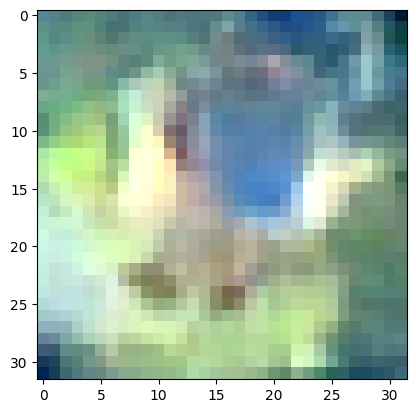


Epoch: 18 | Learning Rate: 0.001
0.05735514685511589
0.050783783197402954
0.05776224285364151
0.05609931796789169
0.058017194271087646
0.0547923669219017
0.05814644694328308
0.05376063287258148
0.056922078132629395
0.051355358213186264
0.054136138409376144
0.05478295683860779
0.0470302514731884
0.05185195803642273
0.05353517830371857
0.05784580111503601
0.05434372276067734
0.05587364360690117
0.04994723200798035
0.052958518266677856
0.05500020831823349
0.056057900190353394
0.05471870303153992
0.049495719373226166
0.053260438144207
0.05083991214632988
0.05345035716891289
0.05598335713148117
0.05756093189120293
0.052326053380966187
0.053673140704631805
0.05231235548853874
0.05634065717458725
0.05524697154760361
0.055985644459724426
0.053038716316223145
0.054747313261032104
0.053384747356176376
0.05109506845474243
0.05299130827188492
0.053245775401592255
0.05555165931582451
0.05270148441195488
0.056023821234703064
0.053221724927425385
0.05506144464015961
0.05406911298632622
0.05389367789

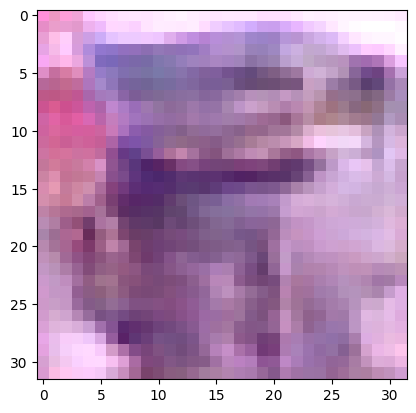


Epoch: 19 | Learning Rate: 0.001
0.05306538939476013
0.053625013679265976
0.052834510803222656
0.05327121168375015
0.055886249989271164
0.051637113094329834
0.051841896027326584
0.05248900502920151
0.05172508955001831
0.05496612936258316
0.05363532155752182
0.05159486457705498
0.05270887538790703
0.05463342368602753
0.04639631137251854
0.05154513567686081
0.05346183478832245
0.05493074655532837
0.052638642489910126
0.05070239305496216
0.048491209745407104
0.0522809773683548
0.05430155247449875
0.05431337282061577
0.05899791046977043
0.0492403469979763
0.04985138773918152
0.056766755878925323
0.05728722736239433
0.05720294266939163
0.05211351439356804
0.05407407507300377
0.05646150931715965
0.05176766961812973
0.051023922860622406
0.05452322959899902
0.05673032999038696
0.05519547685980797
0.0536968819797039
0.055001795291900635
0.048811789602041245
0.04904007539153099
0.05319662019610405
0.050496023148298264
0.048773087561130524
0.056500427424907684
0.05805432051420212
0.0545322299003

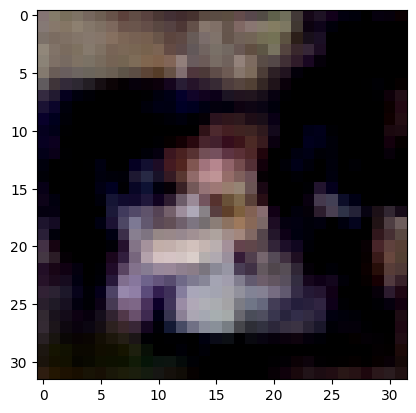


Epoch: 20 | Learning Rate: 0.001
0.054829906672239304
0.050772495567798615
0.054003115743398666
0.054190944880247116
0.048666924238204956
0.05443444848060608
0.0496806874871254
0.05317810922861099
0.04848777502775192
0.055091481655836105
0.05619236081838608
0.05280133709311485
0.04727815091609955
0.05486033484339714
0.057645779103040695
0.052999816834926605
0.051961272954940796
0.05305395647883415
0.052670203149318695
0.054419539868831635
0.05242767930030823
0.05699605867266655
0.05199668928980827
0.05237702652812004
0.05419572442770004
0.05396989732980728
0.05454075336456299
0.05339735746383667
0.05536220595240593
0.05477803945541382
0.05102448910474777
0.05778495594859123
0.05375473201274872
0.055525556206703186
0.05028284713625908
0.054247718304395676
0.05544958636164665
0.0490514412522316
0.05394919961690903
0.05372313782572746
0.05172884464263916
0.0545930378139019
0.05270397663116455
0.05895569175481796
0.05218977481126785
0.052851539105176926
0.04816119000315666
0.0597580149769

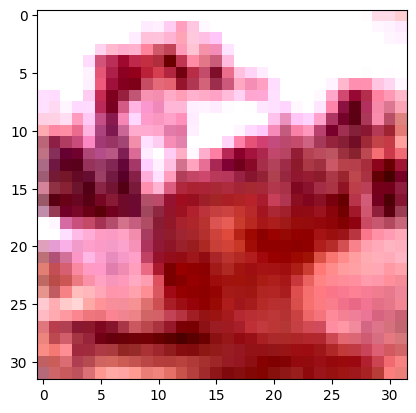


Epoch: 21 | Learning Rate: 0.0008
0.05356460064649582
0.05554556846618652
0.05004340410232544
0.05434276908636093
0.05170228332281113
0.05163397639989853
0.0543975830078125
0.055410485714673996
0.05097141116857529
0.05219167470932007
0.05105581879615784
0.0532403290271759
0.05022382736206055
0.054965317249298096
0.051742635667324066
0.05050153657793999
0.060108792036771774
0.05370388552546501
0.048410408198833466
0.0525449737906456
0.054653599858284
0.05769725143909454
0.05893873795866966
0.05538817495107651
0.0504256933927536
0.05685959756374359
0.05546082556247711
0.04921681806445122
0.050431184470653534
0.05389130115509033
0.054123155772686005
0.052147746086120605
0.05403589457273483
0.052215903997421265
0.05342154949903488
0.05063102766871452
0.054329704493284225
0.05055534094572067
0.05361662060022354
0.05334709584712982
0.05061696097254753
0.05286497622728348
0.05792483687400818
0.051145195960998535
0.05185088515281677
0.04837476834654808
0.05466383695602417
0.05578244850039482


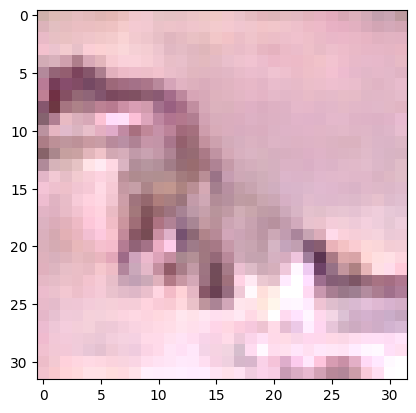


Epoch: 22 | Learning Rate: 0.0008
0.04989882558584213
0.054342642426490784
0.05660958215594292
0.05516047775745392
0.05477152392268181
0.05627517029643059
0.053525160998106
0.0531872920691967
0.05357685685157776
0.05630713701248169
0.055712711066007614
0.05140767619013786
0.048337846994400024
0.05089469999074936
0.05410955473780632
0.051188044250011444
0.04994324967265129
0.05730913579463959
0.05090436339378357
0.05738699436187744
0.05588170140981674
0.05228964611887932
0.052615225315093994
0.04760770499706268
0.05299214646220207
0.0582246407866478
0.052325278520584106
0.054536085575819016
0.054150890558958054
0.05060427635908127
0.05024944245815277
0.05517911538481712
0.053150247782468796
0.05798342823982239
0.05219682306051254
0.05518169328570366
0.053762294352054596
0.05575070530176163
0.04965346306562424
0.056384336203336716
0.0555630624294281
0.059099674224853516
0.048867374658584595
0.052842702716588974
0.053573232144117355
0.05092876777052879
0.056313127279281616
0.056361984461

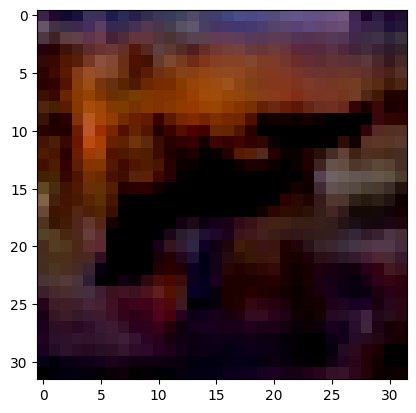


Epoch: 23 | Learning Rate: 0.0008
0.04917535185813904
0.04919792339205742
0.05385471507906914
0.05476413294672966
0.05130583792924881
0.054303430020809174
0.0550827793776989
0.05275992676615715
0.05613037571310997
0.053266577422618866
0.056764960289001465
0.055719420313835144
0.05408378690481186
0.05009801313281059
0.05698177218437195
0.04765857756137848
0.046888962388038635
0.05510842055082321
0.05186592787504196
0.053238458931446075
0.052856918424367905
0.053966786712408066
0.05140053480863571
0.048707734793424606
0.0524839386343956
0.052460890263319016
0.04893670231103897
0.05207175016403198
0.05303766578435898
0.05085155367851257
0.05181178078055382
0.05273665115237236
0.051716919988393784
0.05586782097816467
0.054066251963377
0.06025880575180054
0.05117328092455864
0.05276590213179588
0.05495297163724899
0.04995421692728996
0.054963137954473495
0.053209271281957626
0.05162425339221954
0.054772429168224335
0.0555153414607048
0.05112498998641968
0.04976120591163635
0.05575970560312

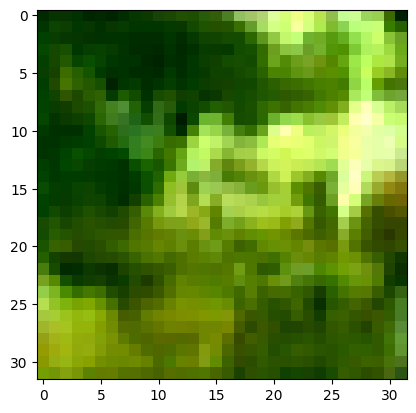


Epoch: 24 | Learning Rate: 0.0008
0.05515198037028313
0.05063040181994438
0.05084018036723137
0.05059022828936577
0.04972095414996147
0.05371209979057312
0.04914785921573639
0.059545066207647324
0.05557430535554886
0.05101151764392853
0.057039882987737656
0.05468672141432762
0.057293638586997986
0.052565883845090866
0.0513681024312973
0.05311651527881622
0.05290798470377922
0.05007956549525261
0.049687497317790985
0.054400257766246796
0.05340183526277542
0.05223800987005234
0.05498969554901123
0.04824678227305412
0.04620284587144852
0.05798235535621643
0.0556718111038208
0.05276593565940857
0.04848704859614372
0.052847497165203094
0.05205622315406799
0.05186028778553009
0.05120105668902397
0.05205436795949936
0.052572280168533325
0.04734638333320618
0.05696120858192444
0.0513443797826767
0.04886336624622345
0.04886167496442795
0.05040985345840454
0.05327260121703148
0.05661676451563835
0.05209360644221306
0.05329359695315361
0.05537153407931328
0.05433186516165733
0.05048128217458725


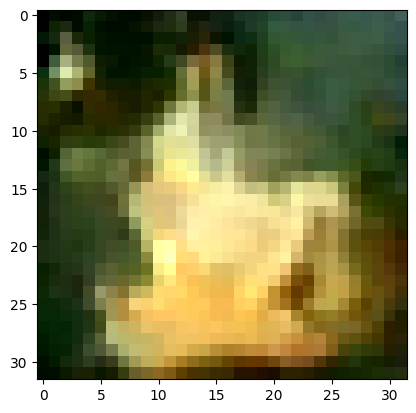


Epoch: 25 | Learning Rate: 0.0008
0.05508342385292053
0.057221557945013046
0.0514705590903759
0.04703656956553459
0.05207127332687378
0.05211186408996582
0.0568799190223217
0.050673916935920715
0.05657678842544556
0.053798239678144455
0.051745153963565826
0.0516786128282547
0.05371739715337753
0.05725901946425438
0.05040745437145233
0.05319517105817795
0.0468856506049633
0.05438185855746269
0.05142952501773834
0.0452701561152935
0.05549190938472748
0.0523824505507946
0.04845380038022995
0.0514165461063385
0.05193164572119713
0.05053143948316574
0.05567524954676628
0.050302326679229736
0.04757627844810486
0.053629159927368164
0.045166220515966415
0.05400952324271202
0.05420916527509689
0.04799488186836243
0.05457454174757004
0.05286150425672531
0.05105477571487427
0.051813215017318726
0.05482912063598633
0.05503875017166138
0.050203096121549606
0.052594900131225586
0.058279961347579956
0.055788181722164154
0.05190492421388626
0.052275002002716064
0.04950360953807831
0.05153067037463188

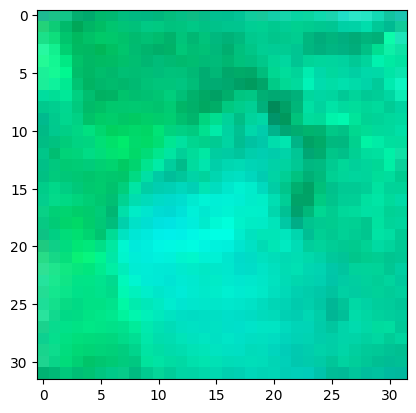


Epoch: 26 | Learning Rate: 0.0008
0.05374456197023392
0.04828492924571037
0.05502578616142273
0.04978518933057785
0.050968050956726074
0.05115672945976257
0.04548698663711548
0.04981683939695358
0.0521697998046875
0.052426330745220184
0.058040305972099304
0.054660409688949585
0.05649053305387497
0.056461967527866364
0.05008978769183159
0.0525239035487175
0.055008720606565475
0.054097726941108704
0.05335475131869316
0.05139286816120148
0.047693461179733276
0.04824472591280937
0.053298525512218475
0.04949731379747391
0.05087391659617424
0.04991842433810234
0.05320866033434868
0.04911084100604057
0.056379809975624084
0.054860956966876984
0.05444394052028656
0.045650750398635864
0.04873564839363098
0.05277112126350403
0.049754273146390915
0.04975911229848862
0.057759009301662445
0.052924513816833496
0.05299443006515503
0.05265320464968681
0.054326385259628296
0.05489213392138481
0.053063832223415375
0.05161113664507866
0.049041133373975754
0.04827498644590378
0.04929656535387039
0.0531699

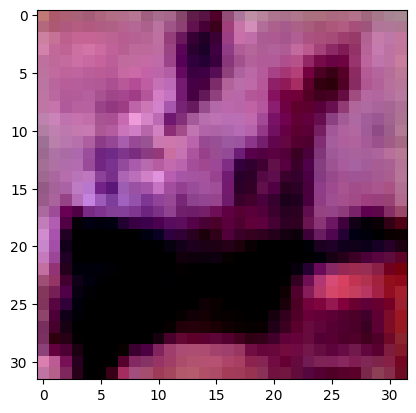


Epoch: 27 | Learning Rate: 0.0008
0.055878303945064545
0.05293797701597214
0.05084490031003952
0.05696767196059227
0.05498727411031723
0.04705822467803955
0.05101770907640457
0.05784636735916138
0.05150796100497246
0.05281468480825424
0.04902305454015732
0.054756518453359604
0.05246838182210922
0.056551992893218994
0.05654370039701462
0.051063816994428635
0.054038625210523605
0.0503365658223629
0.049902599304914474
0.05304095894098282
0.05758104845881462
0.05023876950144768
0.051199279725551605
0.05296286940574646
0.05127730965614319
0.05206696316599846
0.05278179049491882
0.049347564578056335
0.052867233753204346
0.05298547074198723
0.047046881169080734
0.050059184432029724
0.05403658747673035
0.054868996143341064
0.053307484835386276
0.04930529743432999
0.04975242540240288
0.048631250858306885
0.054719578474760056
0.05224938318133354
0.04764256998896599
0.05304582044482231
0.053782038390636444
0.0509193055331707
0.048250794410705566
0.053184591233730316
0.053277283906936646
0.050381

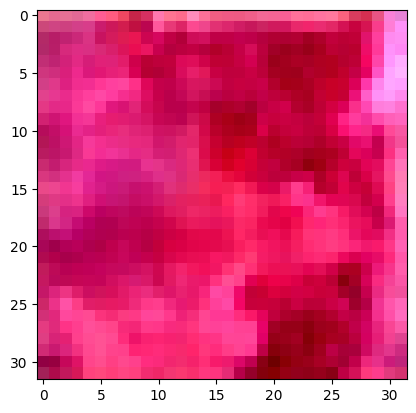


Epoch: 28 | Learning Rate: 0.0008
0.05865434557199478
0.0506896898150444
0.05178278684616089
0.05280860513448715
0.04855450242757797
0.05371887609362602
0.052295833826065063
0.051644206047058105
0.0498817078769207
0.053713709115982056
0.05105435103178024
0.05364861339330673
0.05636606365442276
0.04942196235060692
0.051771026104688644
0.045716792345047
0.049494367092847824
0.04962066933512688
0.05238405987620354
0.05837054178118706
0.055030979216098785
0.051421307027339935
0.05179370567202568
0.04910832270979881
0.049098215997219086
0.04985560104250908
0.049924906343221664
0.0526544563472271
0.05526122450828552
0.046526651829481125
0.05327024310827255
0.04965081438422203
0.05671565234661102
0.05085145682096481
0.050985969603061676
0.05530639737844467
0.051808230578899384
0.05143967270851135
0.0539403110742569
0.04815113544464111
0.05351593717932701
0.05560173839330673
0.05119398236274719
0.05048942565917969
0.05398126691579819
0.052529215812683105
0.04782038927078247
0.0555153861641883

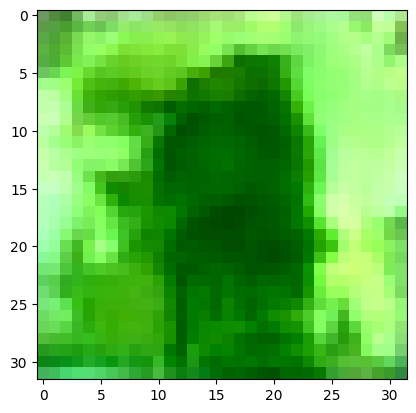


Epoch: 29 | Learning Rate: 0.0008
0.05372623726725578
0.0528378039598465
0.0530325323343277
0.052701495587825775
0.047182004898786545
0.0497383289039135
0.05443938076496124
0.05562807247042656
0.05260036513209343
0.05376291275024414
0.050575148314237595
0.04964272305369377
0.04476519674062729
0.05004741996526718
0.053202517330646515
0.04902071878314018
0.049444377422332764
0.04920836538076401
0.05525556206703186
0.05342703312635422
0.051037680357694626
0.049226514995098114
0.05524139106273651
0.047225505113601685
0.051771380007267
0.0559503547847271
0.054508812725543976
0.05330002307891846
0.04622689634561539
0.05416060611605644
0.05791899561882019
0.051112815737724304
0.050624869763851166
0.055456213653087616
0.05450959503650665
0.0544857494533062
0.05167291685938835
0.05350780487060547
0.05071296542882919
0.0510362908244133
0.052797190845012665
0.04864339157938957
0.056039582937955856
0.05089113116264343
0.052159182727336884
0.05044150352478027
0.05512120574712753
0.0515882298350334

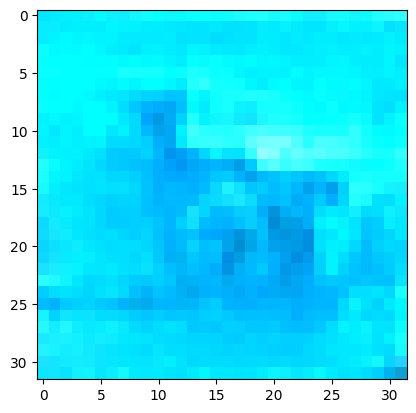


Epoch: 30 | Learning Rate: 0.0008
0.056505098938941956
0.05190449208021164
0.049382325261831284
0.05402205511927605
0.05226917564868927
0.04970652982592583
0.04742804169654846
0.04722980782389641
0.05135057494044304
0.04969250410795212
0.05446764454245567
0.05102534219622612
0.04918813705444336
0.058945007622241974
0.050218164920806885
0.05078869313001633
0.050361596047878265
0.04867103695869446
0.05430930107831955
0.05279972404241562
0.05171593278646469
0.04772781580686569
0.047720905393362045
0.05176367610692978
0.05181126296520233
0.05218850076198578
0.05267397314310074
0.04790612682700157
0.052607547491788864
0.05366259068250656
0.04858684539794922
0.05290975421667099
0.0502329021692276
0.05264784023165703
0.05197925493121147
0.05168481171131134
0.0552523247897625
0.05278186500072479
0.04770006984472275
0.05074423551559448
0.047813139855861664
0.05205252021551132
0.055313944816589355
0.05286067724227905
0.052740052342414856
0.05297307297587395
0.05150308459997177
0.053350530564785

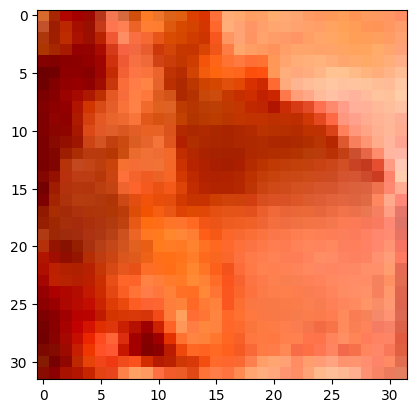

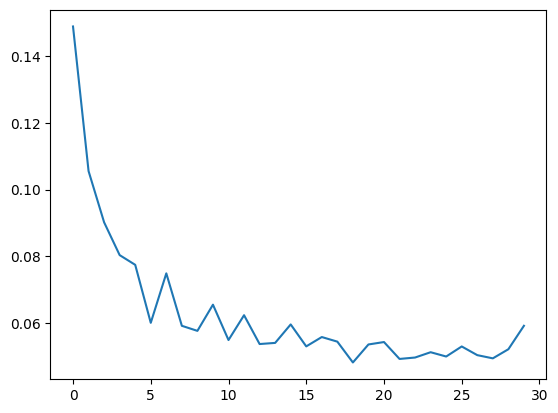

In [21]:
print("Number of parameters:", sum([param.numel() for param in unet2.parameters()]))
optimizer = optim.Adam(unet2.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.8)
train(unet2, data2, ddpm, optimizer, scheduler, epochs=30, num_workers=2)